In [23]:
"""Analyse relationships between items in the average_first_pulse_fit table 
"""

from multipatch_analysis.database import database as db
#from multipatch_analysis.database.database import TableGroup
import multipatch_analysis.connection_strength as cs 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import find_image_file

In [2]:
# #THIS DOES QUERY, EXTRACTS DATA, AND SAVES IN A CSV.
# # MAKE SURE YOU HAVE THE FORCE VERSUS ANY CORRECT THOUGHOUT THIS SECTION:
# # search for any or force and make sure all are converted
# '''Note that this query can take several minutes'''
# from multipatch_analysis.first_pulse_fits_average import AvgFirstPulseFitsForceSign  #or AvgFirstPulseFitsAnySign make sure saving file name corresponds
# data_dict= {'uid':[],
#             'pre_cell_id':[],
#             'post_cell_id':[],
#             'pre_cre':[],
#             'post_cre':[],
#             'amp':[], 
#             'NRMSE':[], 
#             'decay_tau':[], 
#             'latency':[], 
#             'rise_time':[], 
#             'syn_excitation':[],
#             'distance':[],
#             'boolean_connection':[],
#             'acsf':[],
#             'measured_amp':[],
#             'measured_baseline':[],
#             'n_sweeps':[],
#             'pre_layer':[],
#             'post_layer':[]}

# session=db.Session()
# data=session.query(AvgFirstPulseFitsForceSign, db.Pair).join(db.Pair).all() #this need to correspond to import
# # extract the relevant data from the query
# for afpf, pair in data:
#     #stuff from average_first_pulse_fit table
#     data_dict['uid'].append(afpf.__dict__['uid'])
#     data_dict['pre_cell_id'].append(afpf.__dict__['pre_cell_id'])
#     data_dict['post_cell_id'].append(afpf.__dict__['post_cell_id'])
#     data_dict['amp'].append(afpf.__dict__['amp'])
#     data_dict['NRMSE'].append(afpf.__dict__['NRMSE'])
#     data_dict['decay_tau'].append(afpf.__dict__['decay_tau'])
#     data_dict['rise_time'].append(afpf.__dict__['rise_time'])
#     data_dict['latency'].append(afpf.__dict__['latency'])
#     data_dict['boolean_connection'].append(afpf.__dict__['connected'])
#     data_dict['syn_excitation'].append(afpf.__dict__['synapse_sign'])
#     data_dict['measured_amp'].append(afpf.__dict__['measured_amp'])
#     data_dict['measured_baseline'].append(afpf.__dict__['measured_baseline'])
#     data_dict['n_sweeps'].append(afpf.__dict__['n_sweeps'])
#     #stuff from pair table
#     data_dict['pre_cre'].append(pair.pre_cell.cre_type)
#     data_dict['post_cre'].append(pair.post_cell.cre_type)
#     data_dict['distance'].append(pair.distance)
#     data_dict['acsf'].append(pair.experiment.acsf)
#     data_dict['pre_layer'].append(pair.pre_cell.target_layer)
#     data_dict['post_layer'].append(pair.pre_cell.target_layer)
# session.close()
# df=pd.DataFrame(data_dict)
# df['uid']=df['uid'].astype(str)
# df['image_path']=df.apply(lambda row: 
#                           find_image_file.find_image_file('/home/corinnet/workspace/DBfit_pics_force_sign_10_1ish_2018', 
#                           row.uid, str(row.pre_cell_id), str(row.post_cell_id)), axis=1)
# df.to_csv('average_fit_force_sign_10_09_18.csv')  #comment out after using so dont overwrite something

In [3]:
#load data from csv created from query and data extraction above
df=pd.read_csv('average_fit_any_sign_10_09_18.csv')
df['uid']=df.apply(lambda row: np.round(row.uid, 2).astype(str), axis=1)



In [ ]:
plotting_df=df[df.distance<1e10]
sns.set(style="ticks")
sns.pairplot(plotting_df, vars=['distance','amp','decay_tau', 'latency', 'rise_time', 'NRMSE'], hue='boolean_connection')

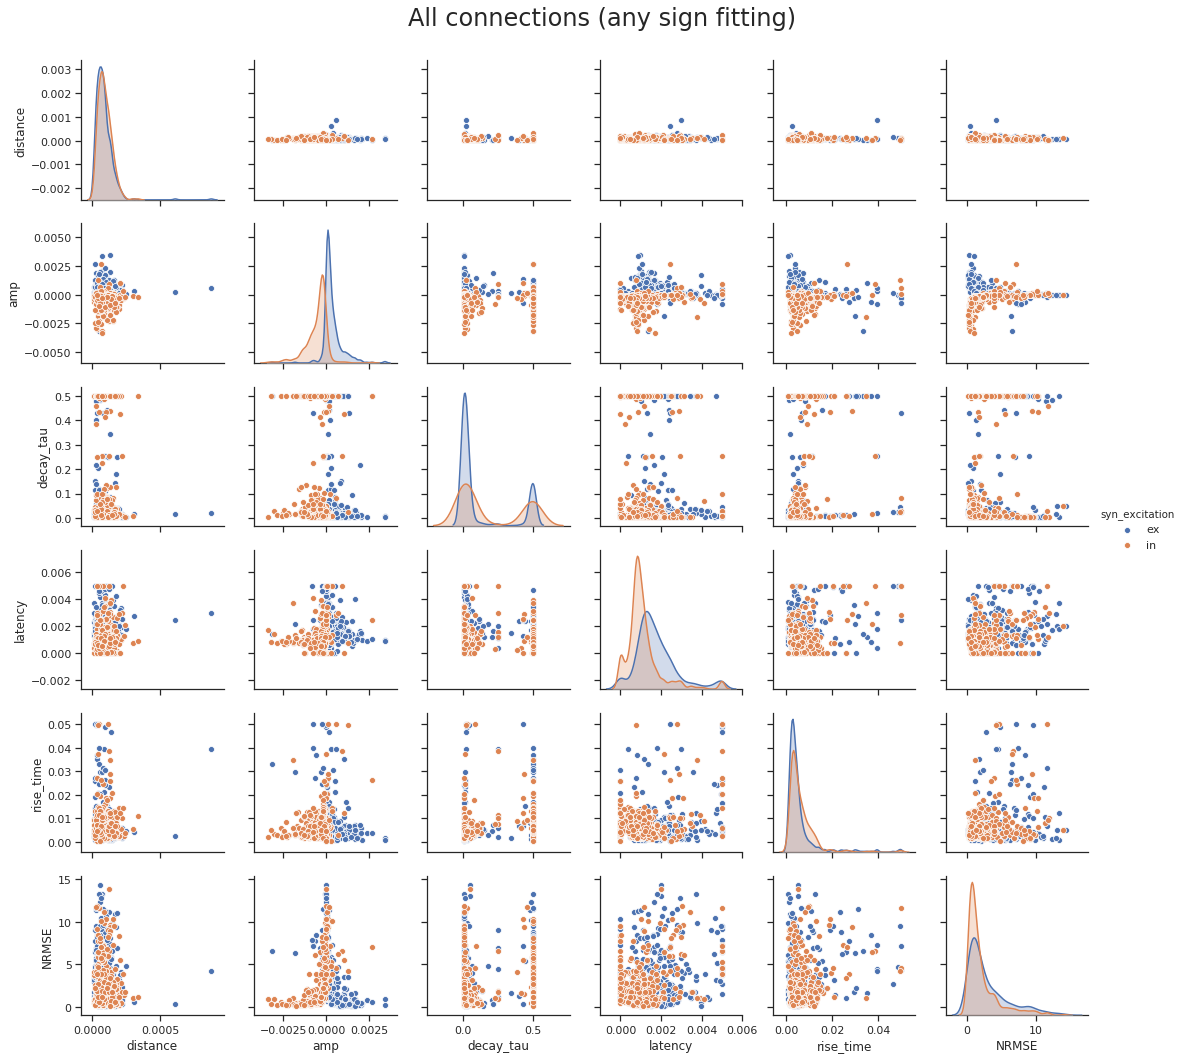

In [80]:
plotting_df=df[(df.distance<1e10) & (df.boolean_connection==True)]
g=sns.pairplot(plotting_df, 
             vars=['distance','amp','decay_tau', 'latency', 'rise_time', 'NRMSE'], 
             hue='syn_excitation')
g.fig.suptitle('All connections (any sign fitting)', fontsize=24)
g.fig.subplots_adjust(top=.93)

In [86]:
df.keys()

Index([u'Unnamed: 0', u'NRMSE', u'acsf', u'amp', u'boolean_connection',
       u'decay_tau', u'distance', u'latency', u'measured_amp',
       u'measured_baseline', u'n_sweeps', u'post_cell_id', u'post_cre',
       u'post_layer', u'pre_cell_id', u'pre_cre', u'pre_layer', u'rise_time',
       u'syn_excitation', u'uid', u'image_path'],
      dtype='object')

In [125]:
# Lets look at the short latency blip.
short_latency=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.latency<.00001) & 
                 (df.syn_excitation=='in')][['uid','pre_cell_id','post_cell_id', 'amp',
                                             'image_path', 'latency', 'NRMSE', 'n_sweeps']].sort_values(by='uid')


In [126]:
pd.options.display.max_colwidth=200
print(short_latency[['uid','pre_cell_id', 'post_cell_id', 'latency', 'amp', 'NRMSE', 'n_sweeps']].to_string())

                 uid  pre_cell_id  post_cell_id       latency       amp     NRMSE  n_sweeps
9672   1479420985.08            1             4  3.112736e-12 -0.000114  3.466465         4
9086   1489612566.09            7             8  7.364689e-06 -0.001320  1.451616        36
9071   1489612566.09            2             3  0.000000e+00  0.000273  4.815707        35
8513   1492204582.39            7             8  1.062004e-10 -0.000115  1.956695        55
7955    1495139316.1            3             6  1.838807e-16  0.000024  9.564989        40
6792   1500486919.22            5             7  1.063732e-13 -0.000143  4.421328        33
6006   1503959294.01            5             6  1.035967e-09 -0.000297  3.182715        39
5554   1507062407.47            2             5  2.371020e-14 -0.000148  6.552270        35
5338   1508189280.04            5             6  1.885644e-14 -0.000504  0.809447        33
5339   1508189280.04            5             8  2.353853e-12 -0.001211  0.52644

<type 'str'>


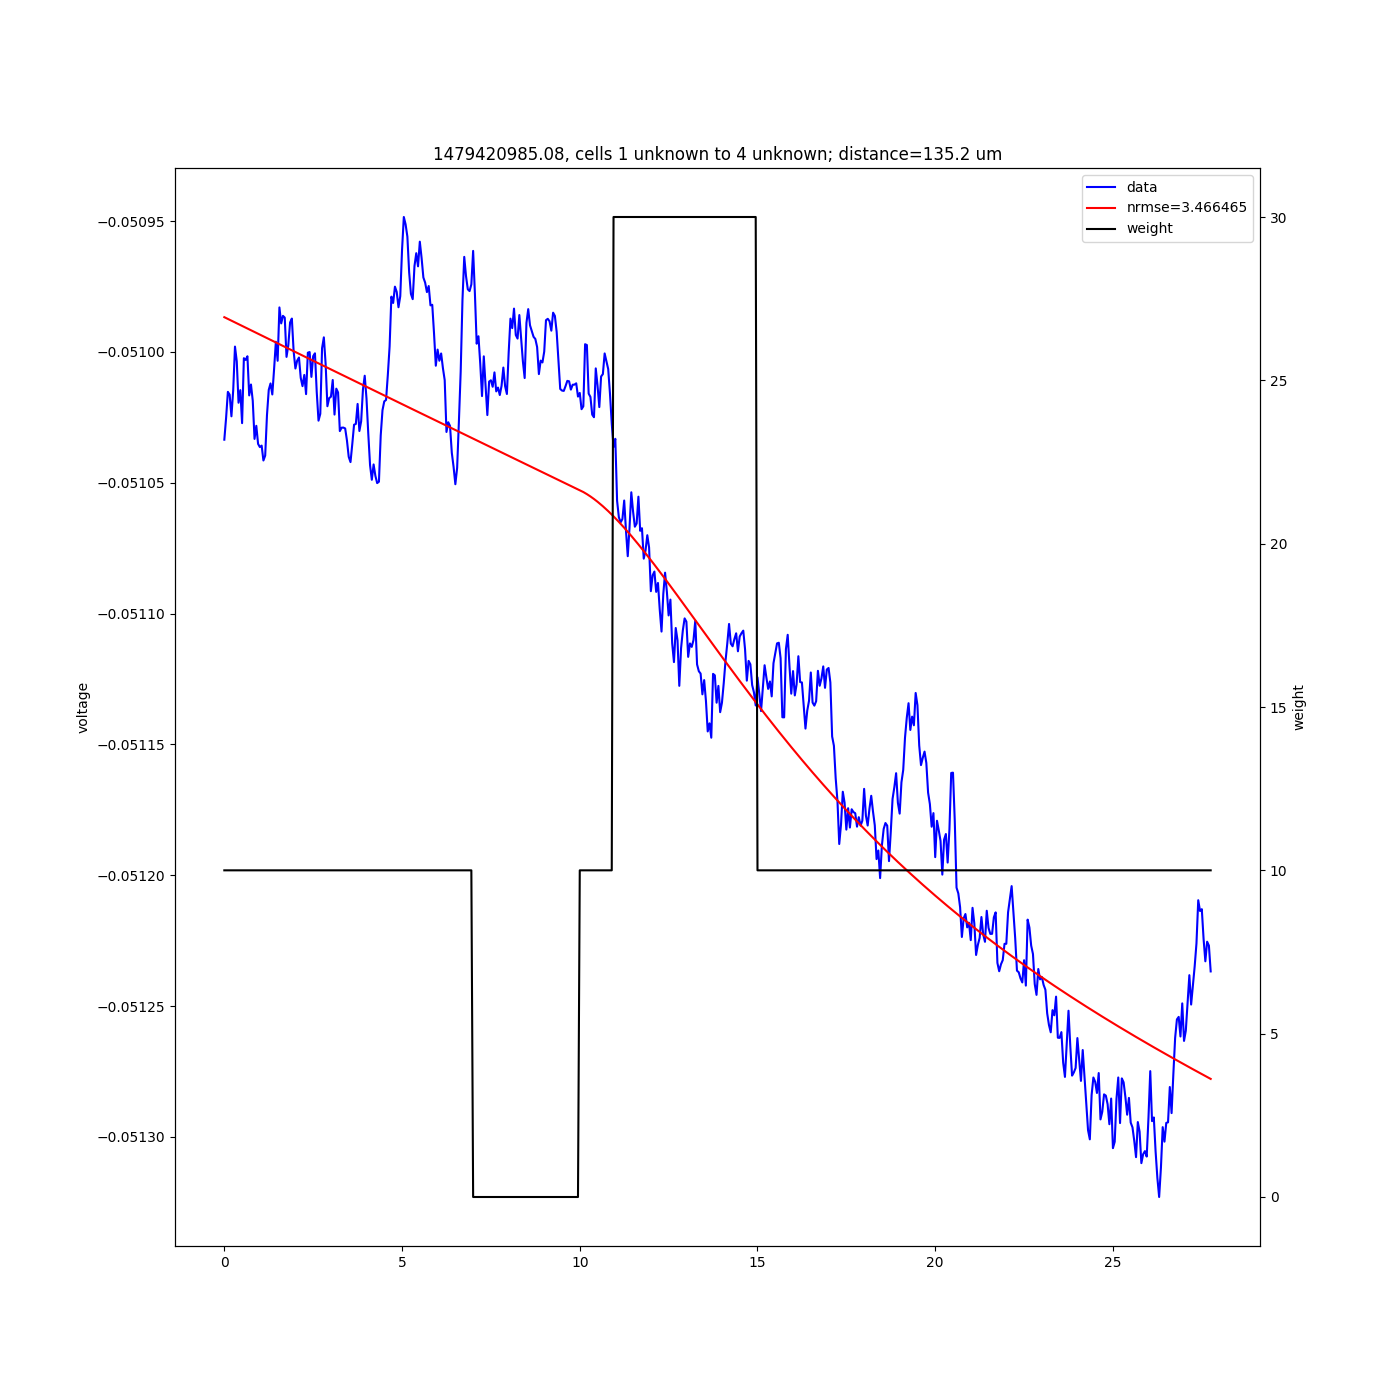

<type 'str'>


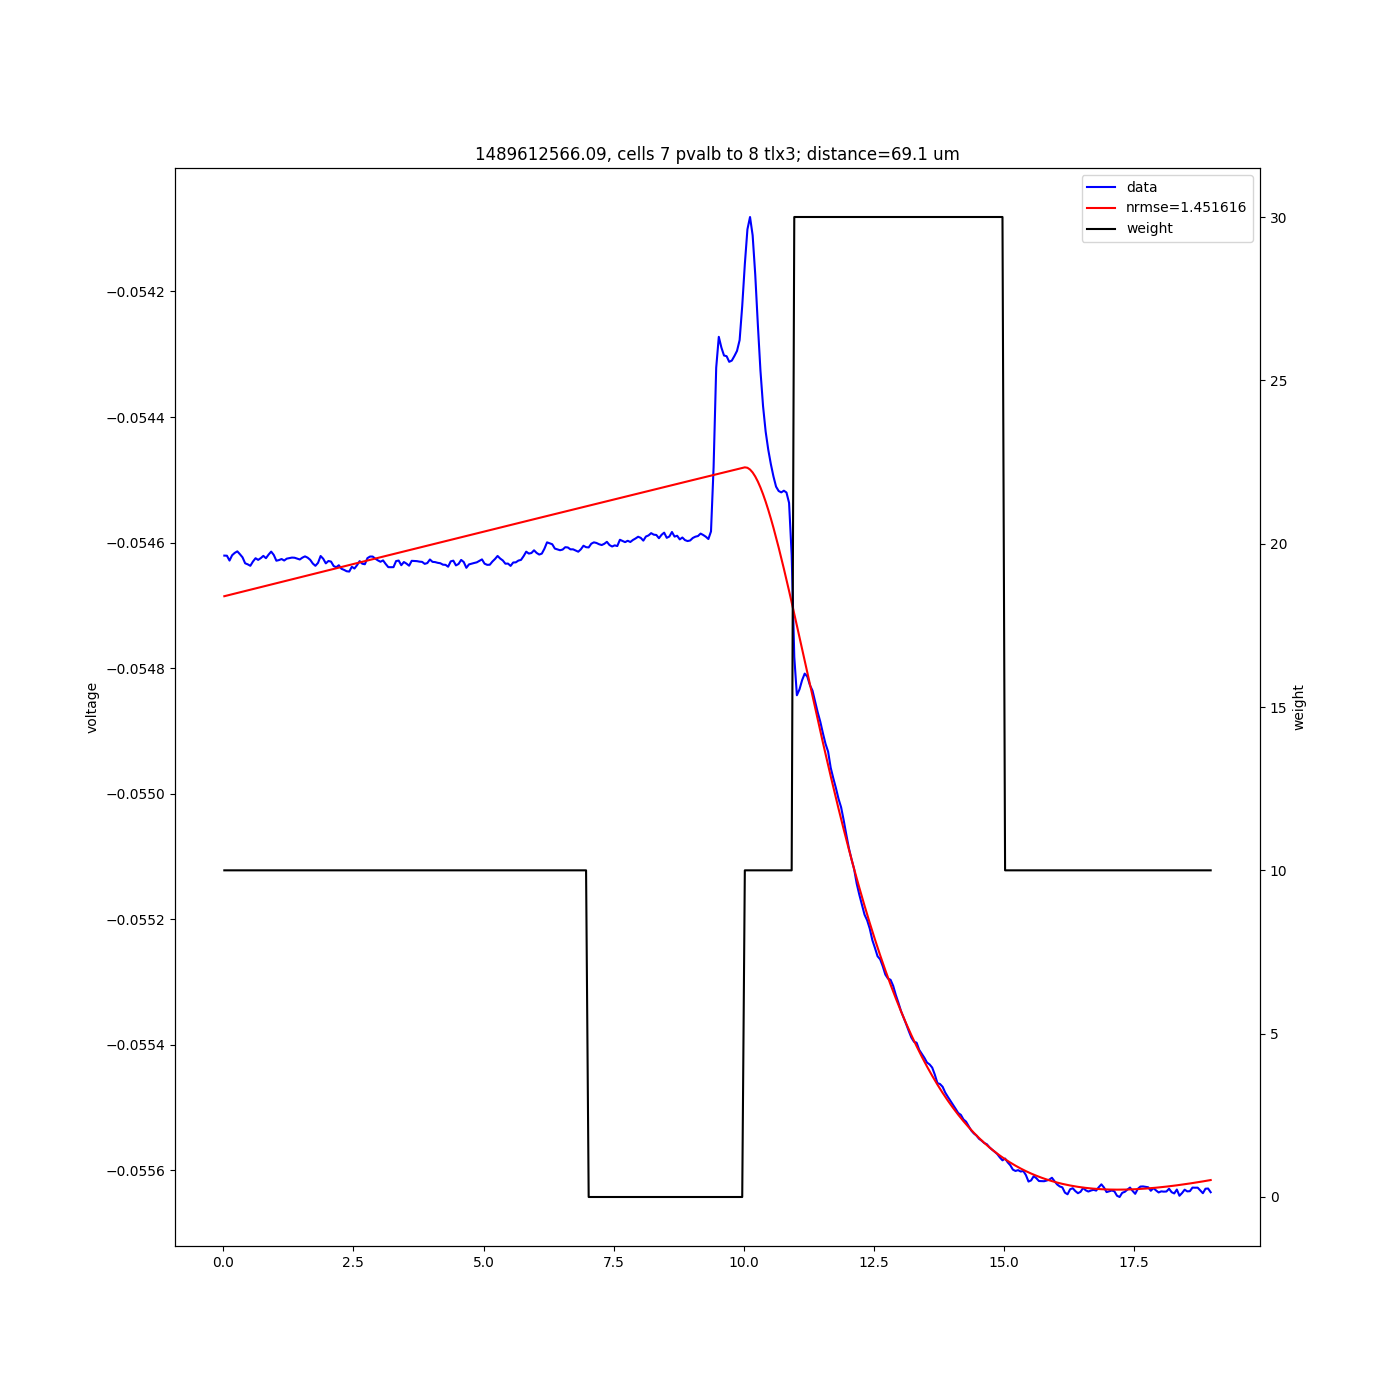

<type 'str'>


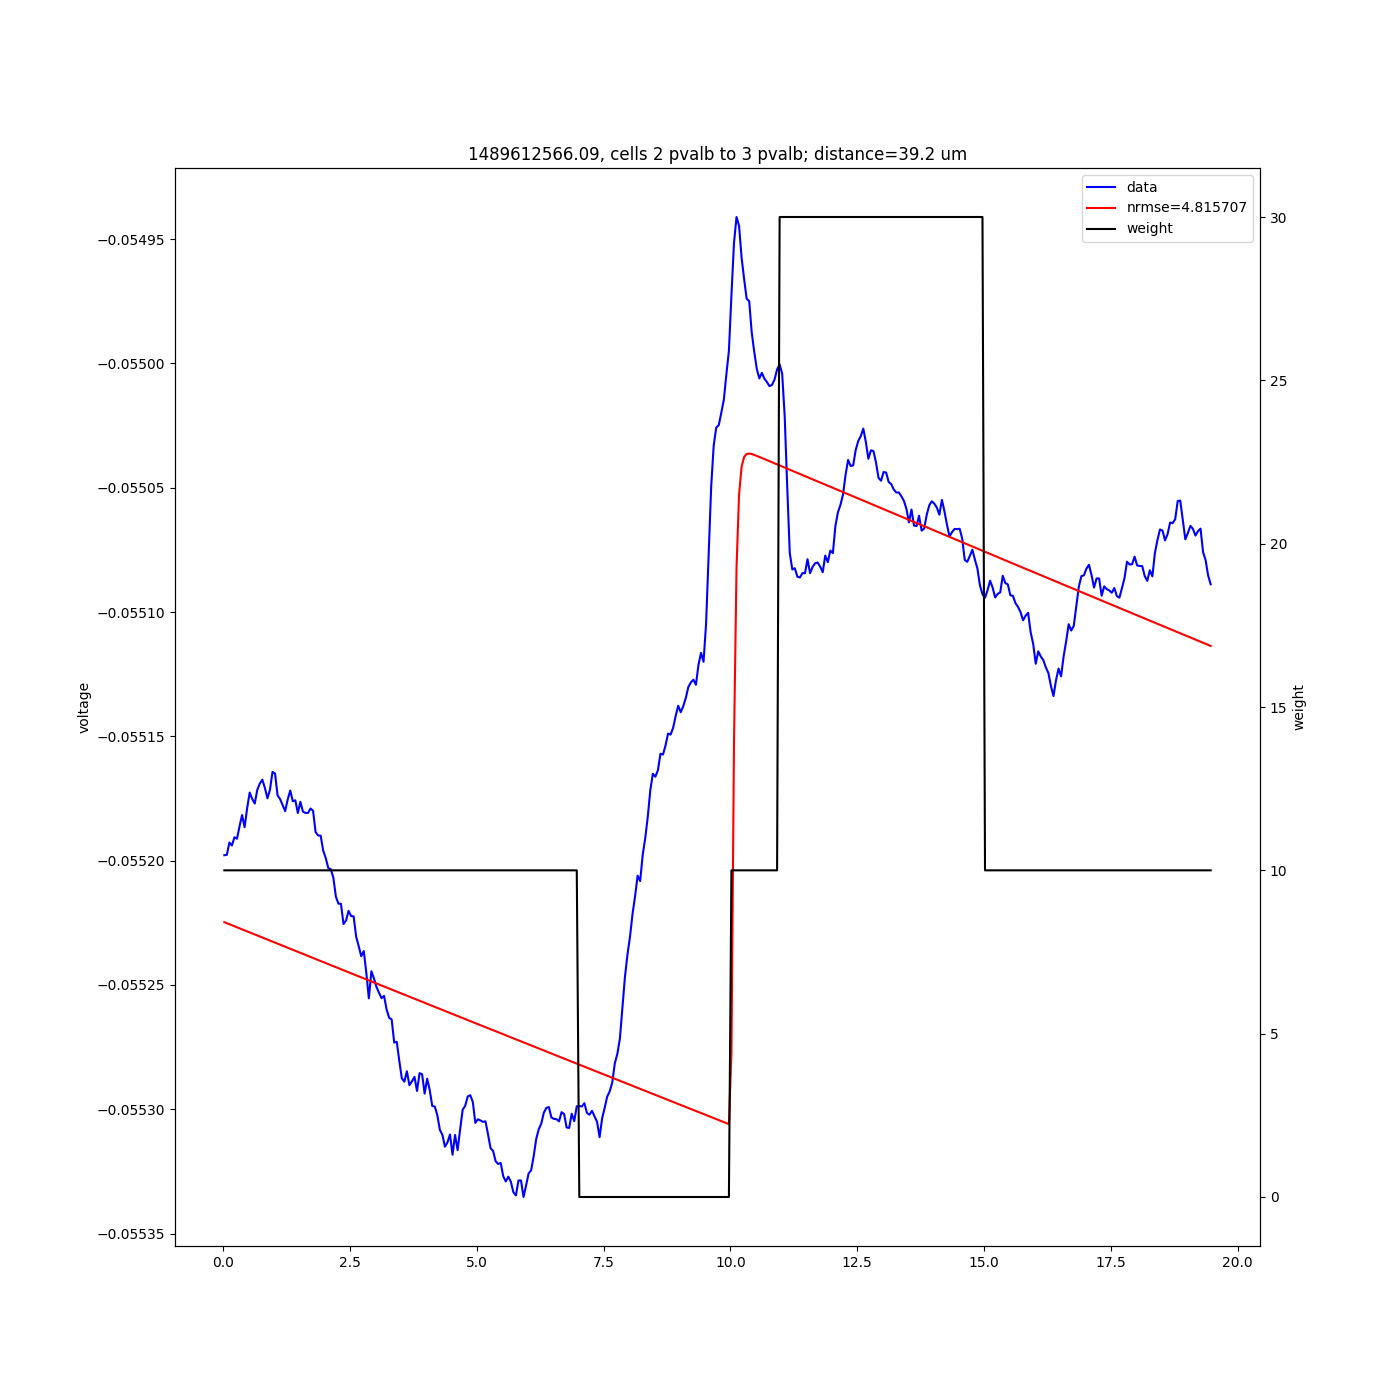

<type 'str'>


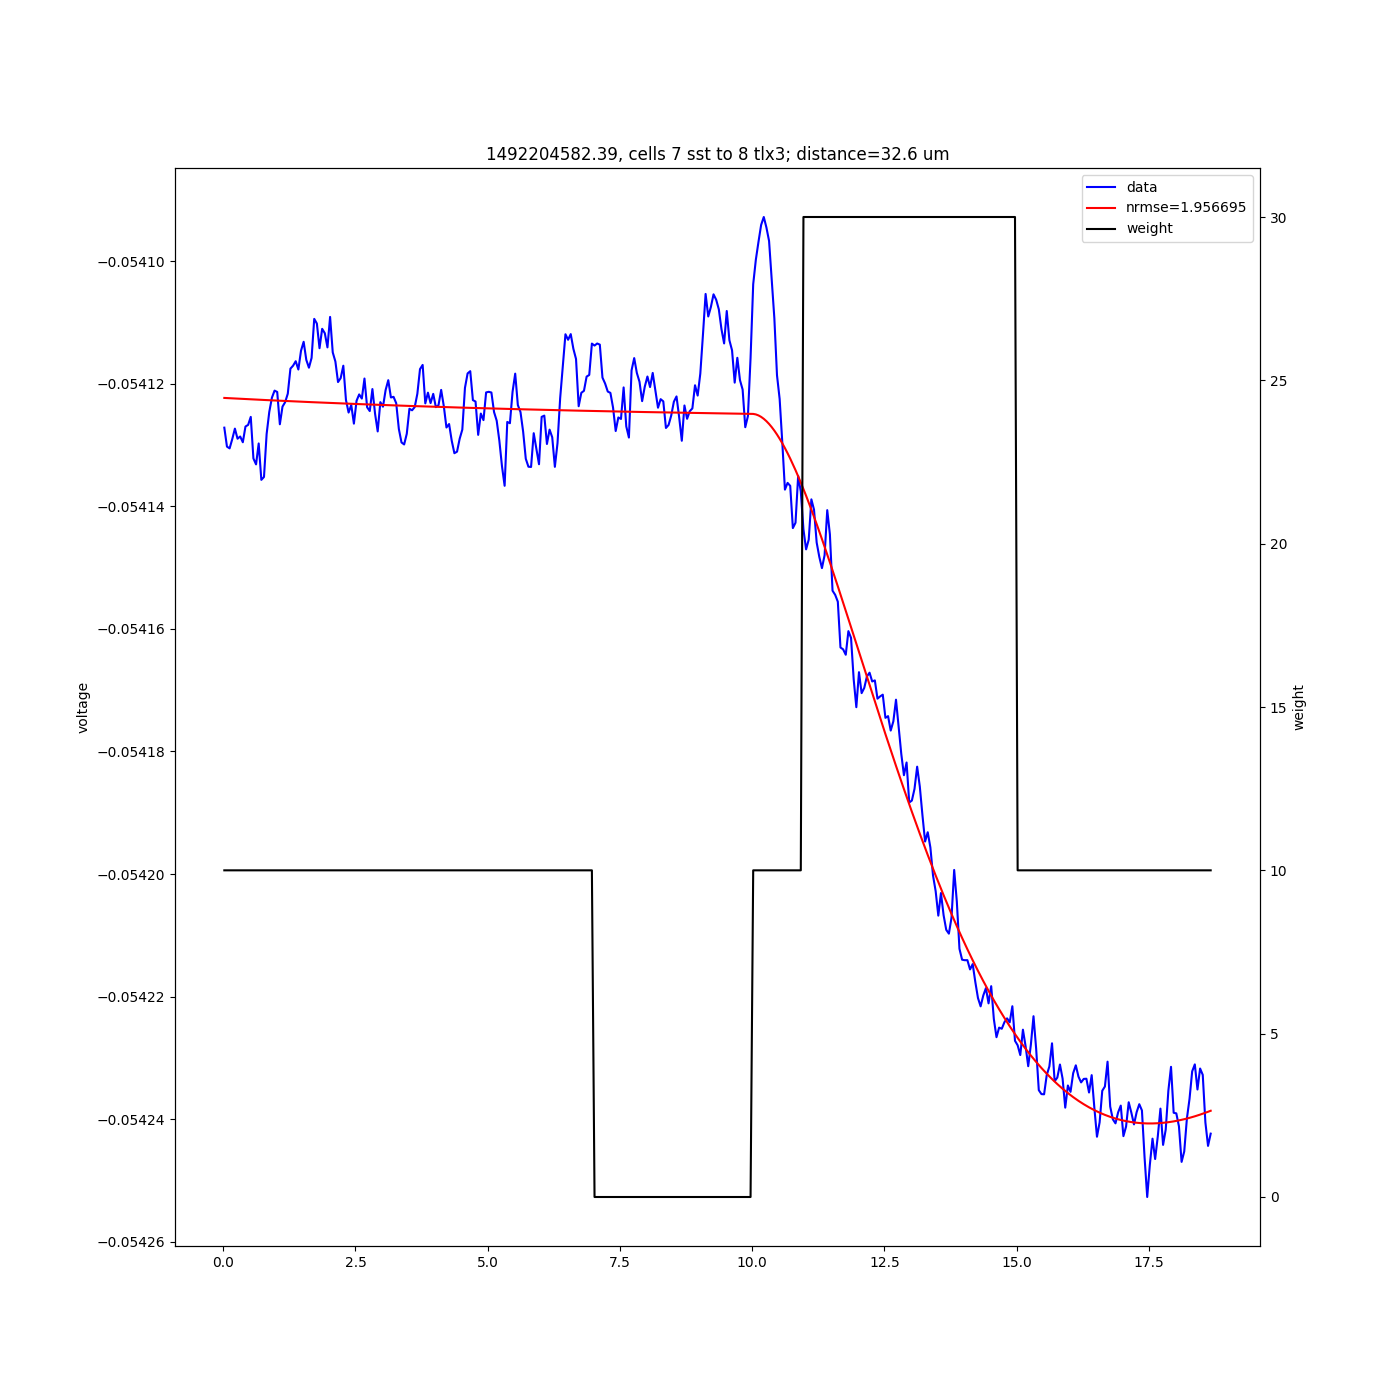

<type 'str'>


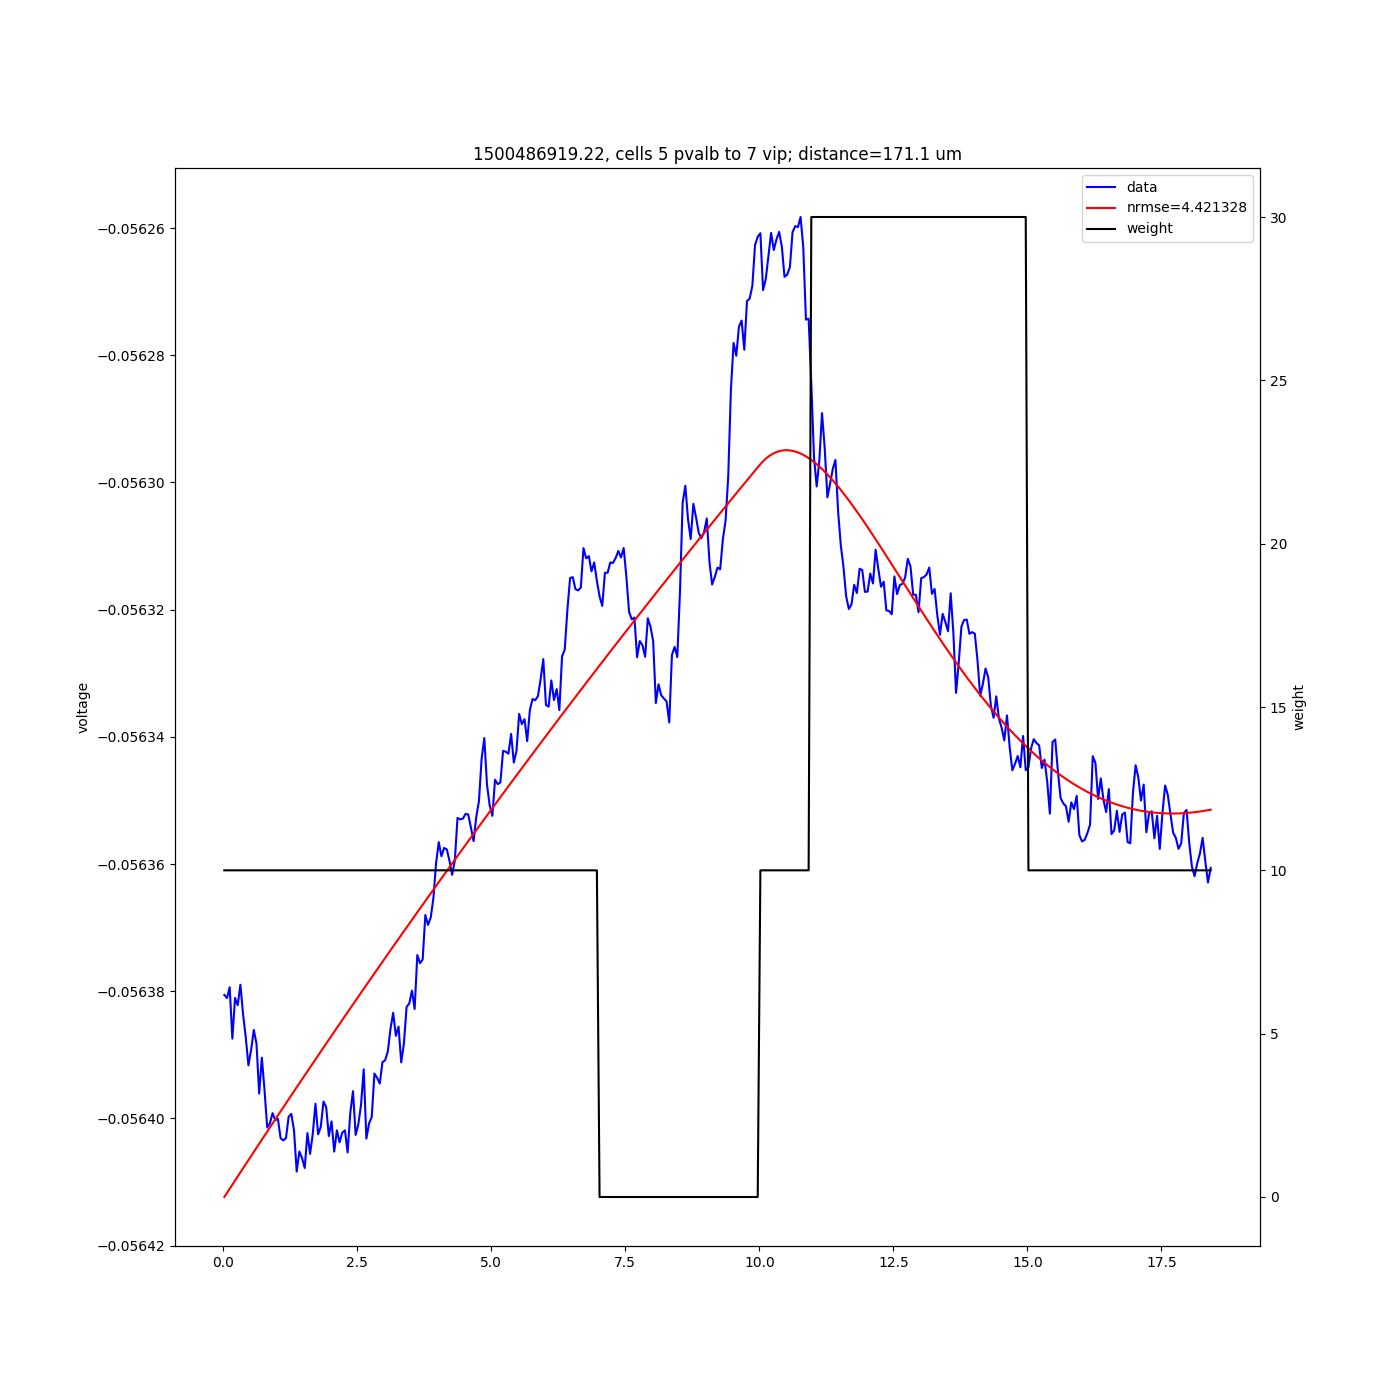

<type 'str'>


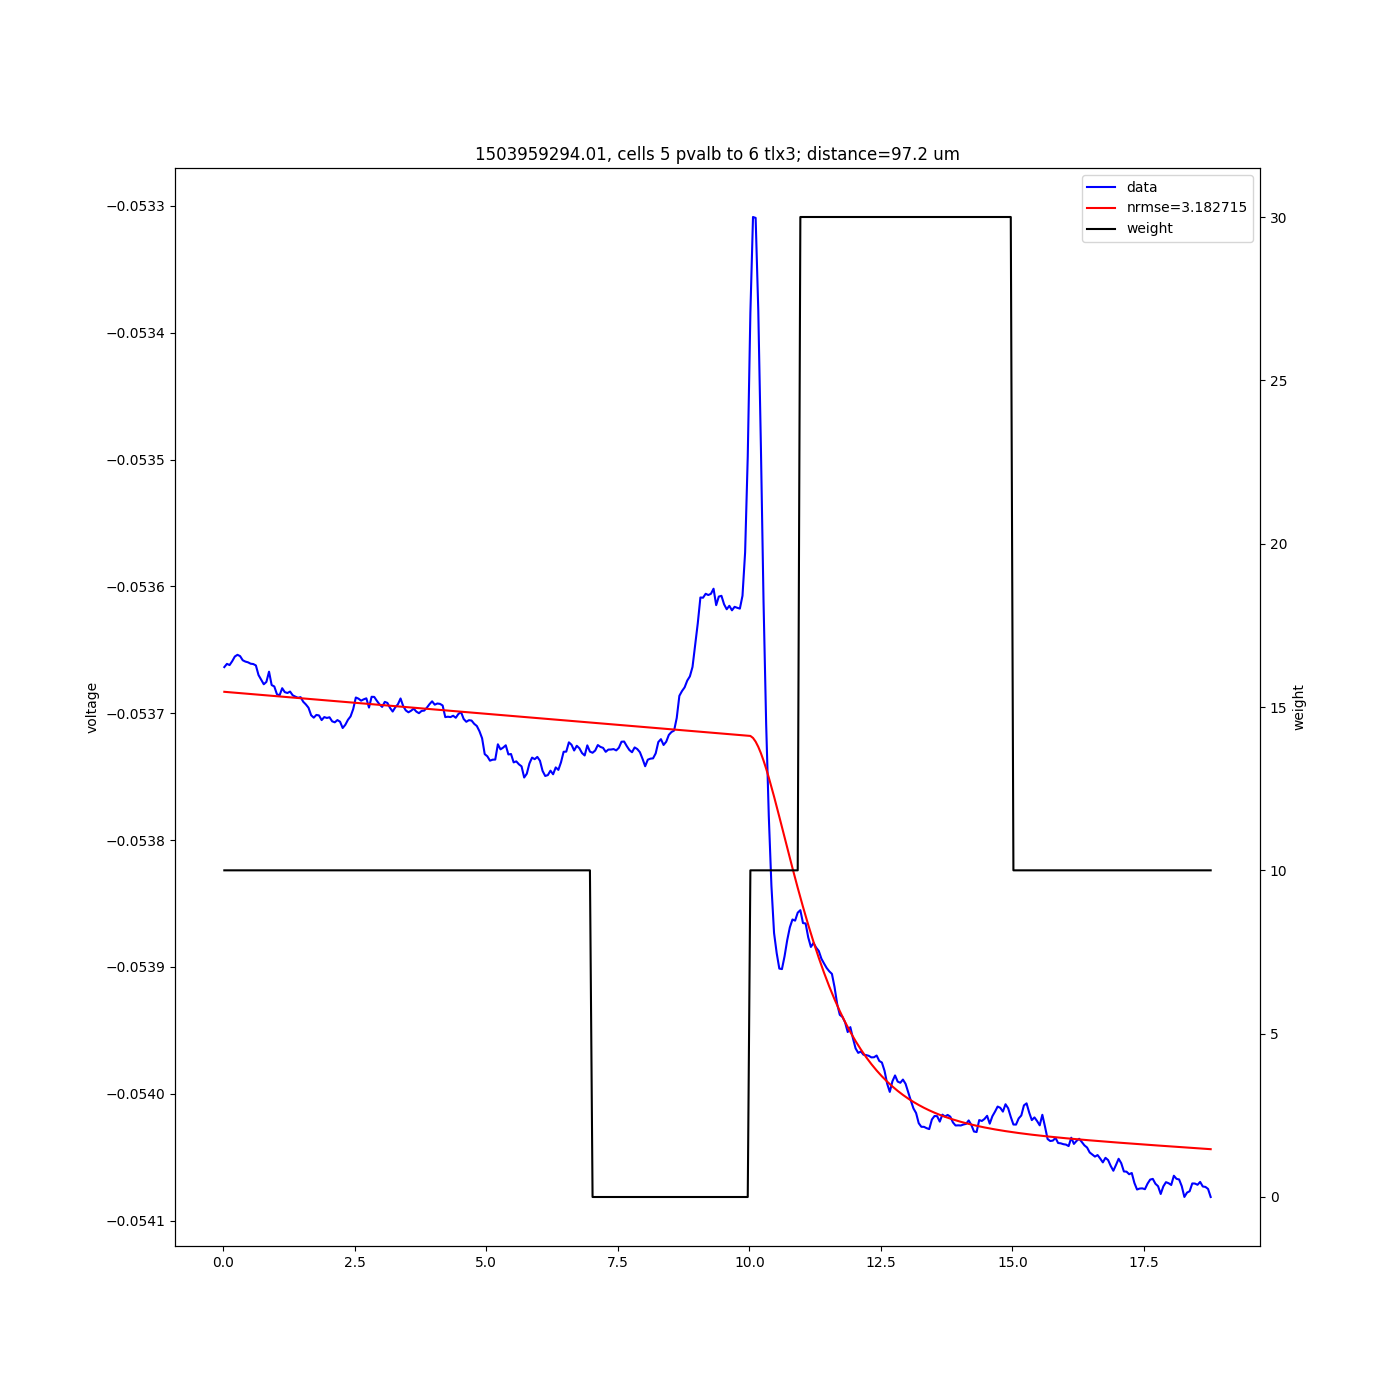

<type 'str'>


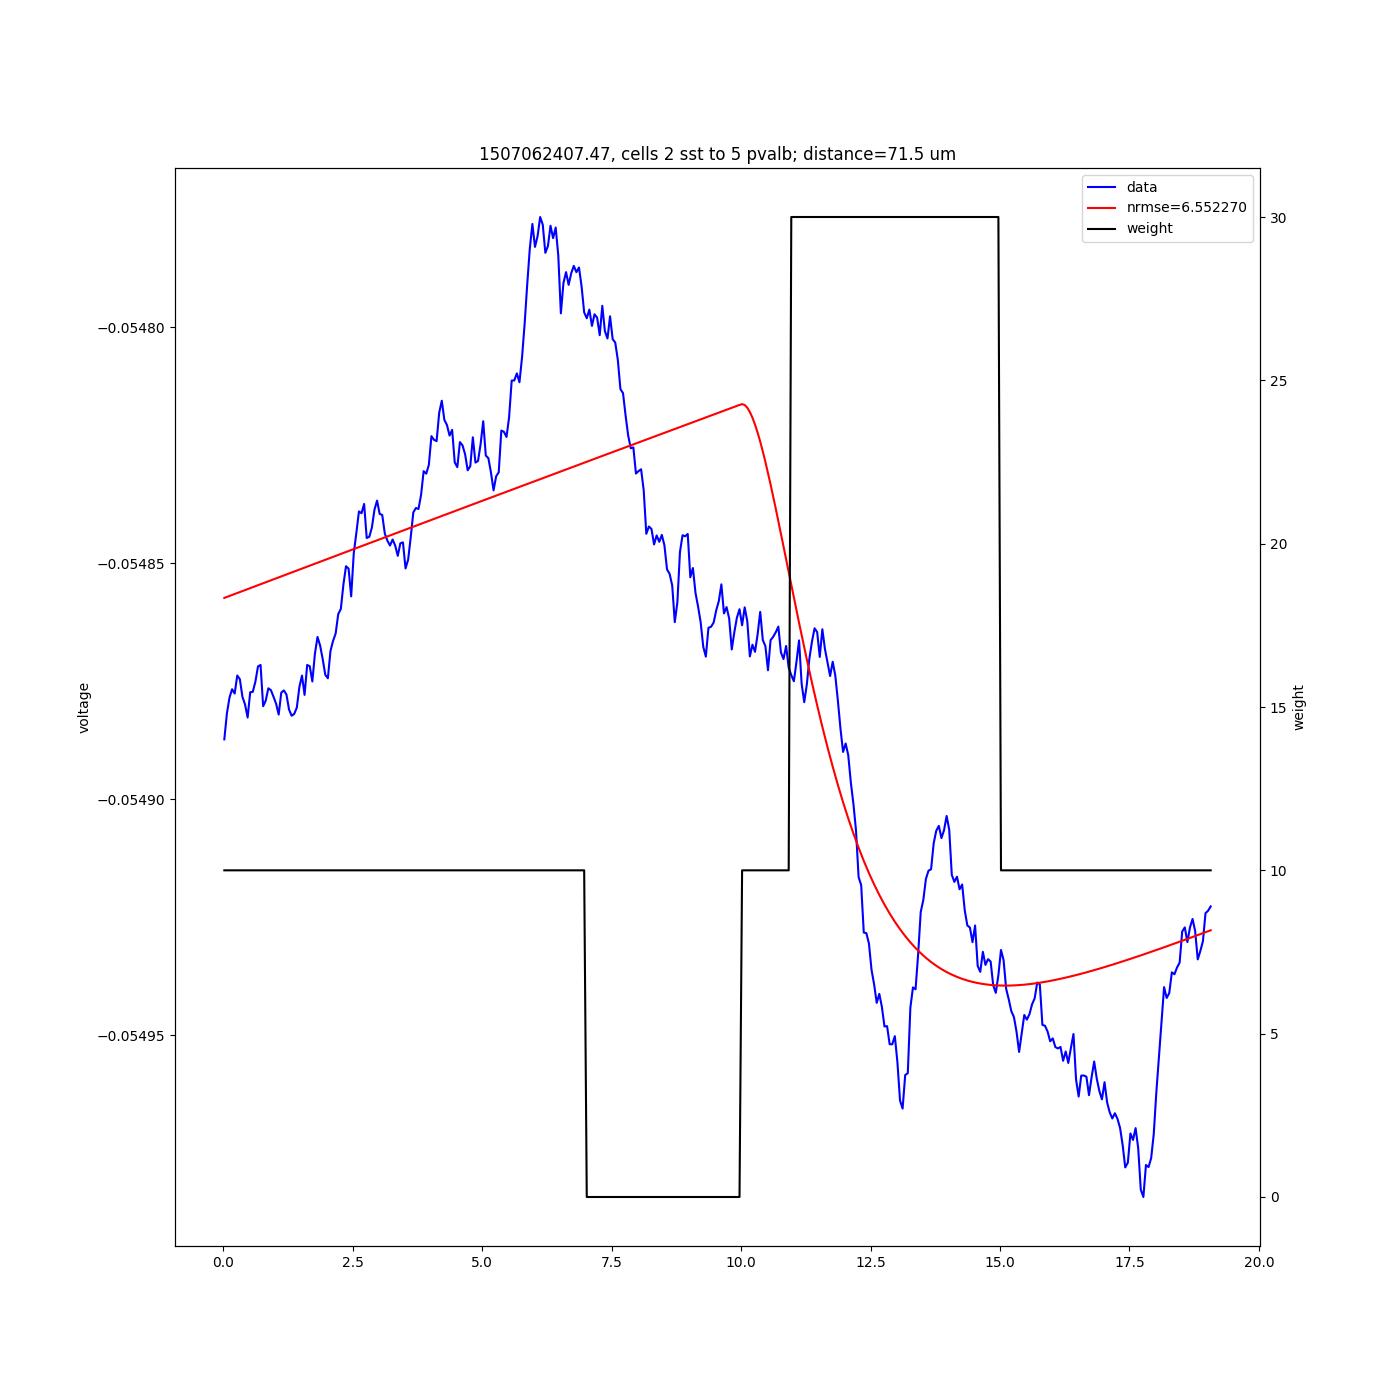

<type 'str'>


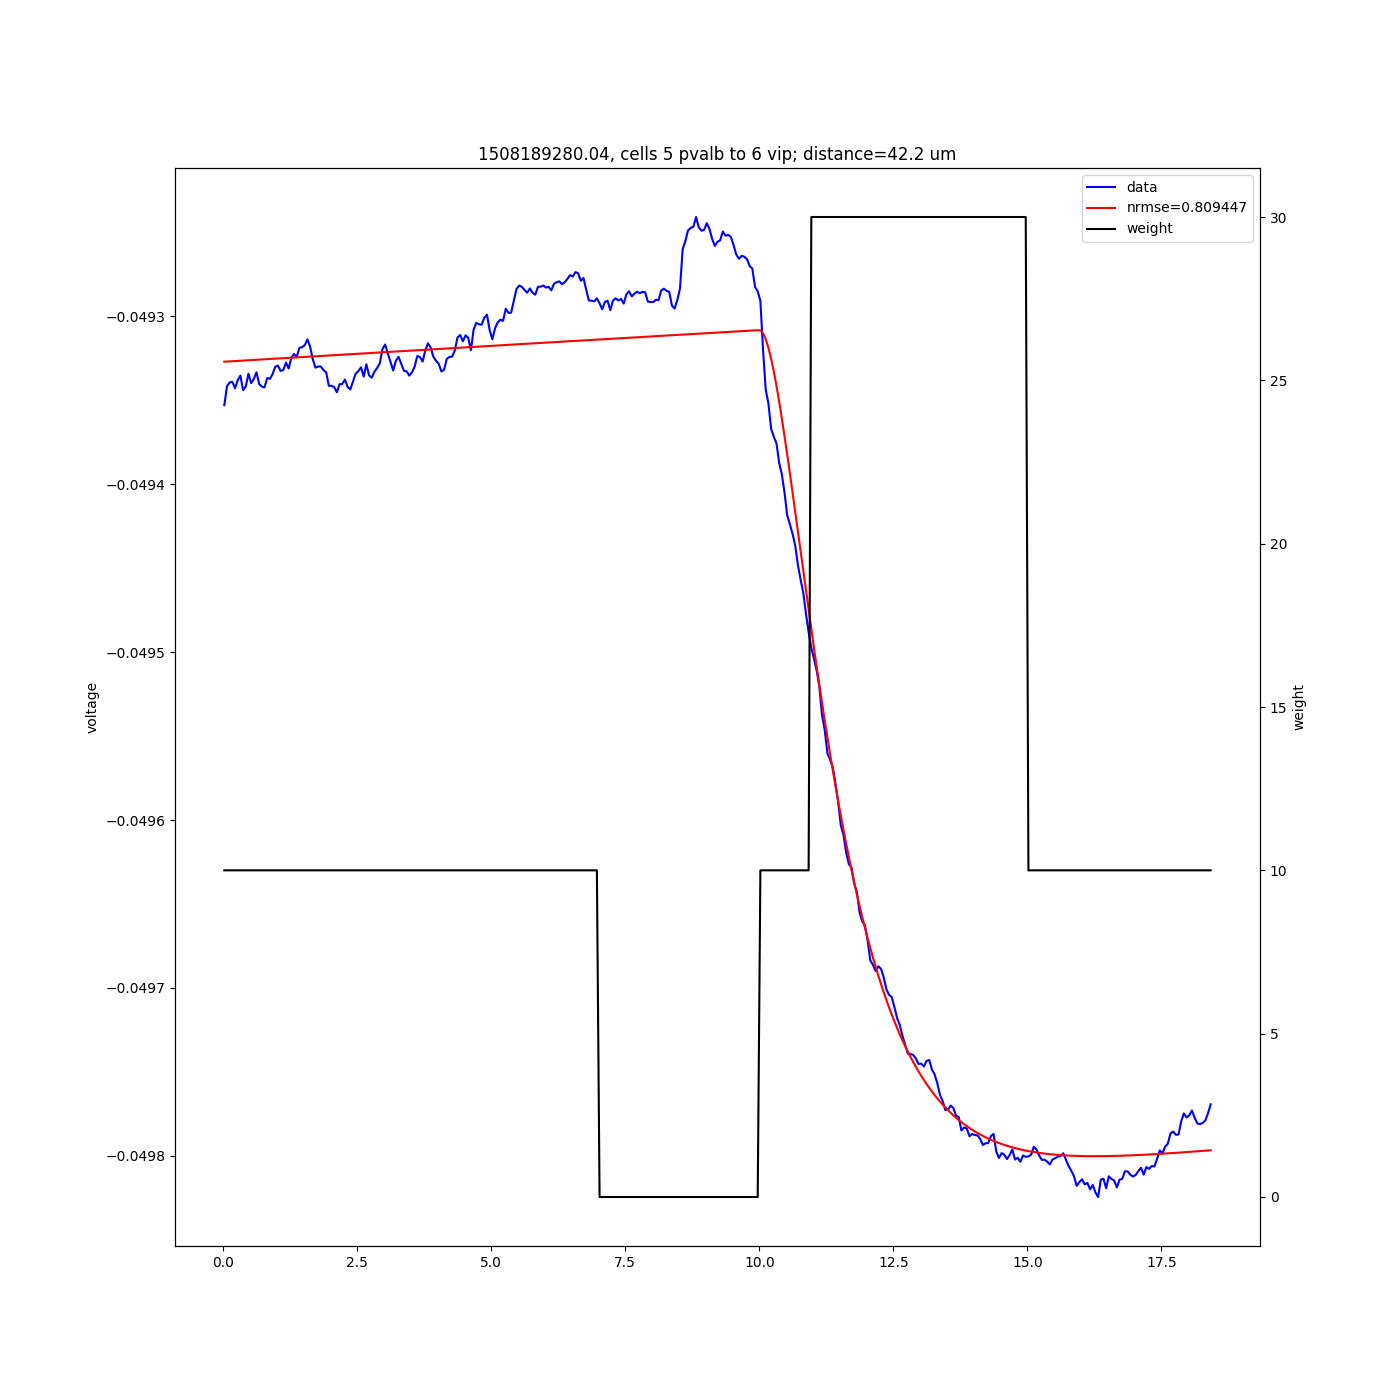

<type 'str'>


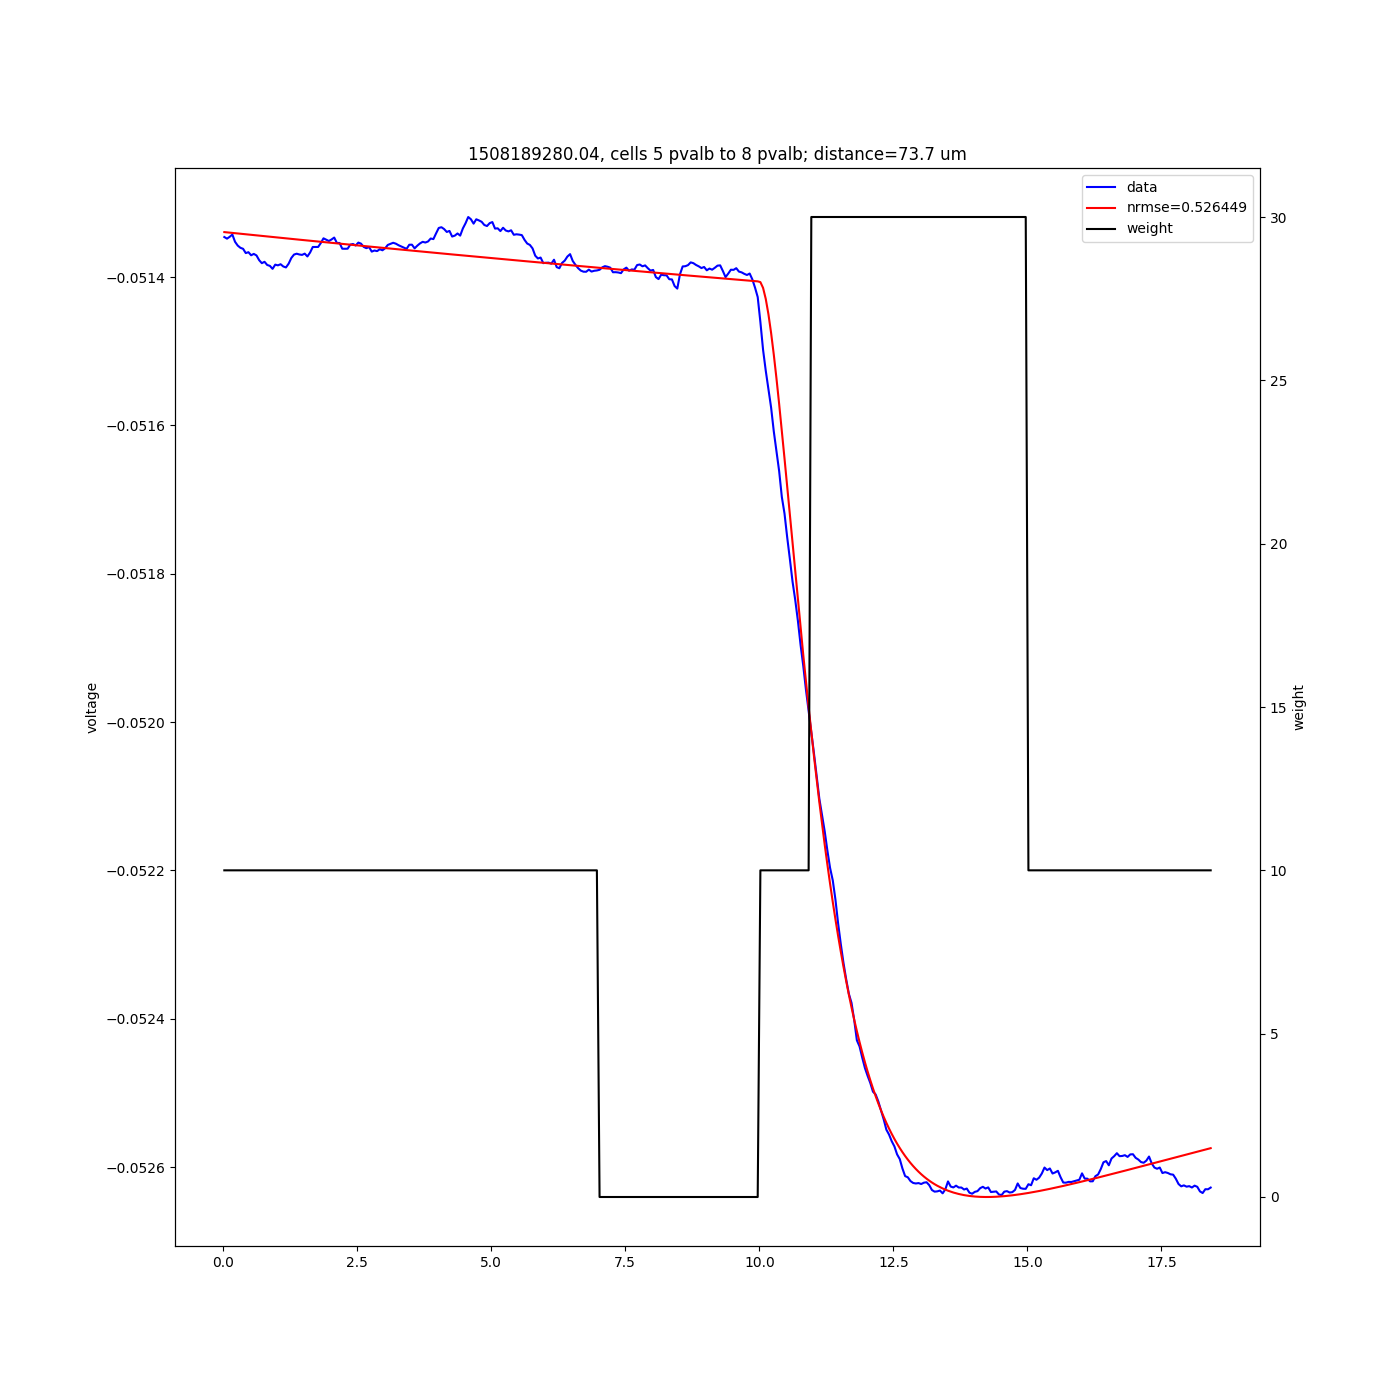

<type 'str'>


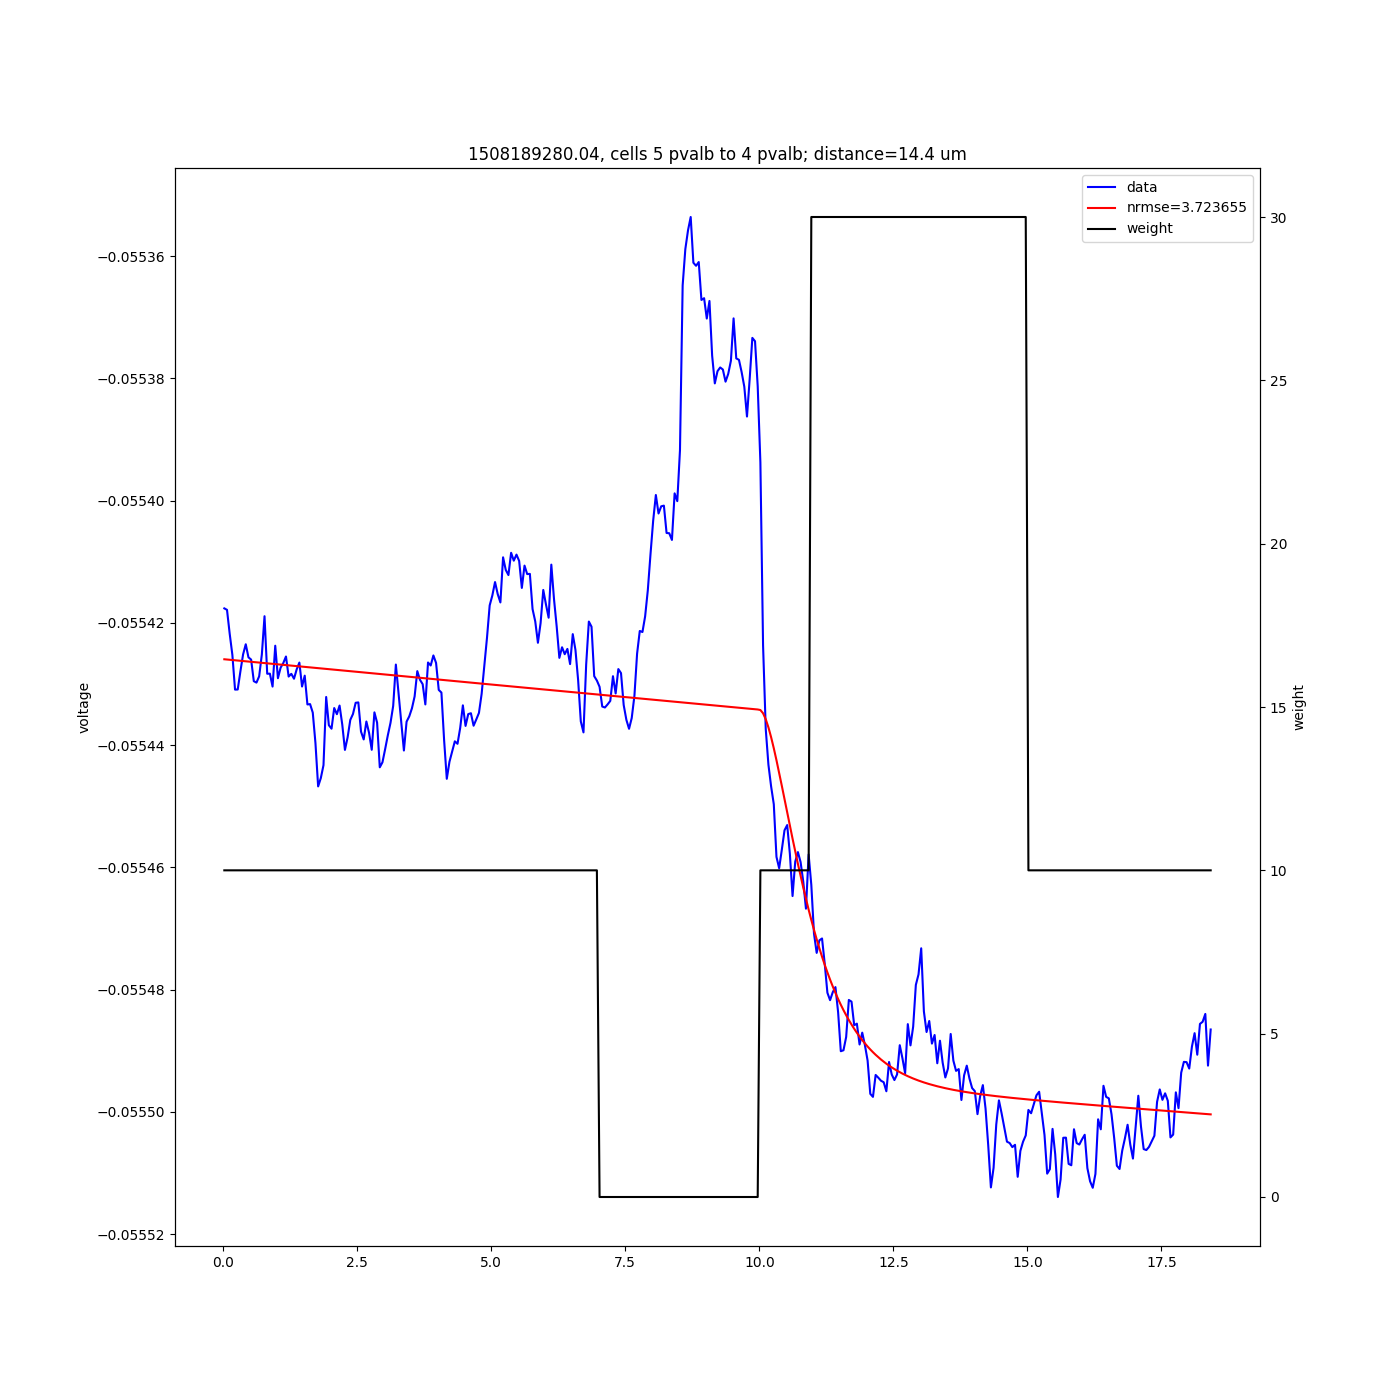

<type 'str'>


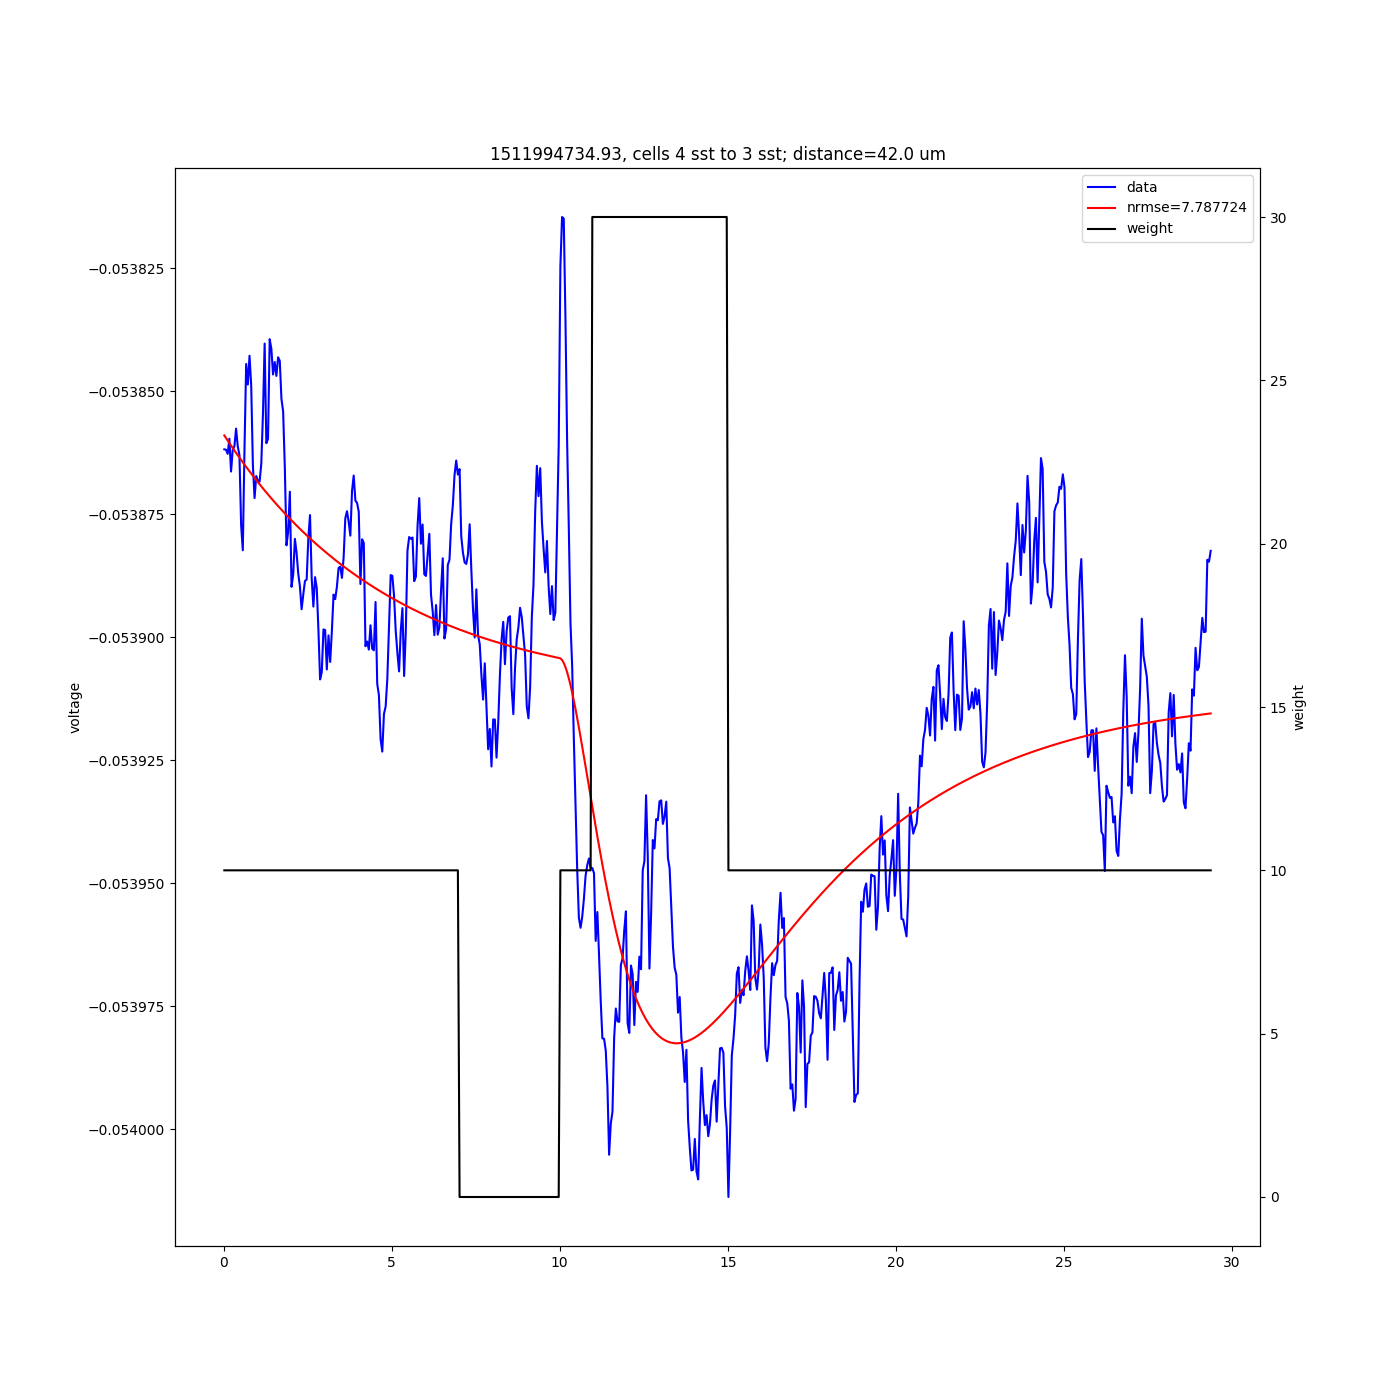

<type 'str'>


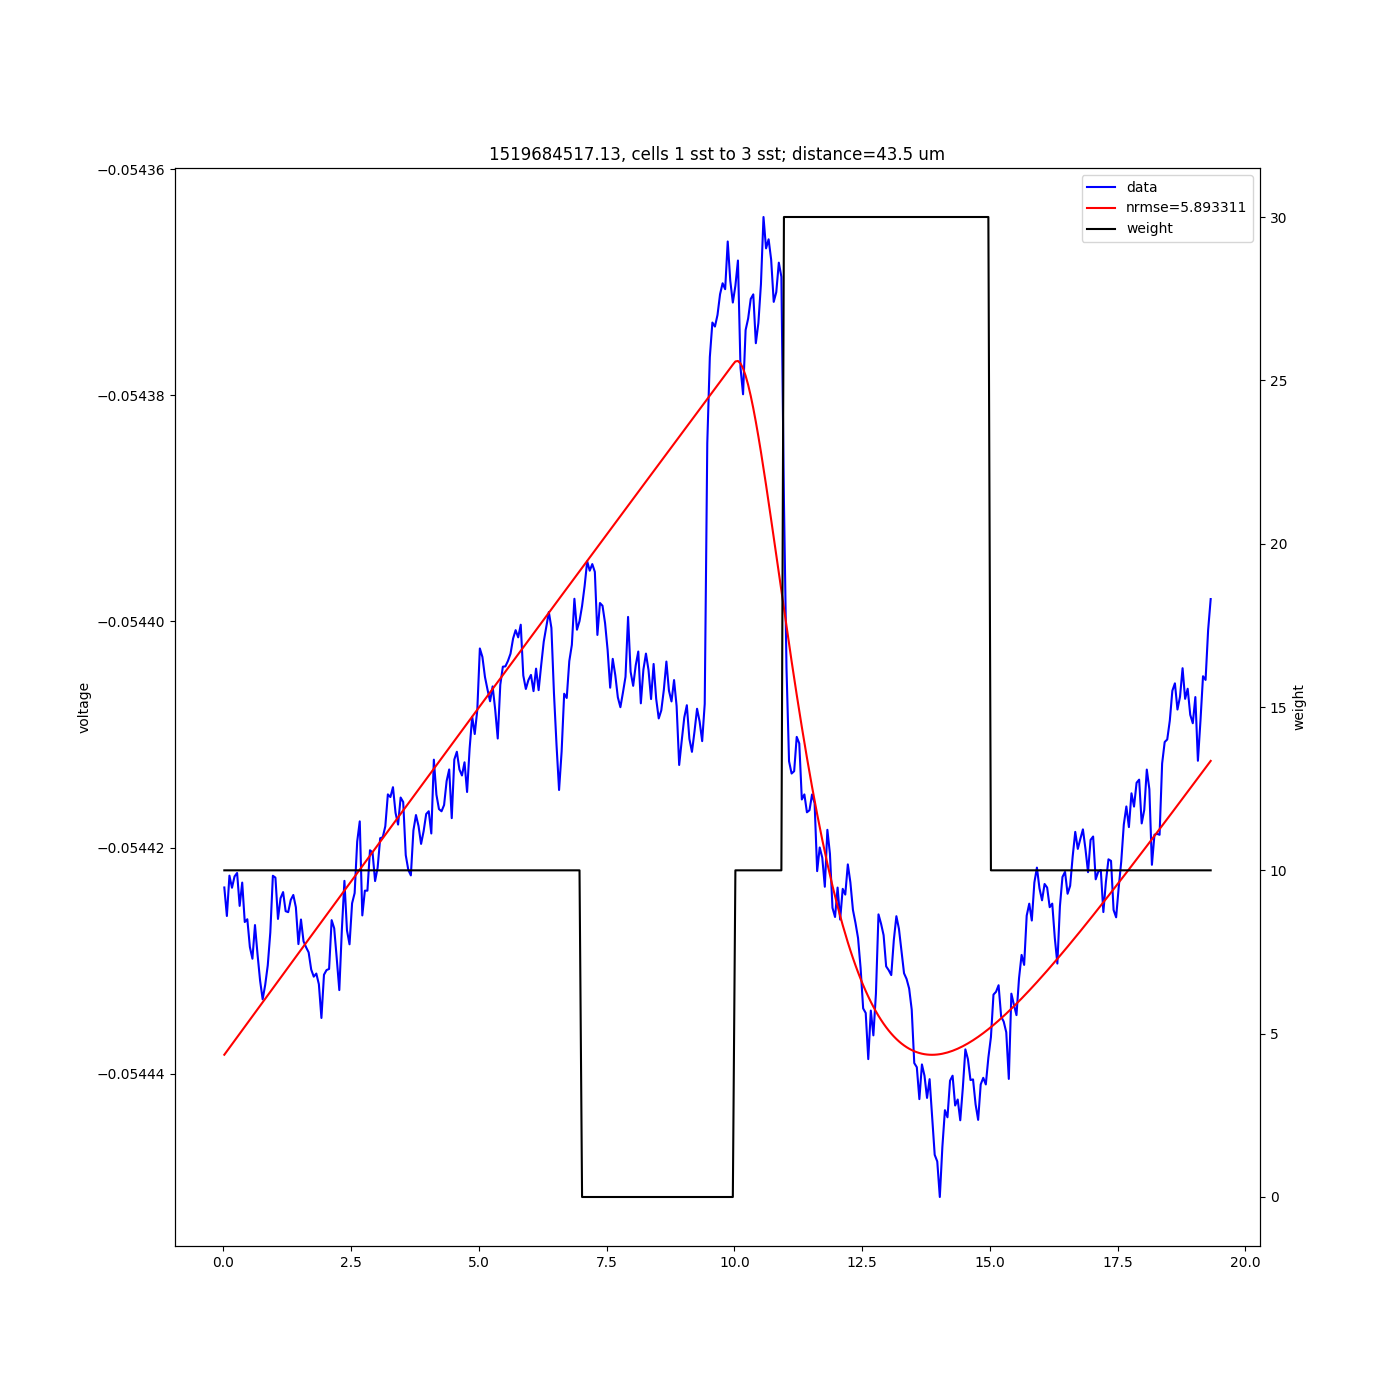

<type 'str'>


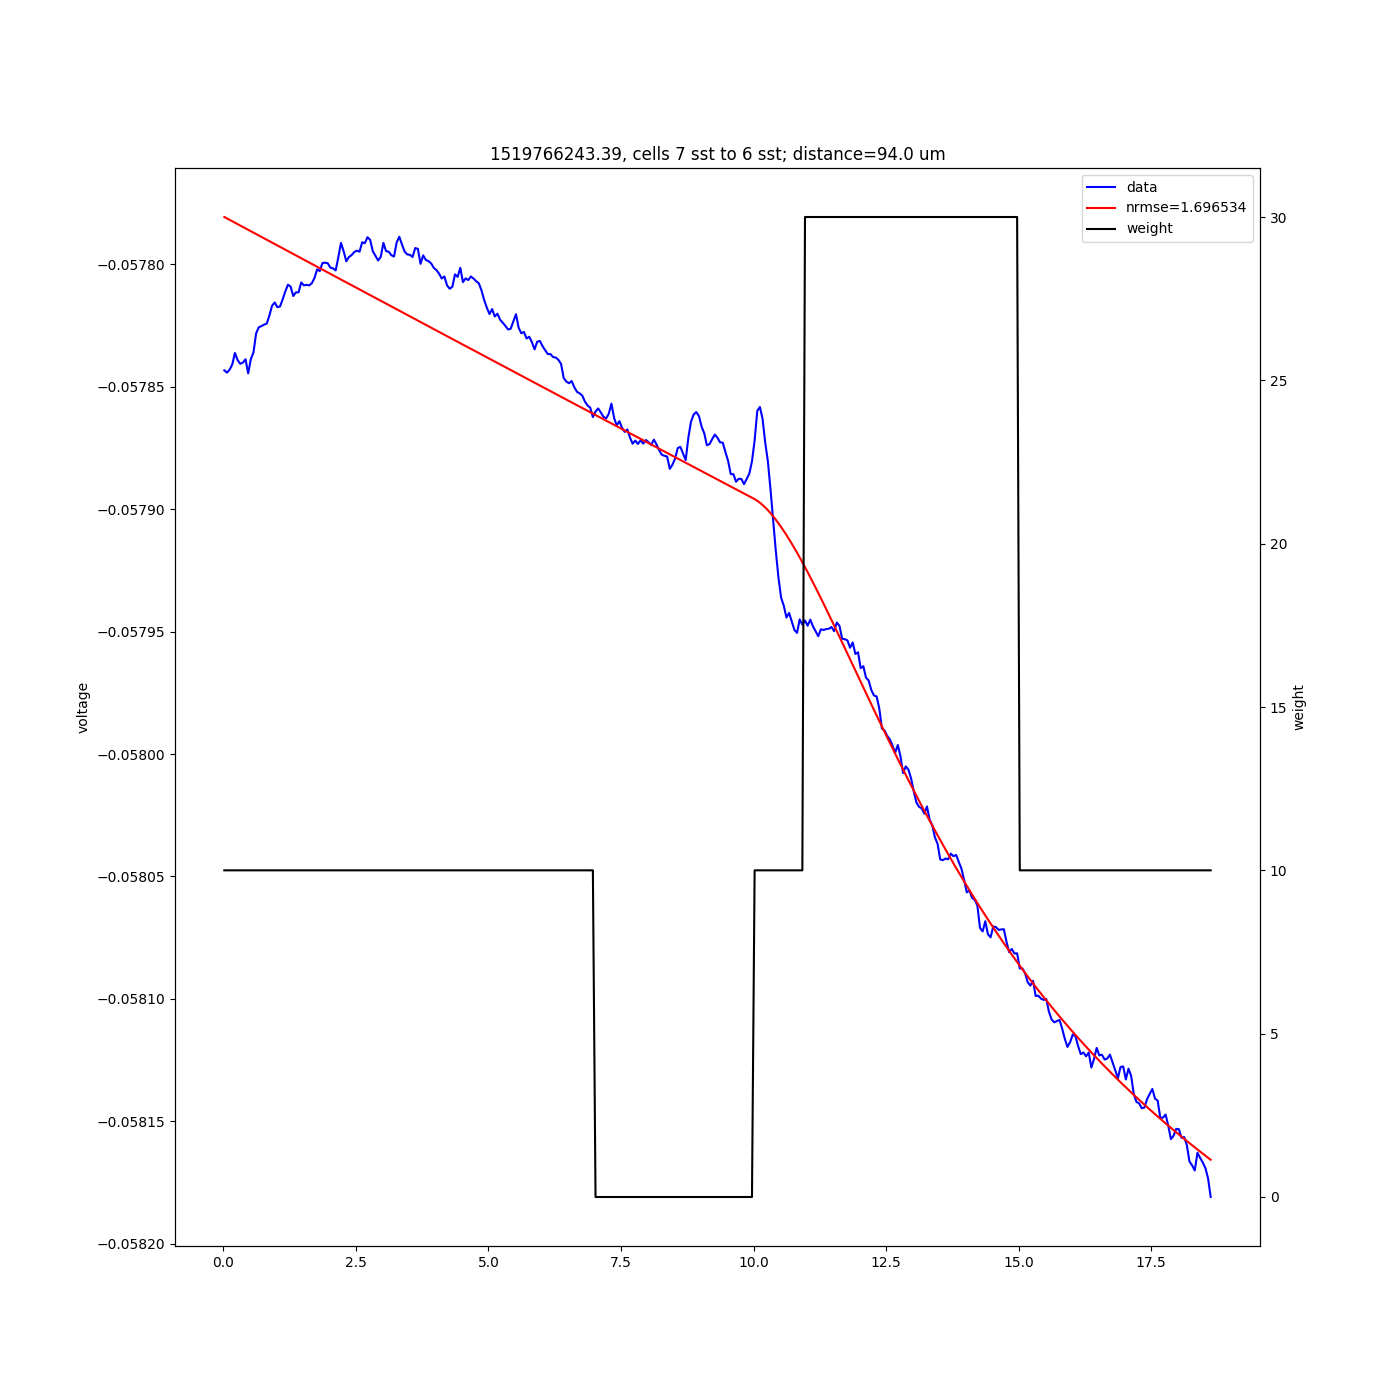

<type 'str'>


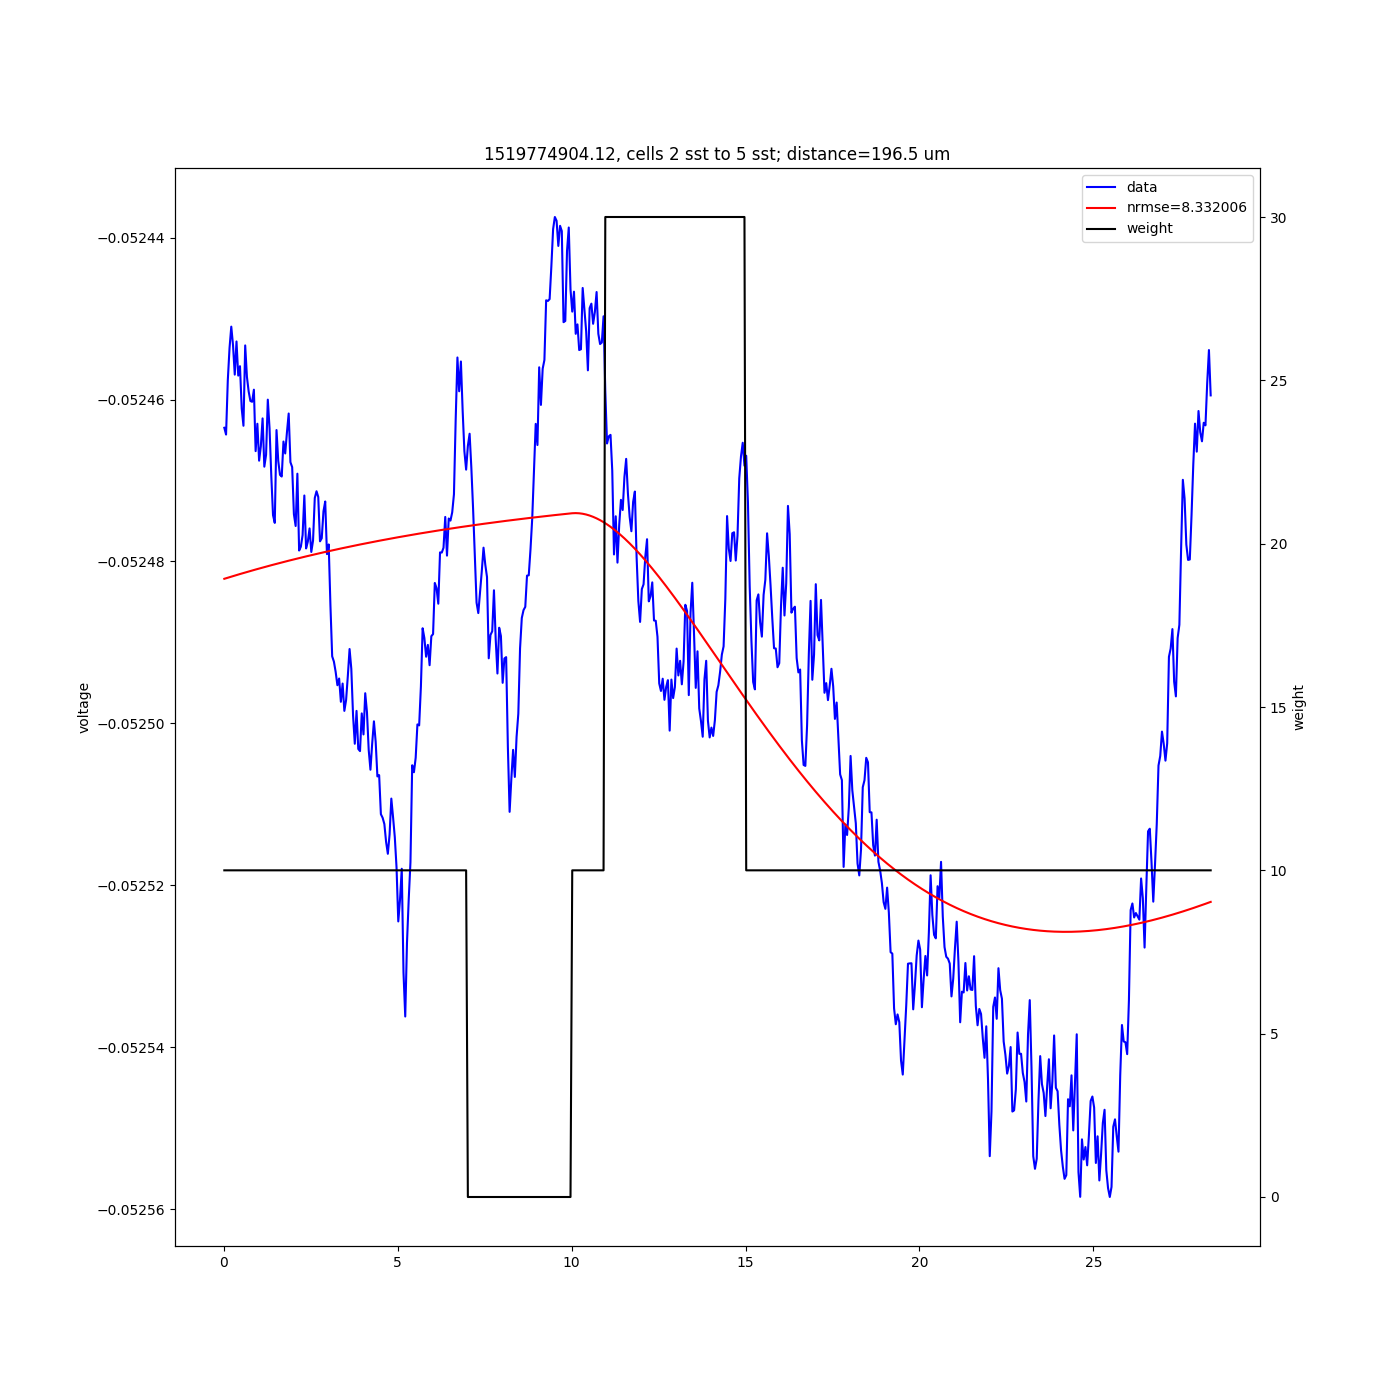

<type 'str'>


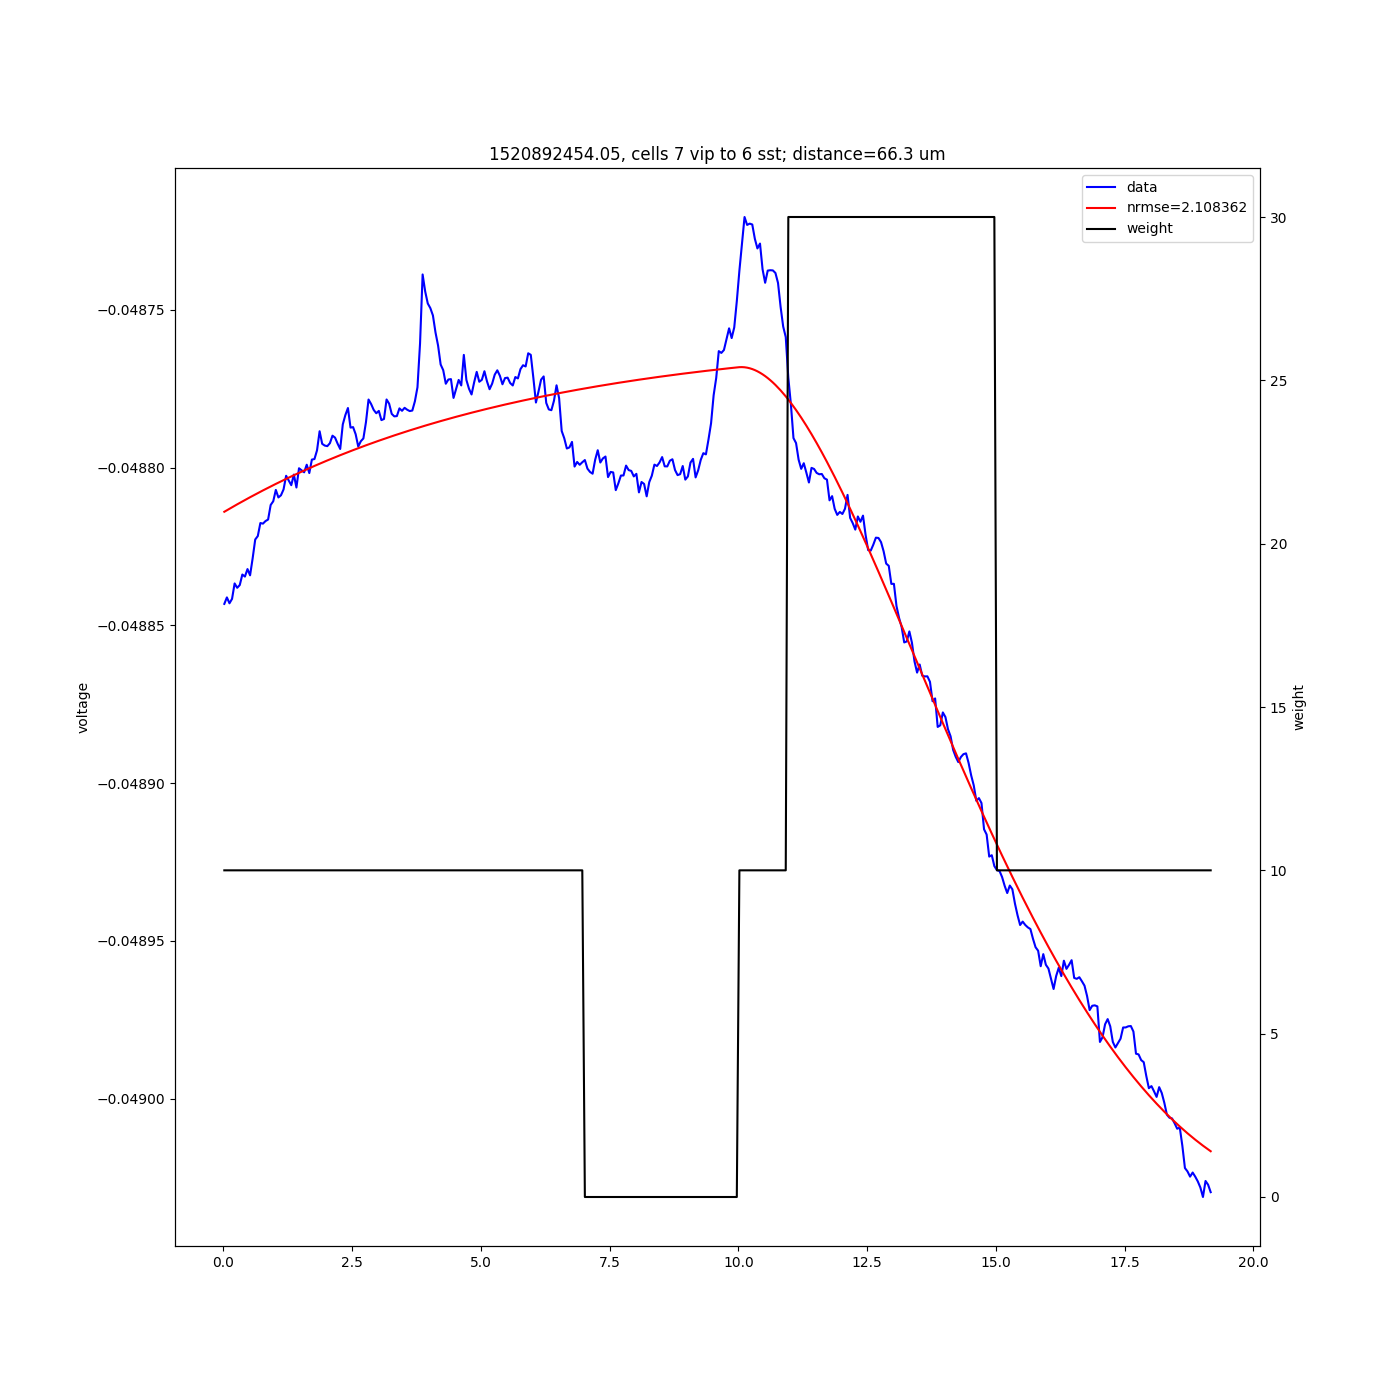

<type 'str'>


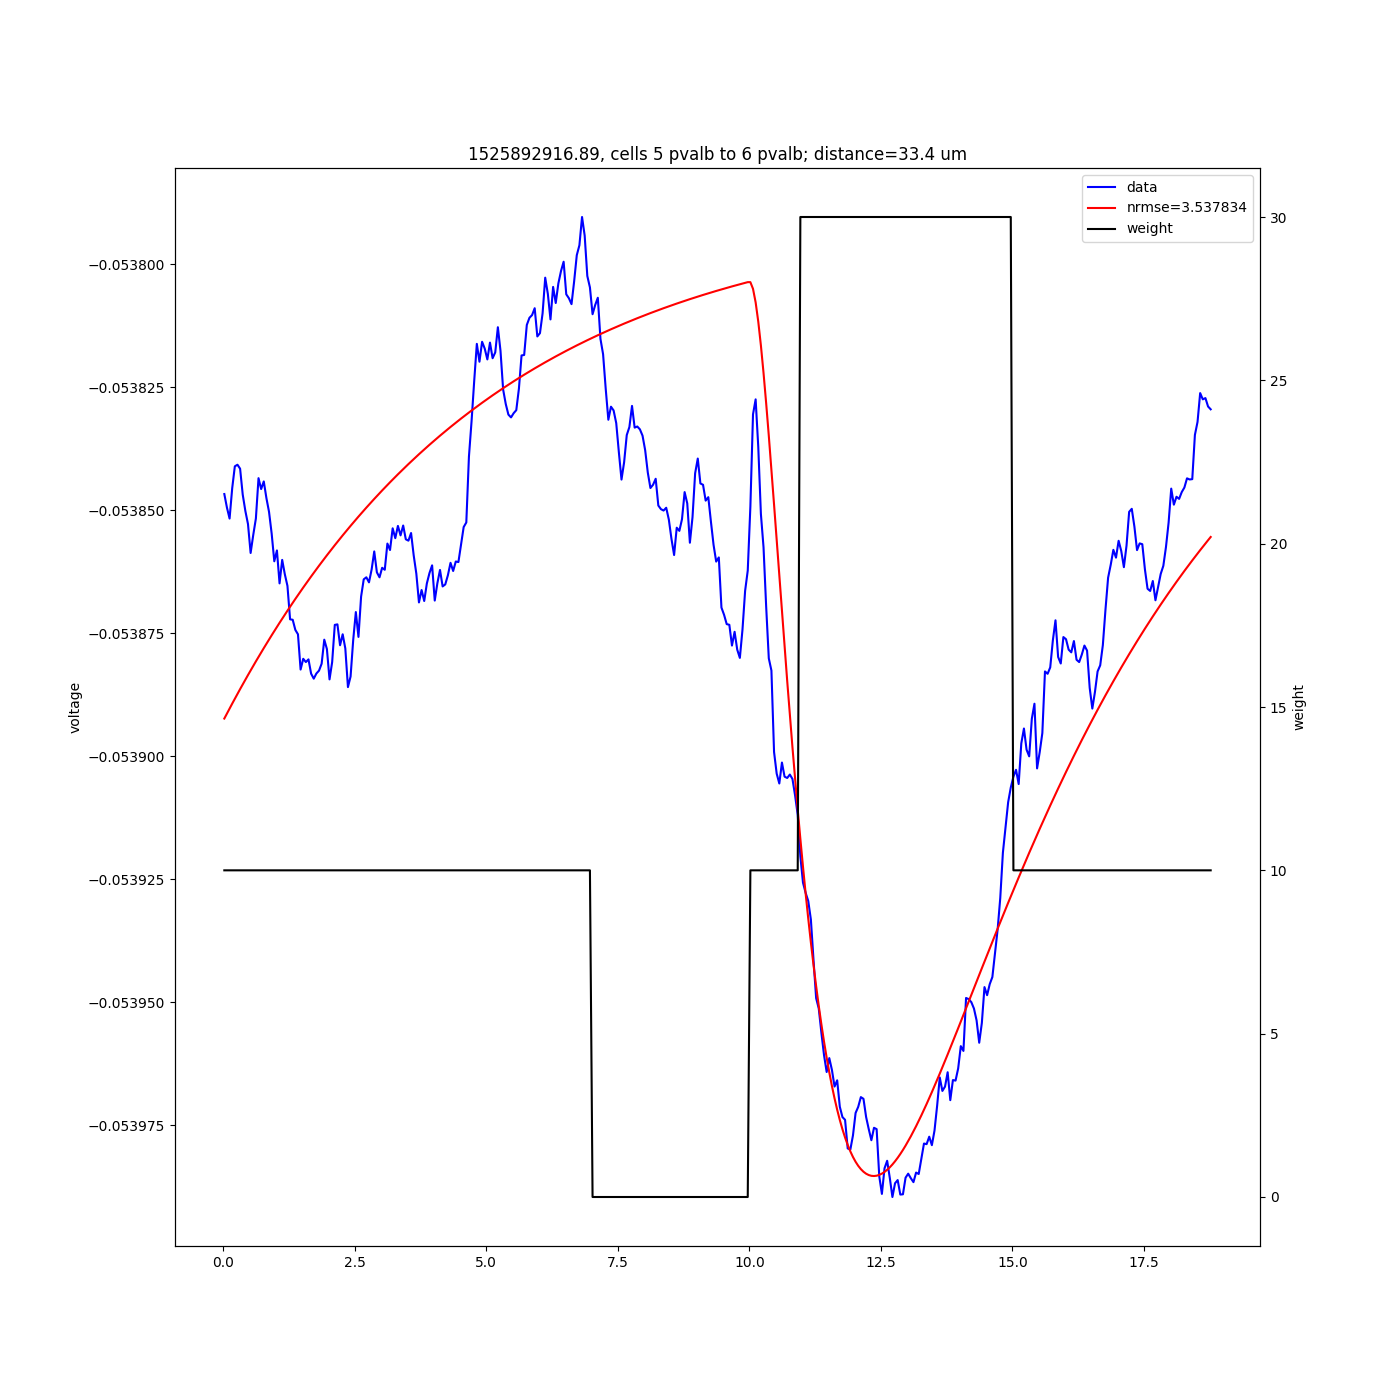

<type 'str'>


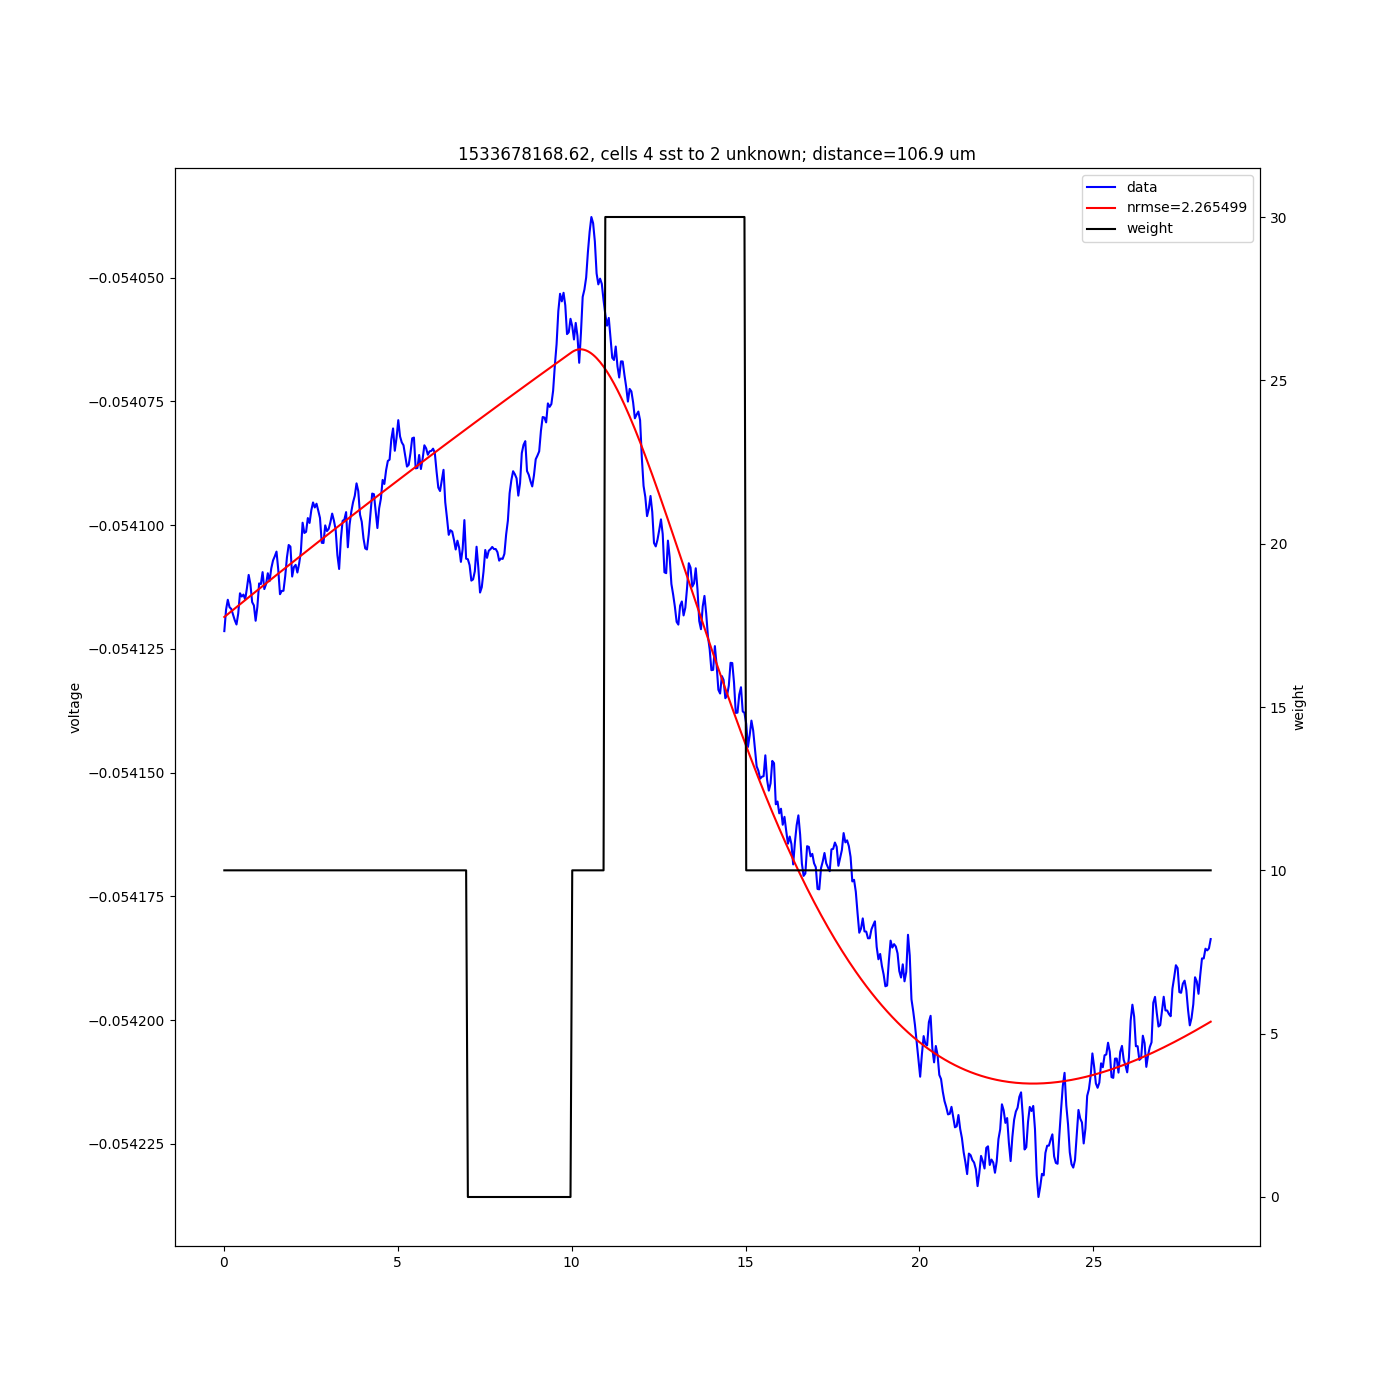

<type 'str'>


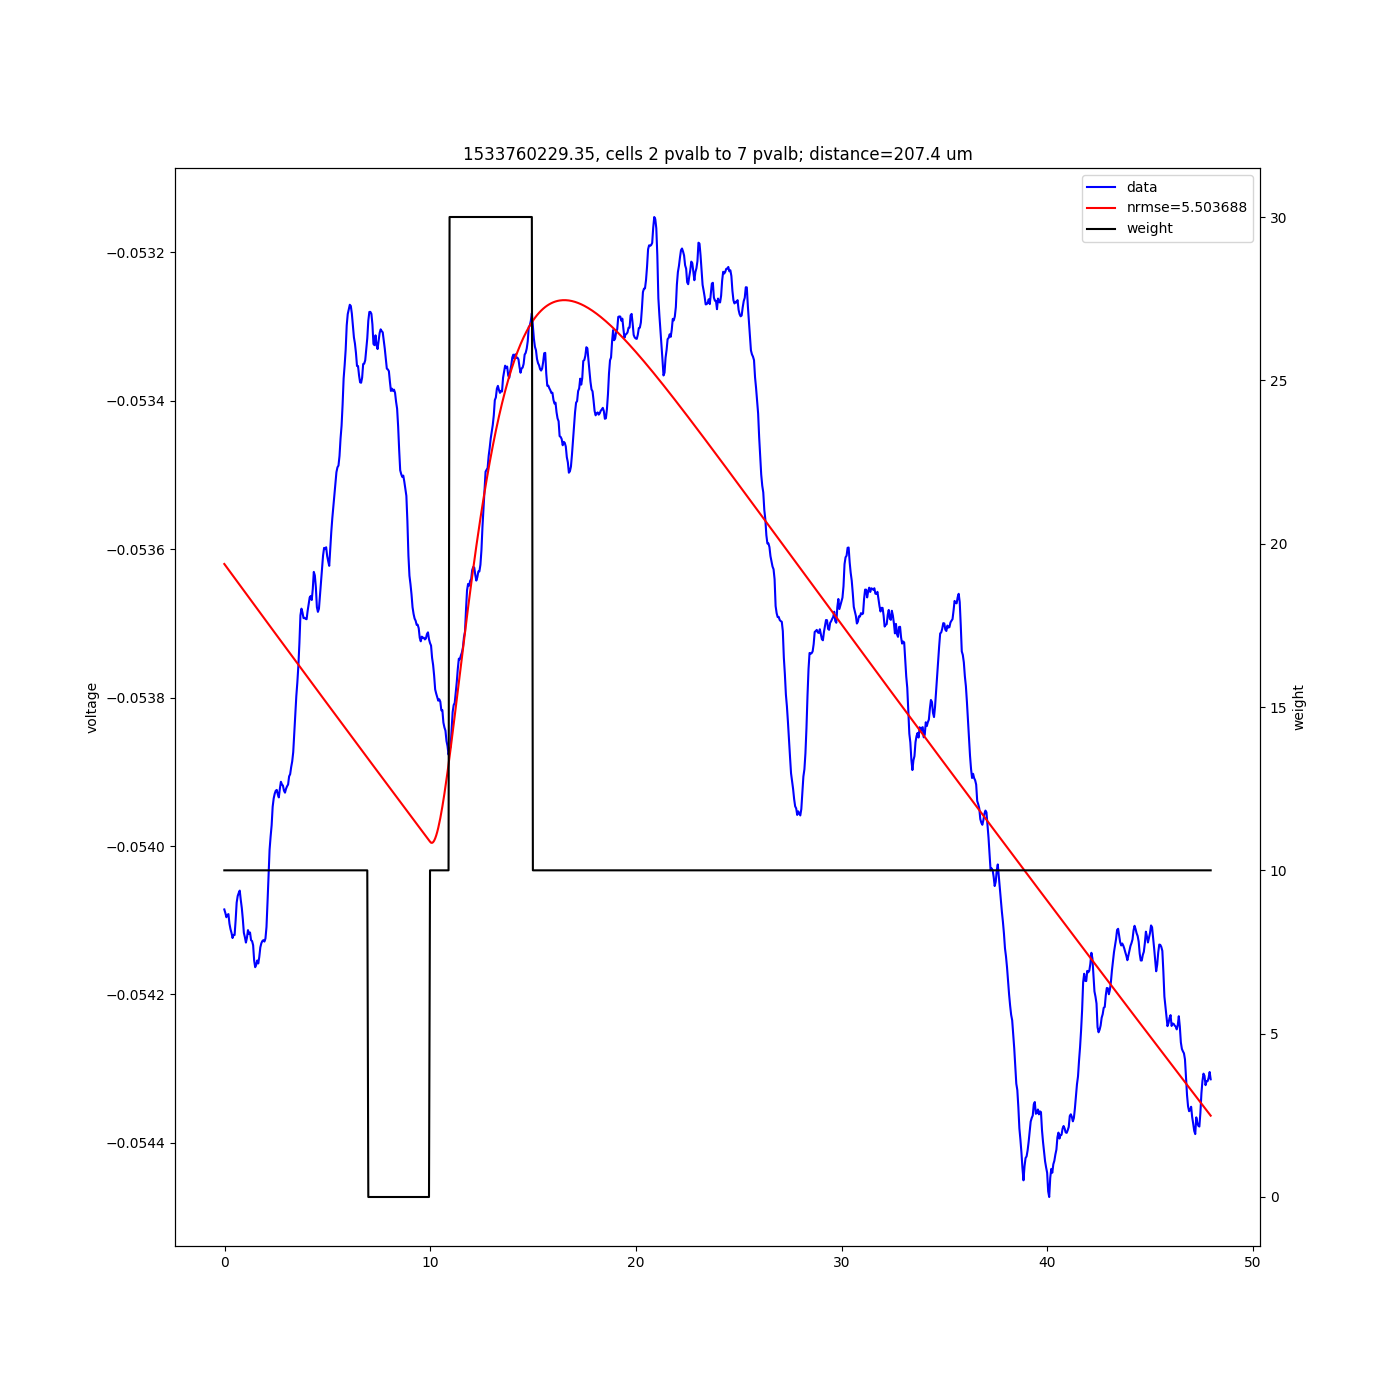

In [127]:
from IPython.display import Image, display 
for p in short_latency['image_path']:
    if type(p) is str:
        print type(p)
        display(Image(filename=p)) 


                uid  pre_cell_id  post_cell_id       latency           amp      NRMSE  n_sweeps
9302  1487978611.61            2             1  1.163618e-03  1.706512e-04  11.757512        43
9109   1489441647.6            6             5  1.359837e-03  3.083617e-04  10.071158        37
9071  1489612566.09            2             3  0.000000e+00  2.732140e-04   4.815707        35
8630  1491344474.78            4             1  7.586134e-04  1.239739e-03   4.207871         1
8594  1491597493.27            6             2  2.452718e-03  2.644223e-03   7.016695        10
8212  1493238297.84            2             3  1.310417e-03  6.240595e-05   5.359951        10
8009  1494630290.65            5             4  3.418983e-03  4.378839e-05  11.207303        35
8061  1494633087.08            3             2  5.000000e-03  3.721906e-05   4.549630        38
7955   1495139316.1            3             6  1.838807e-16  2.445859e-05   9.564989        40
7675  1496183885.88            2        

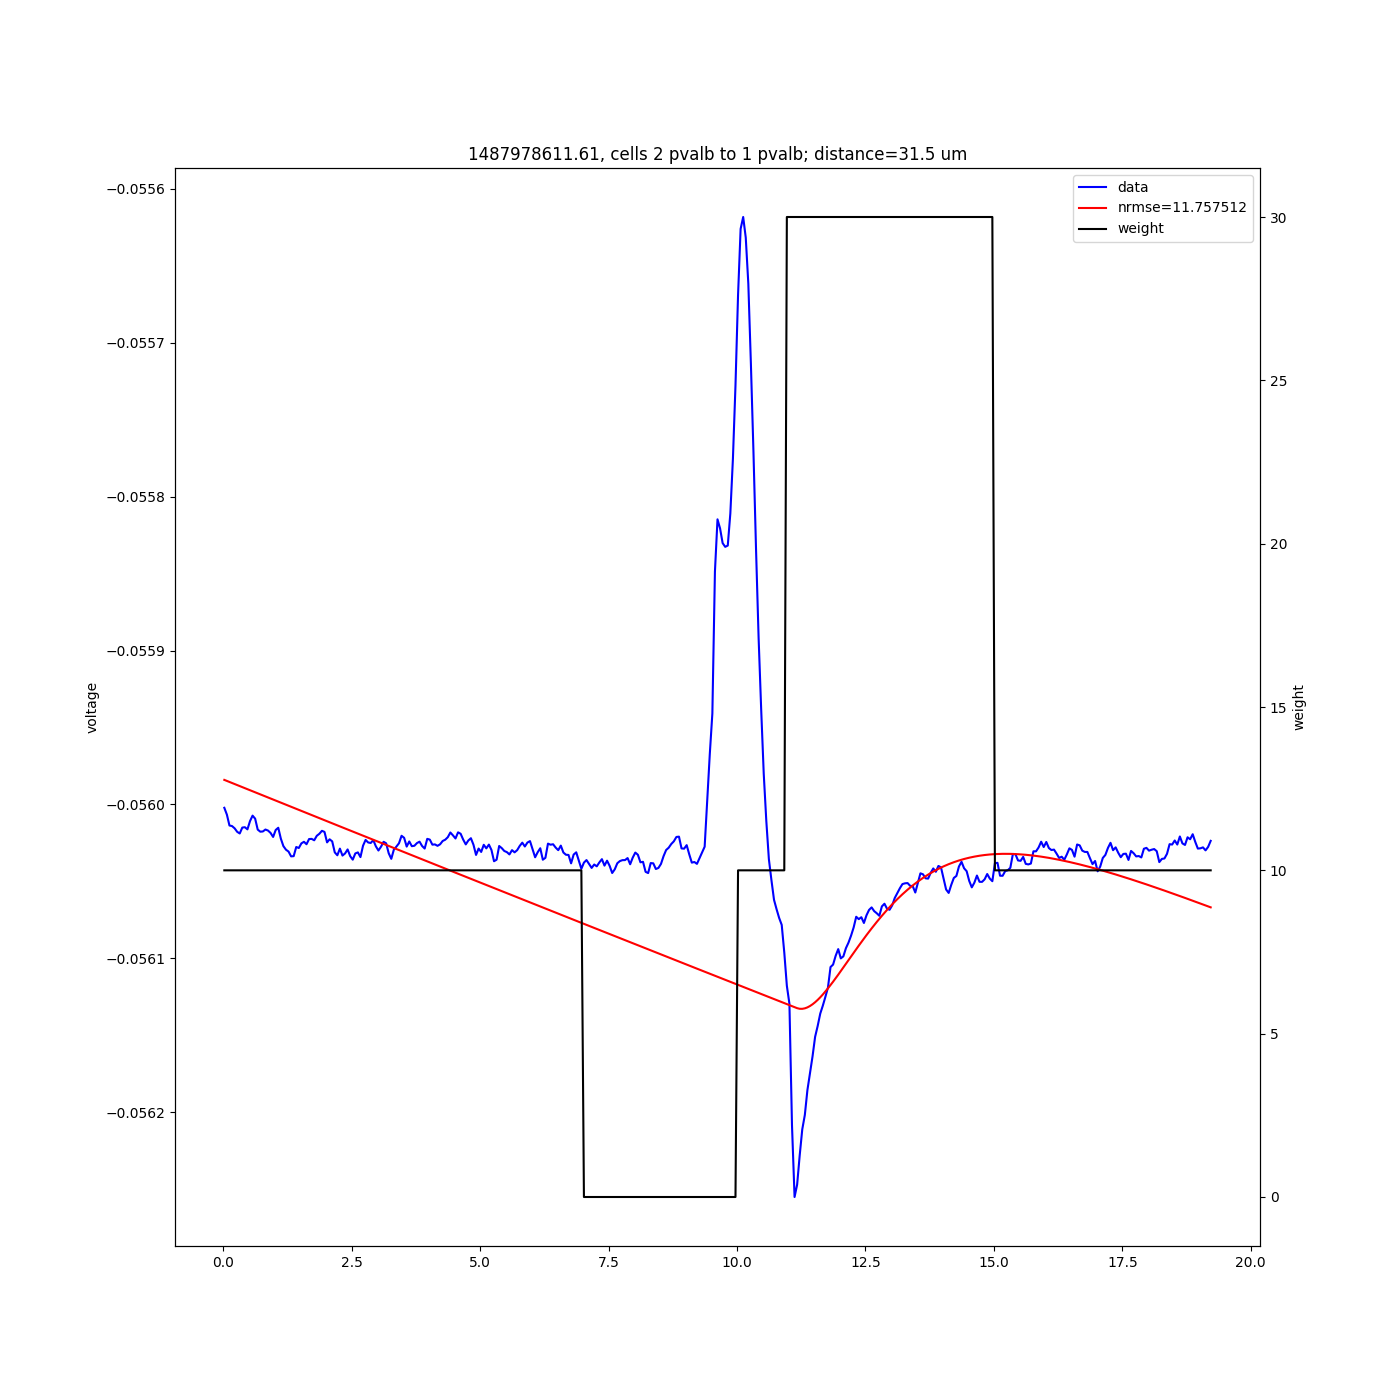

<type 'str'>


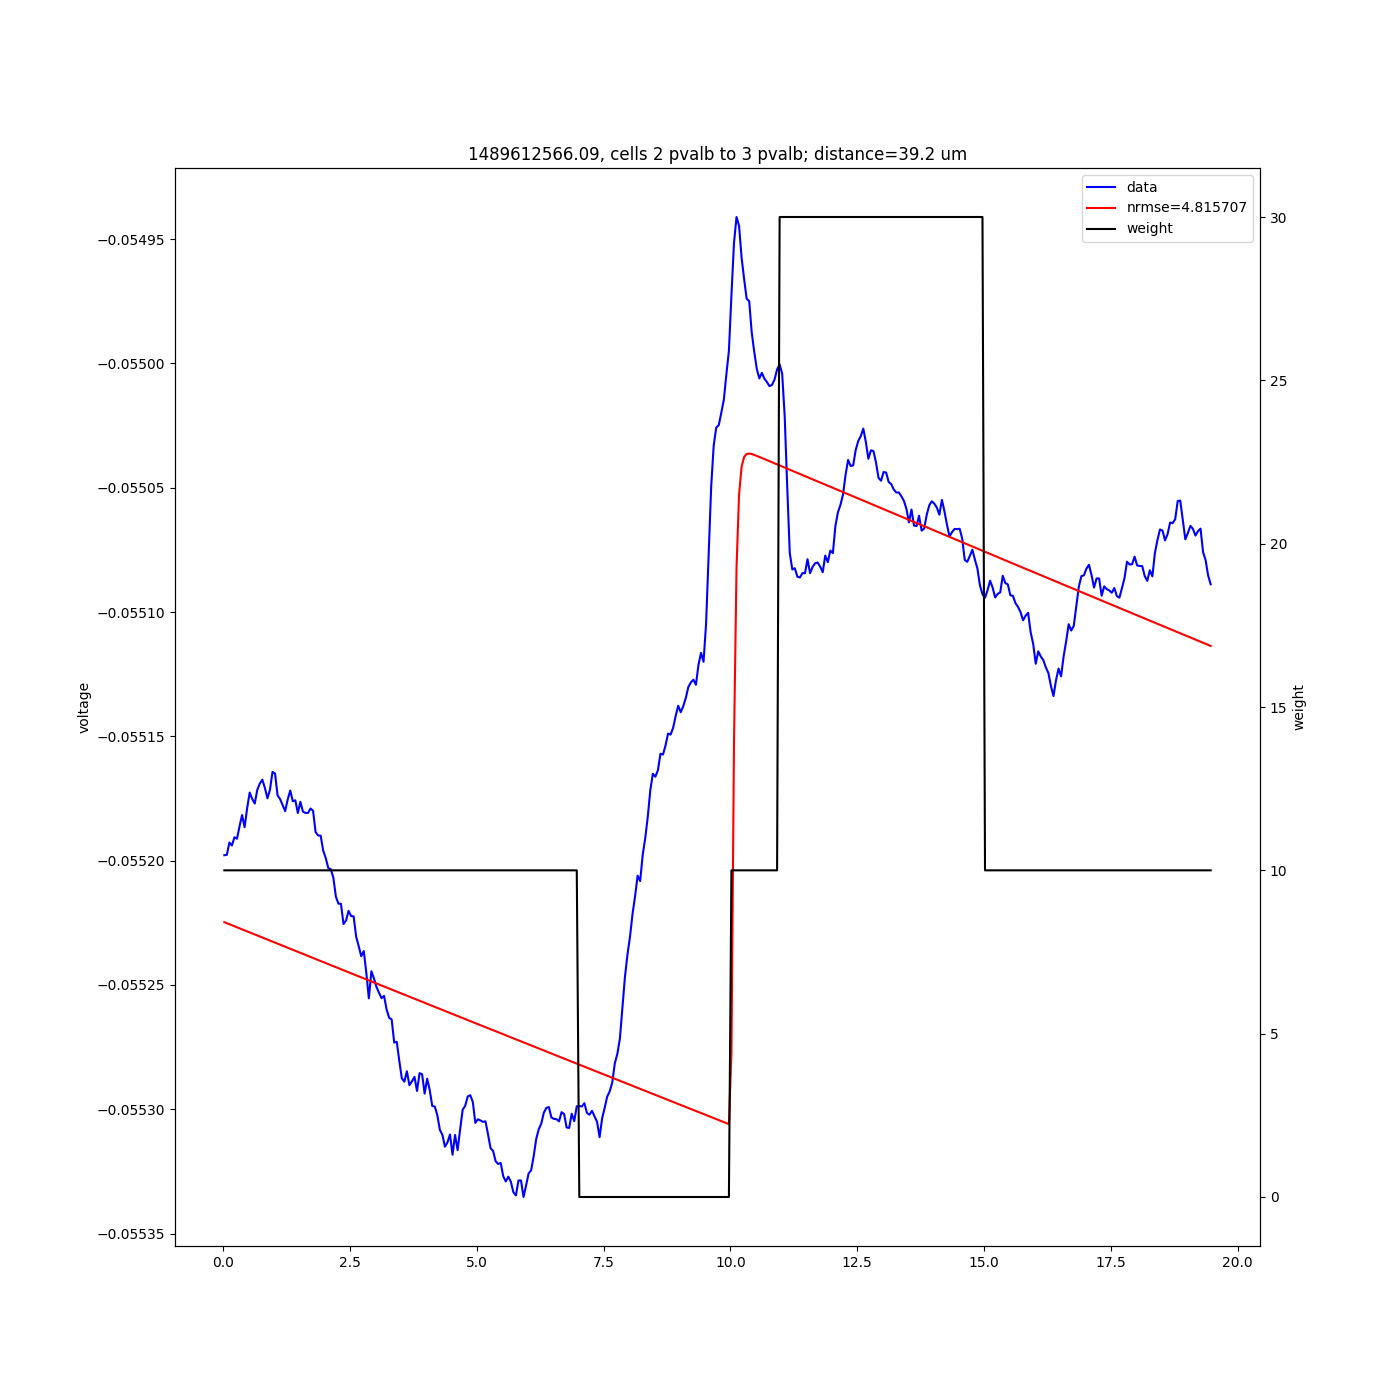

<type 'str'>


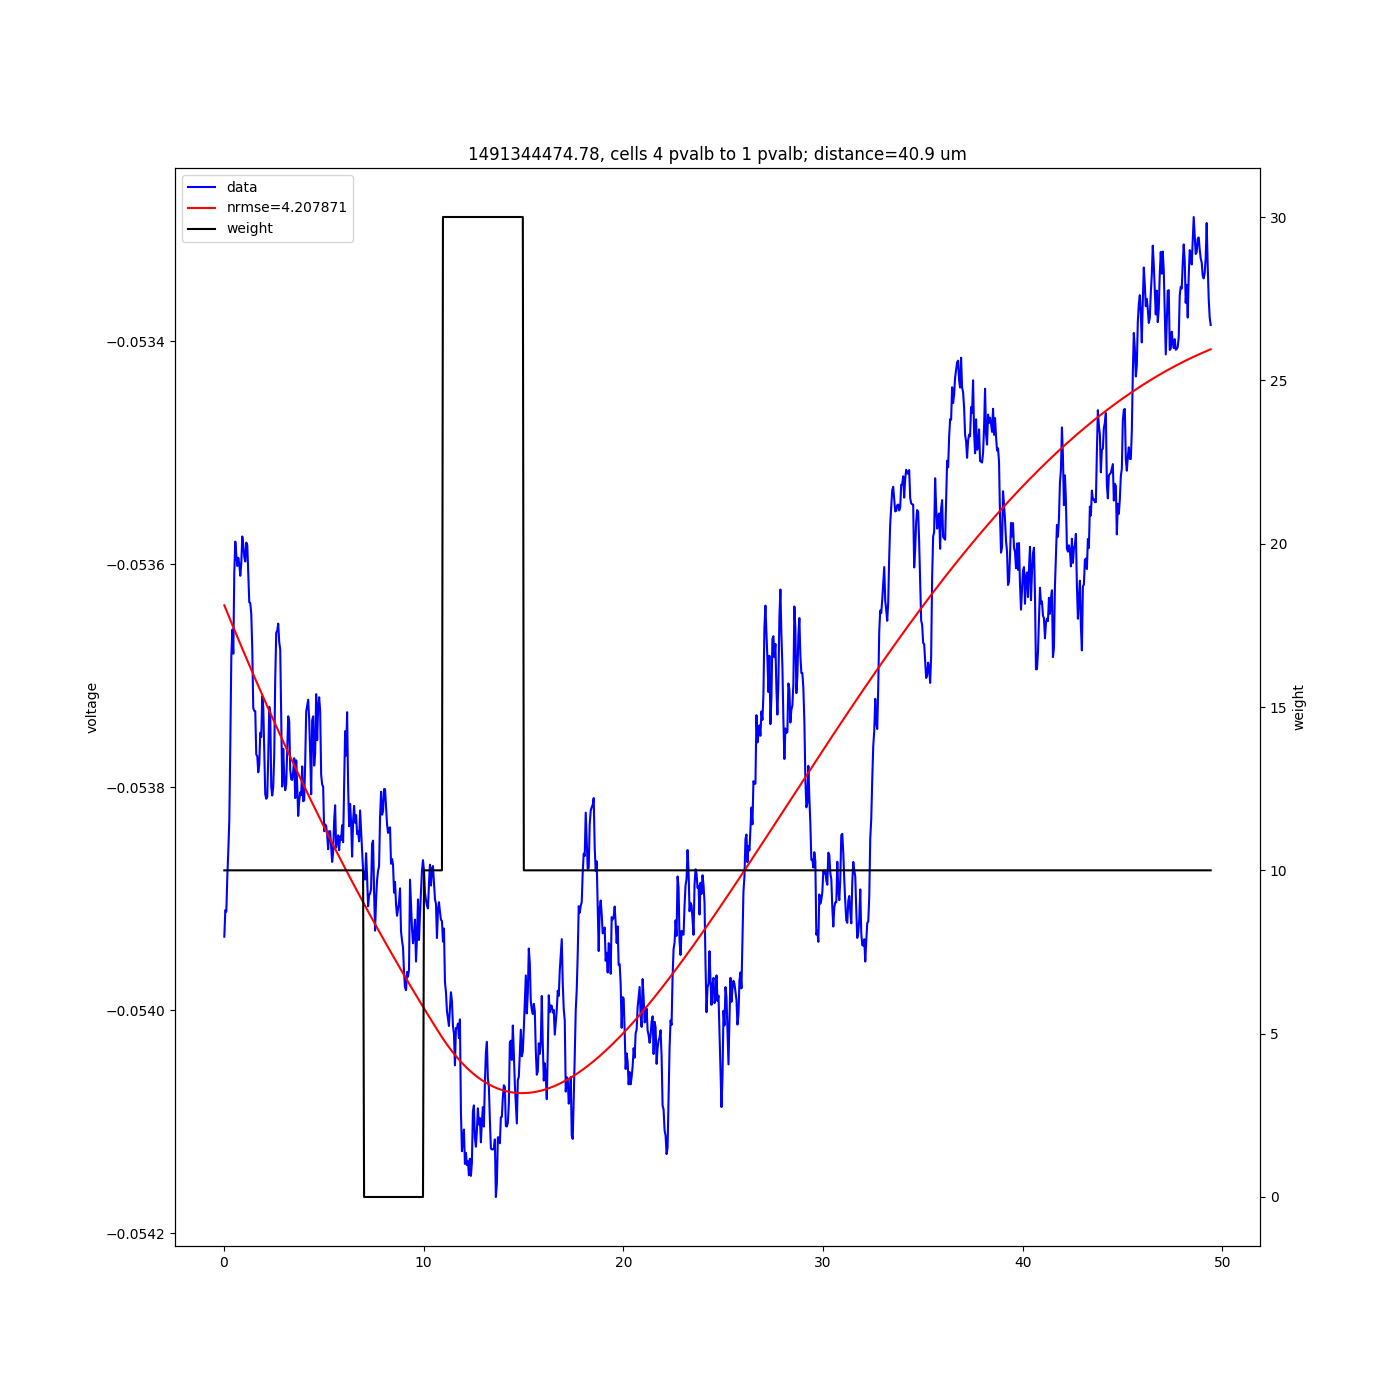

<type 'str'>


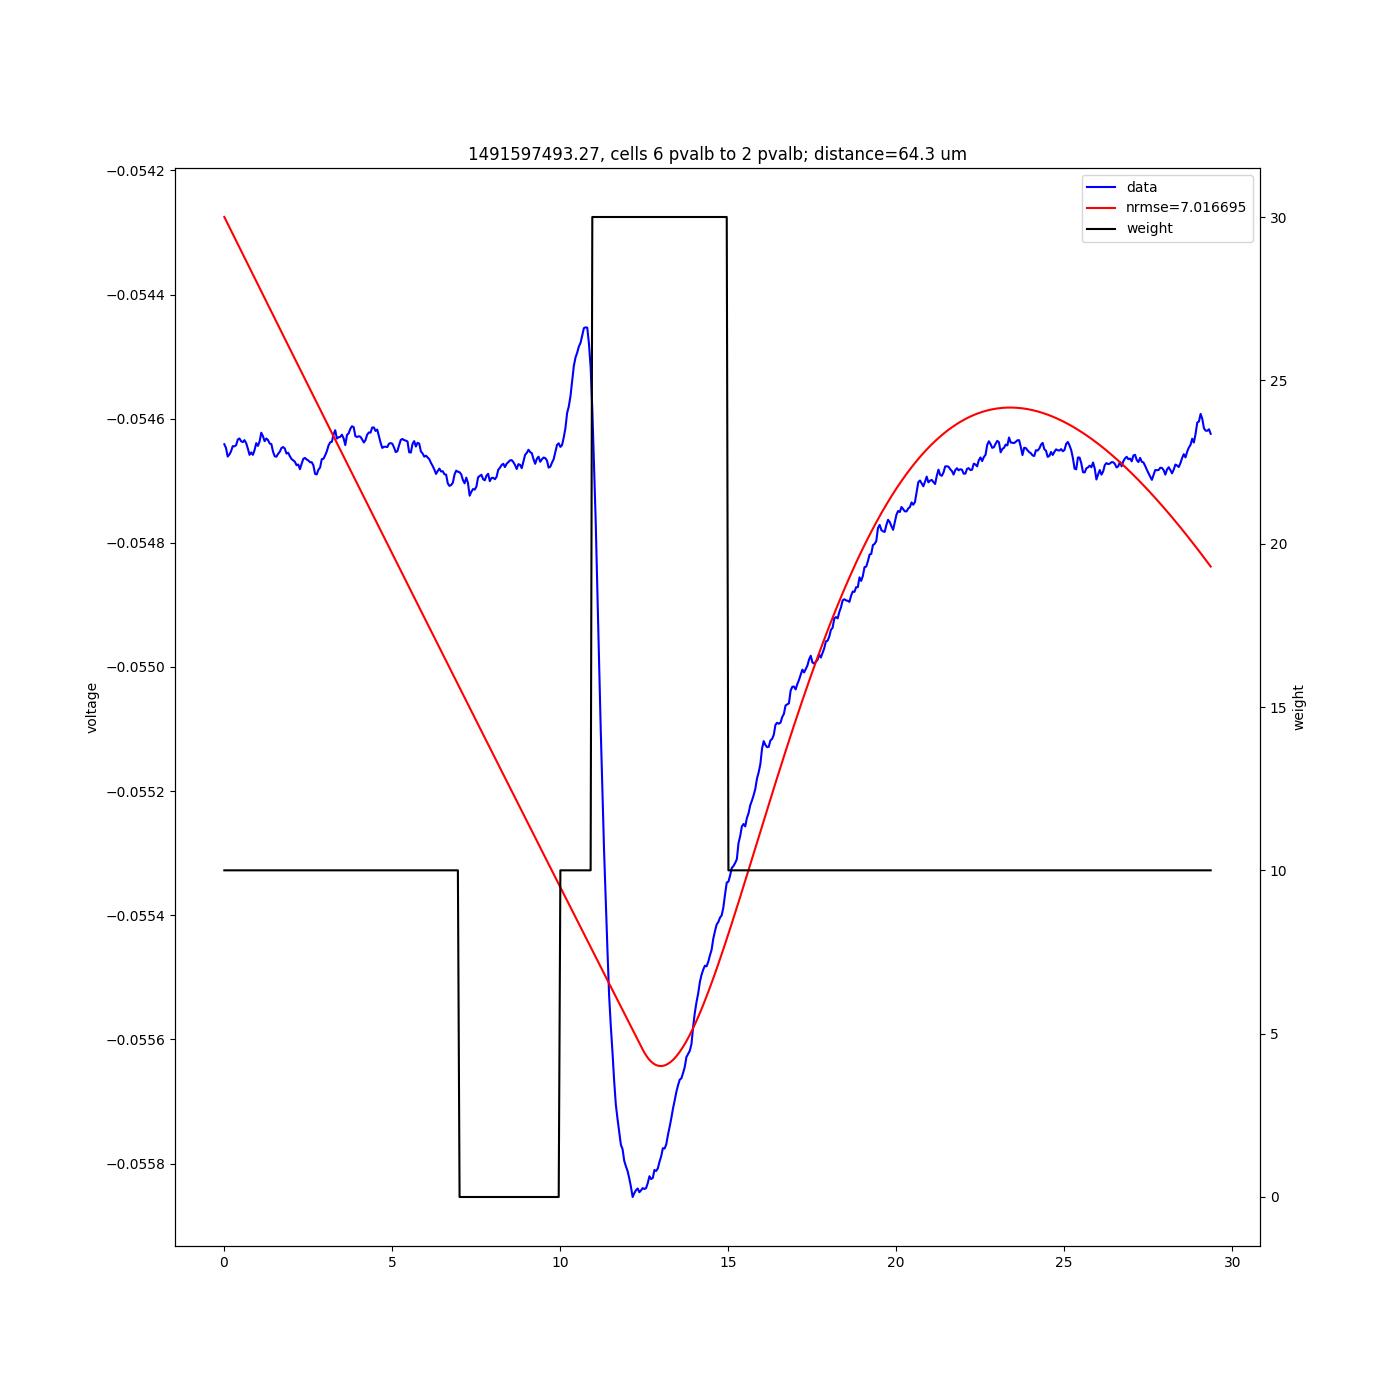

<type 'str'>


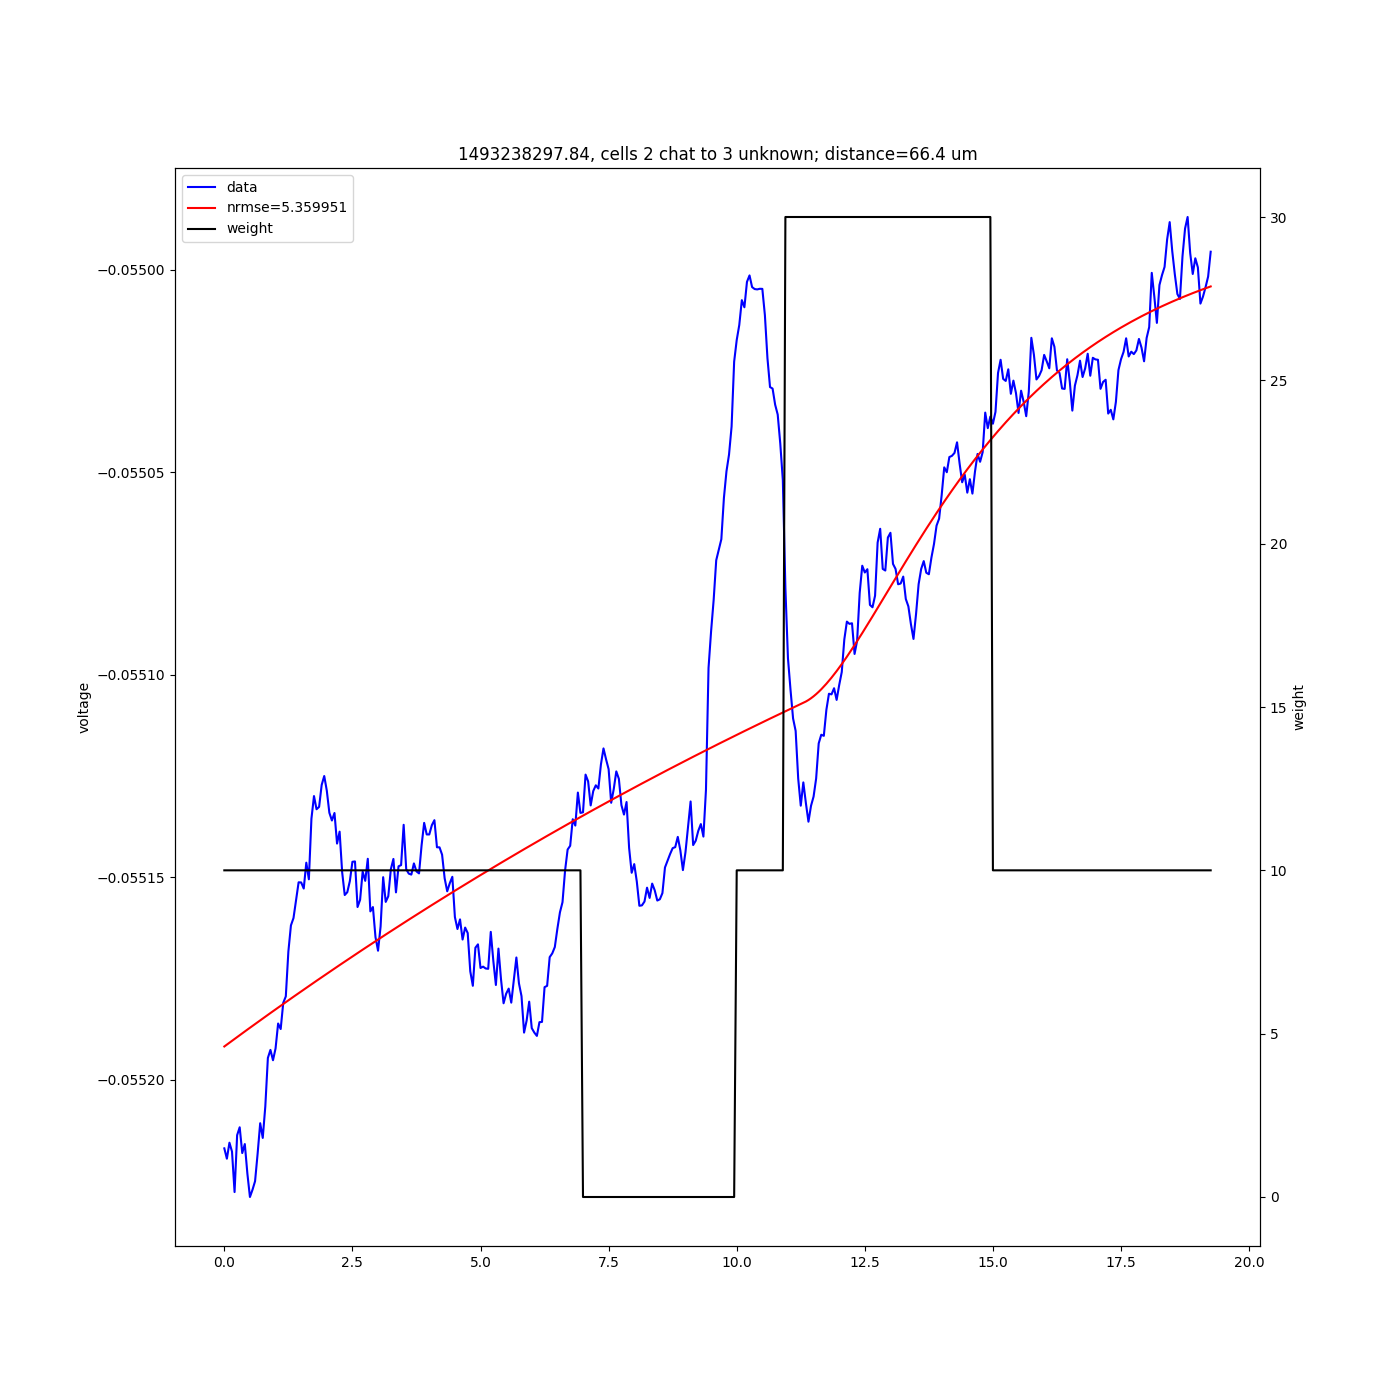

<type 'str'>


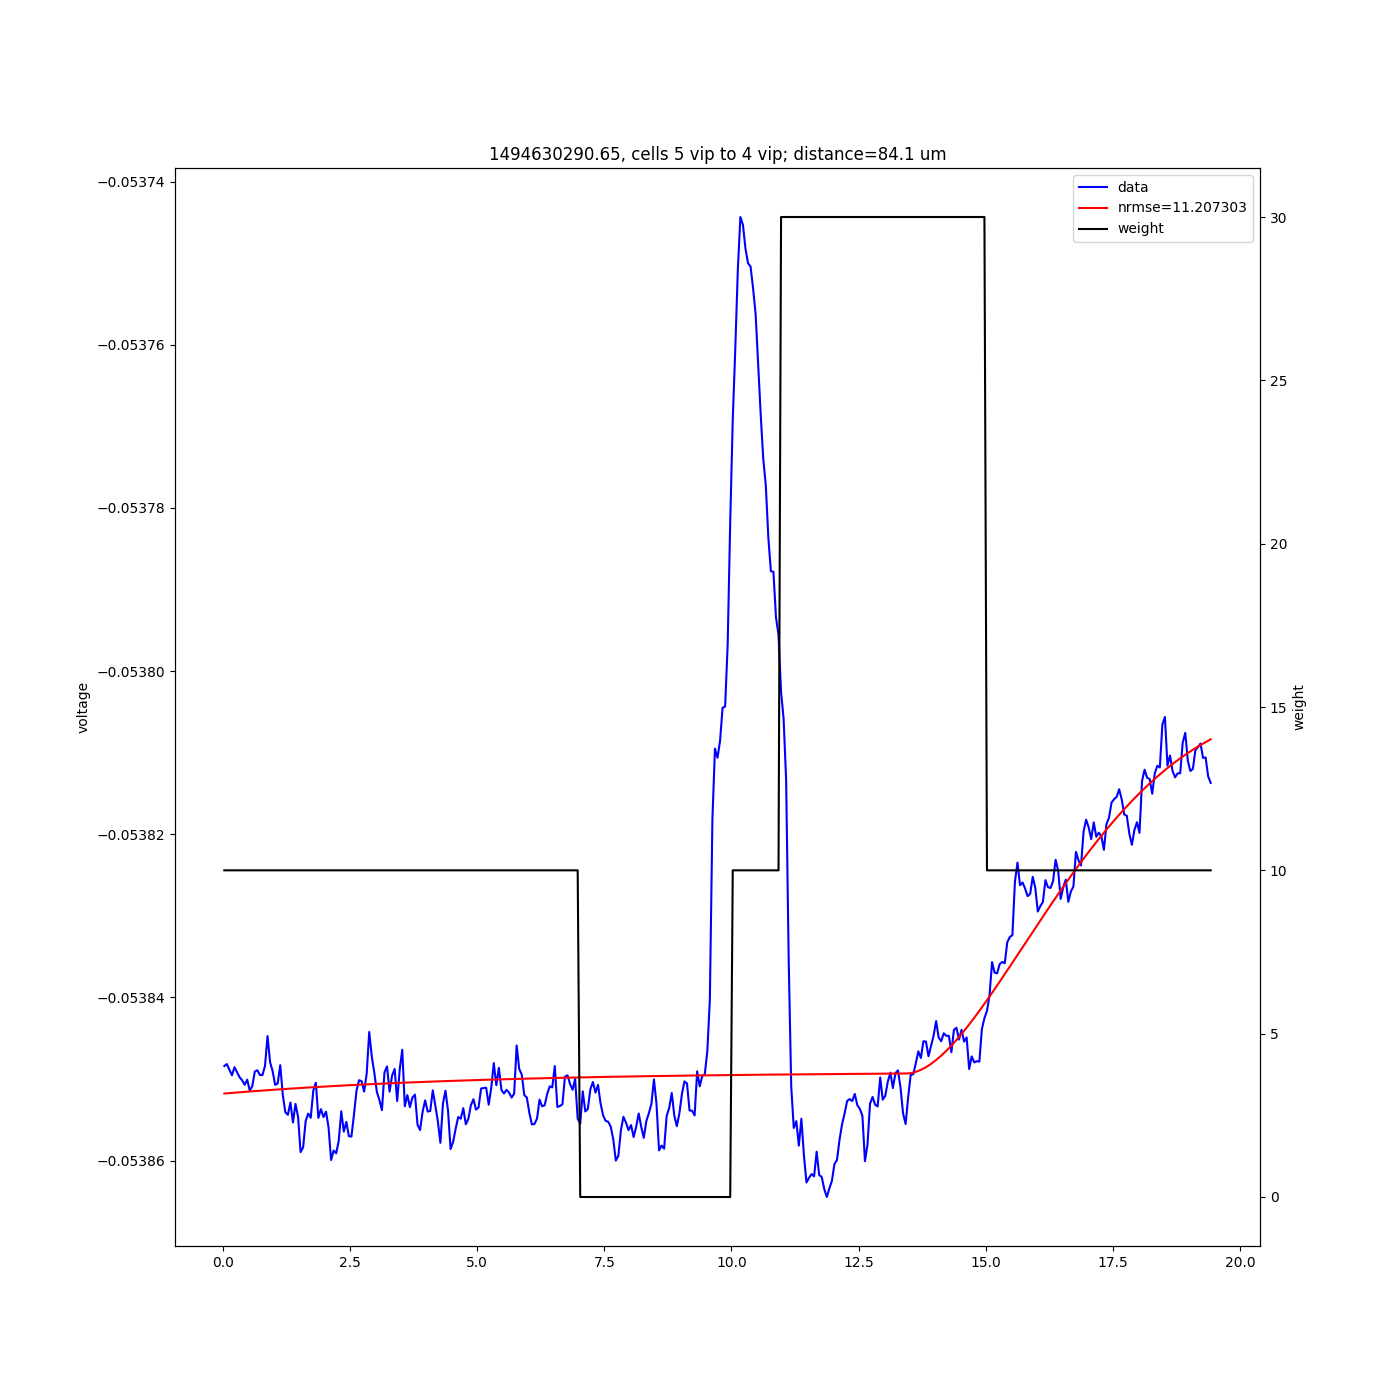

<type 'str'>


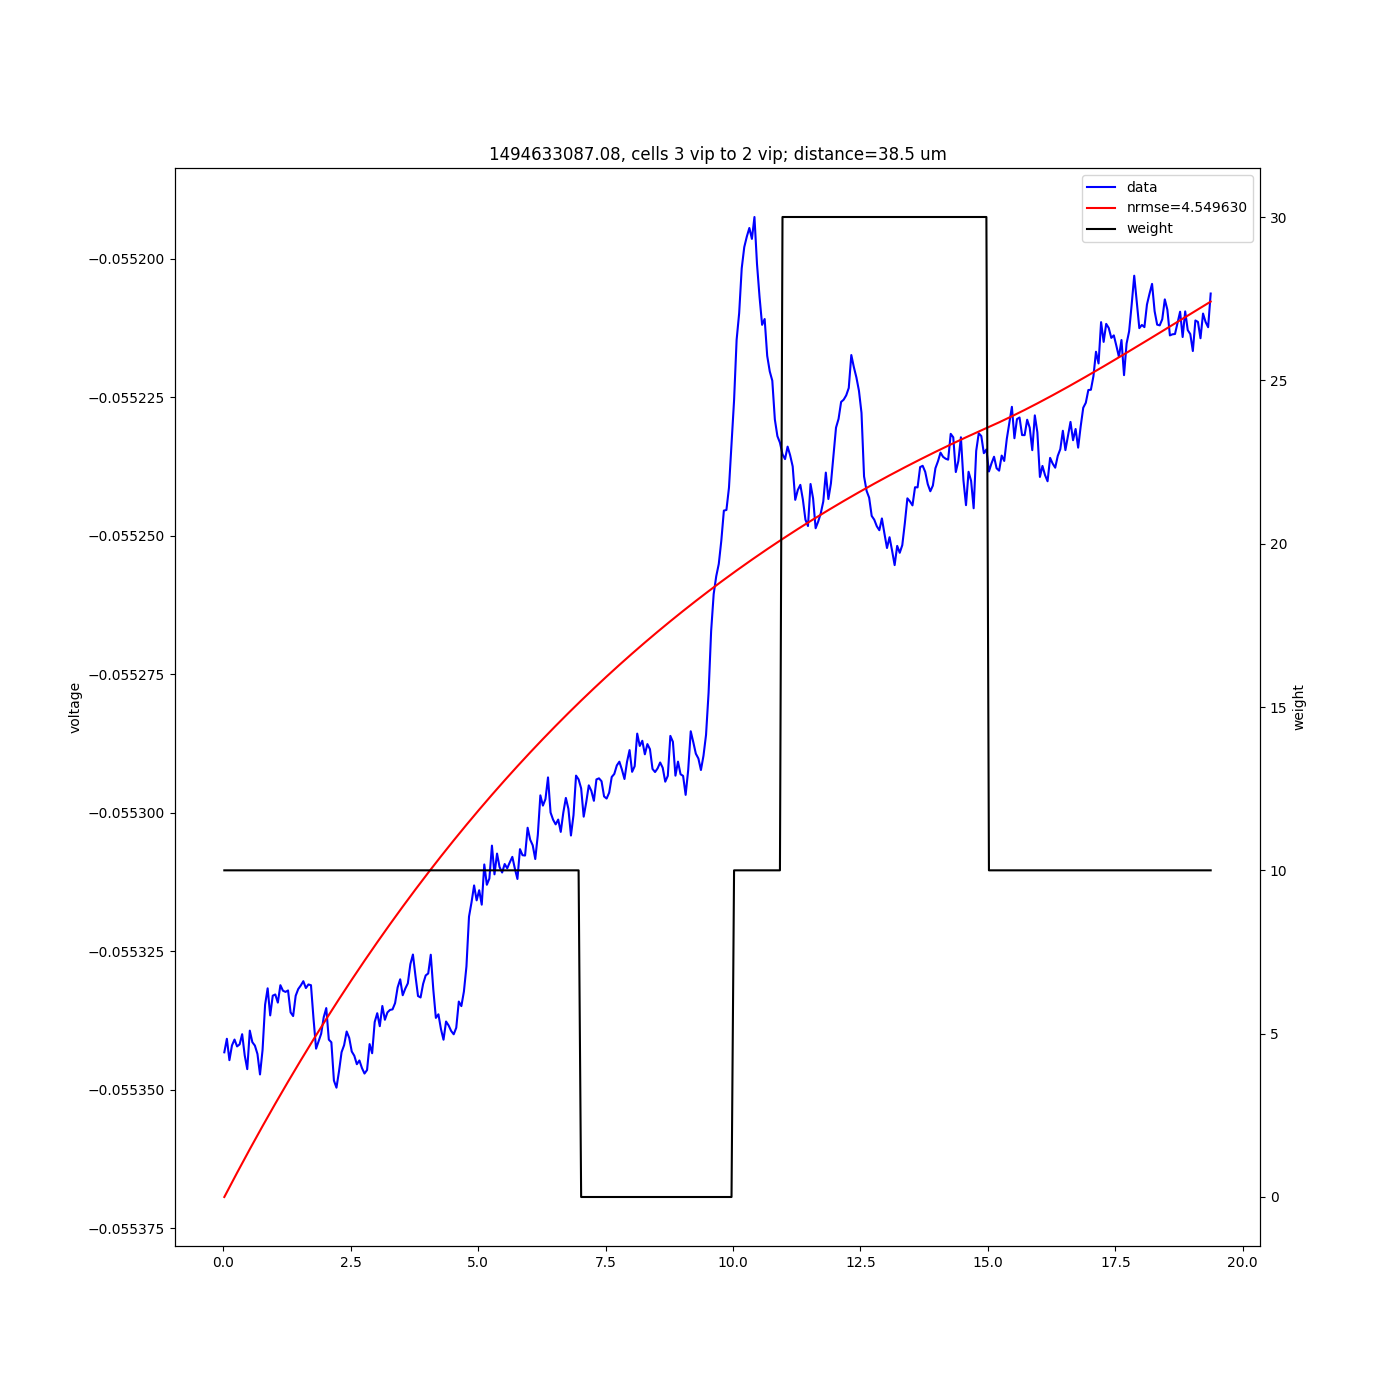

<type 'str'>


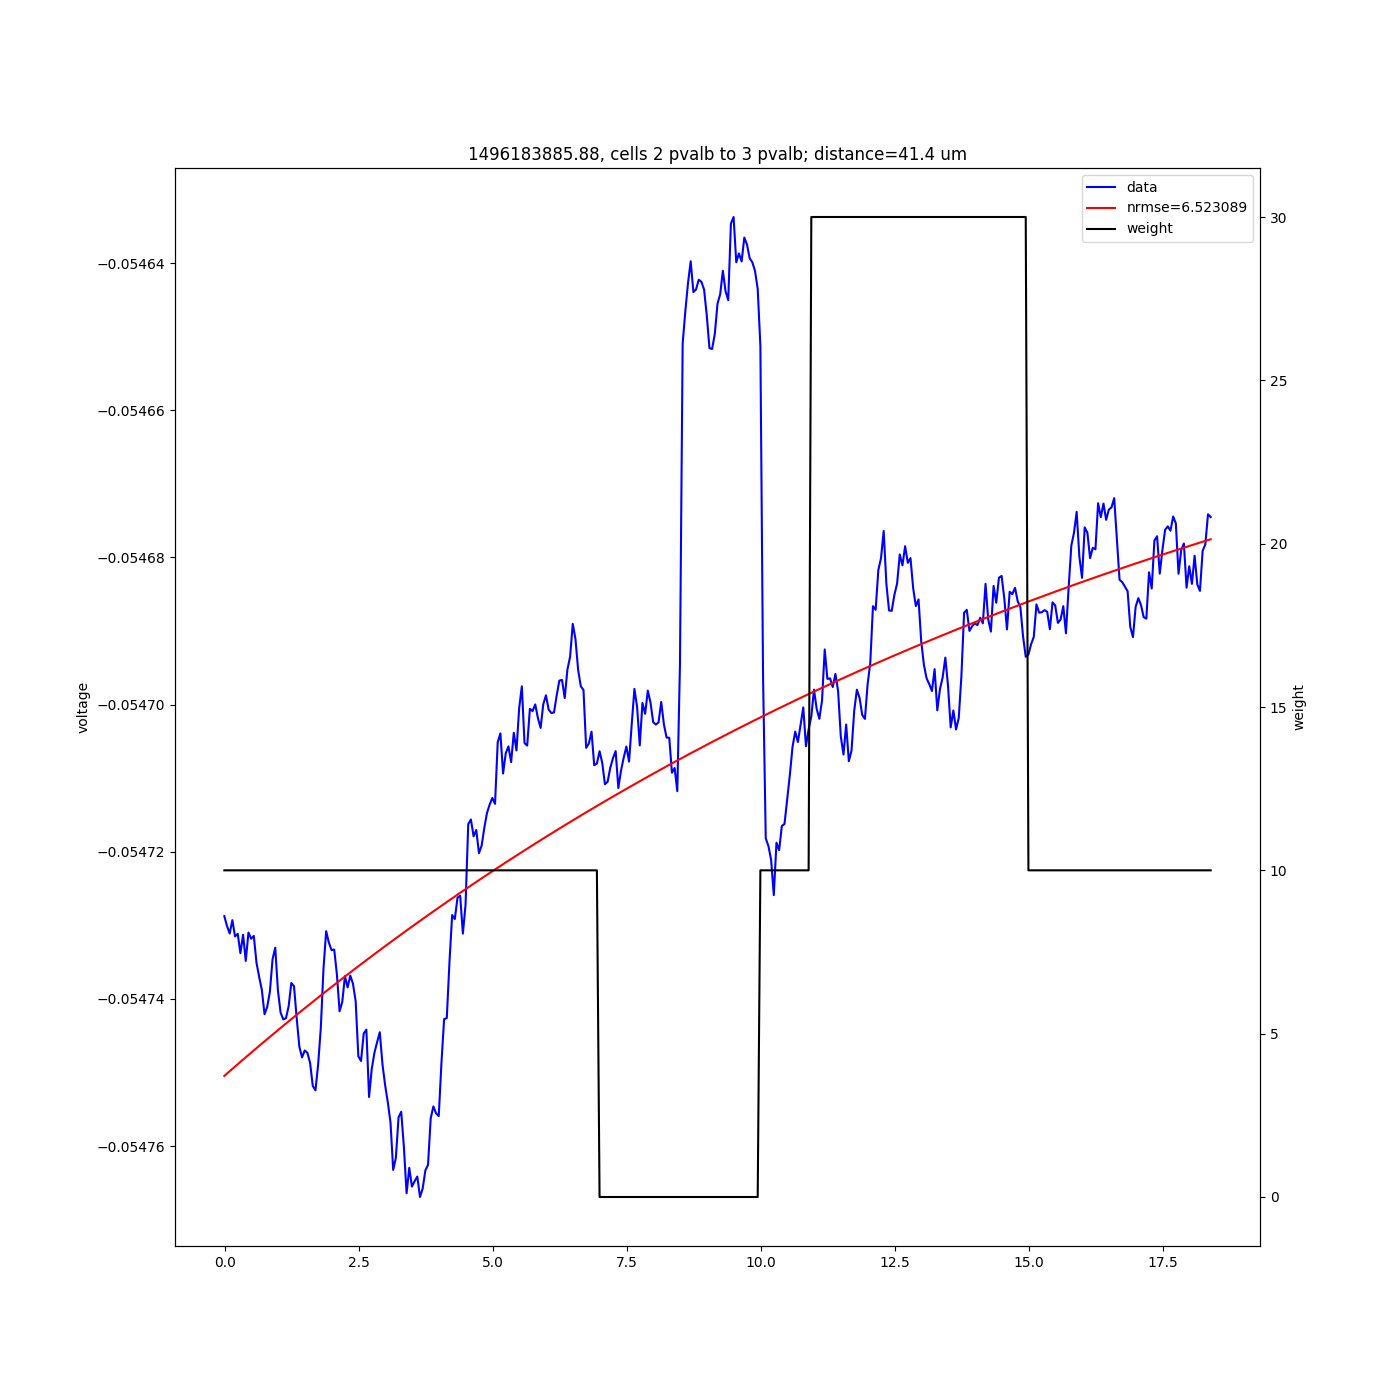

<type 'str'>


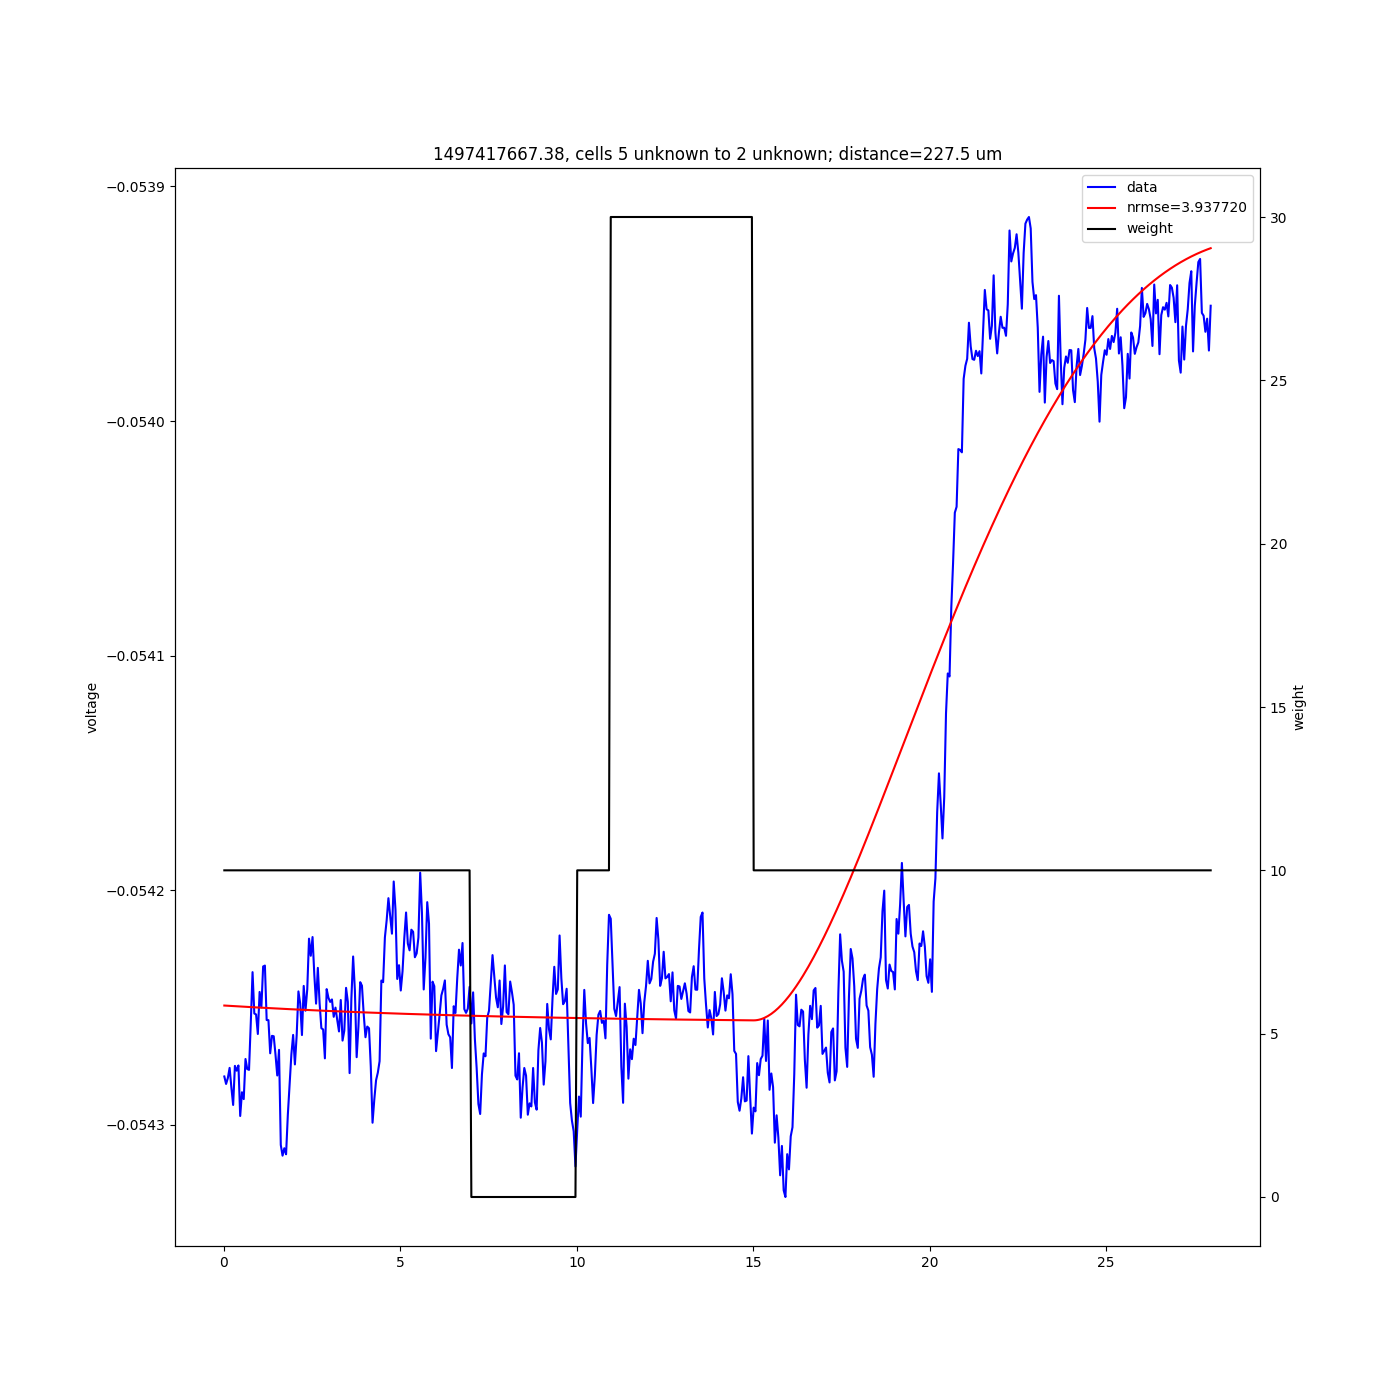

<type 'str'>


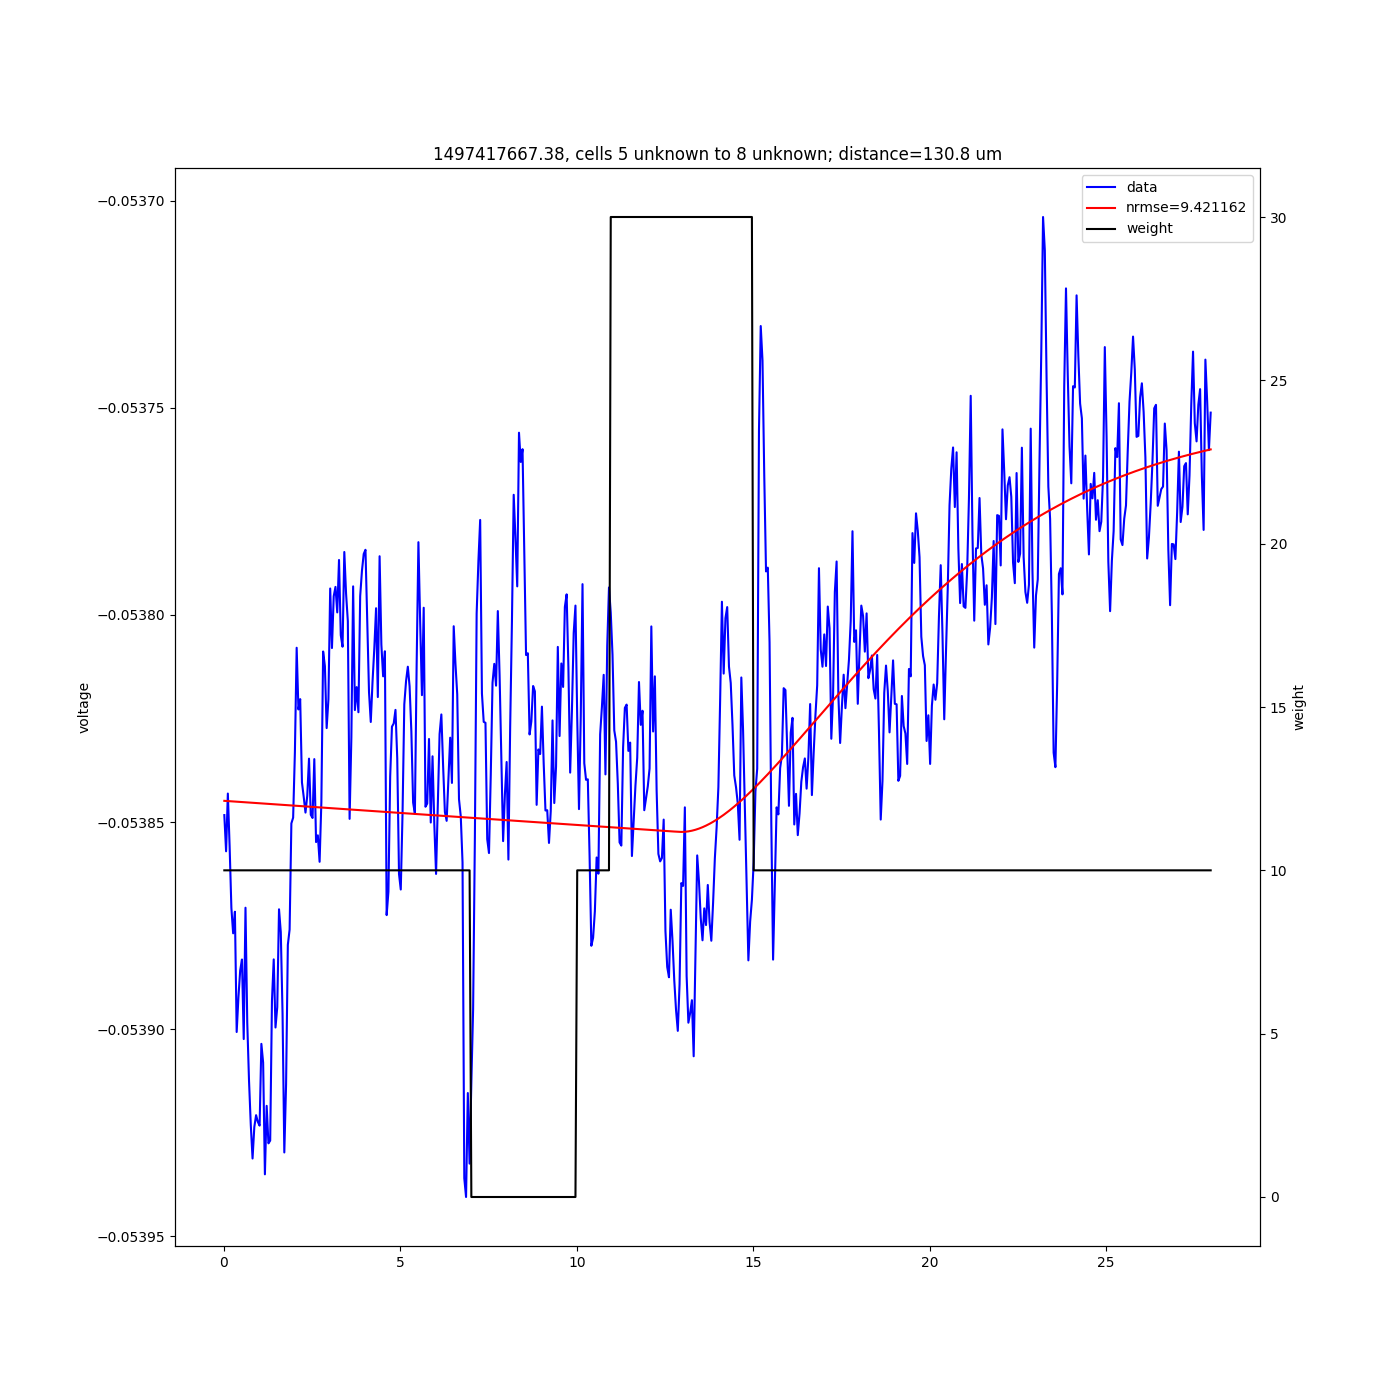

<type 'str'>


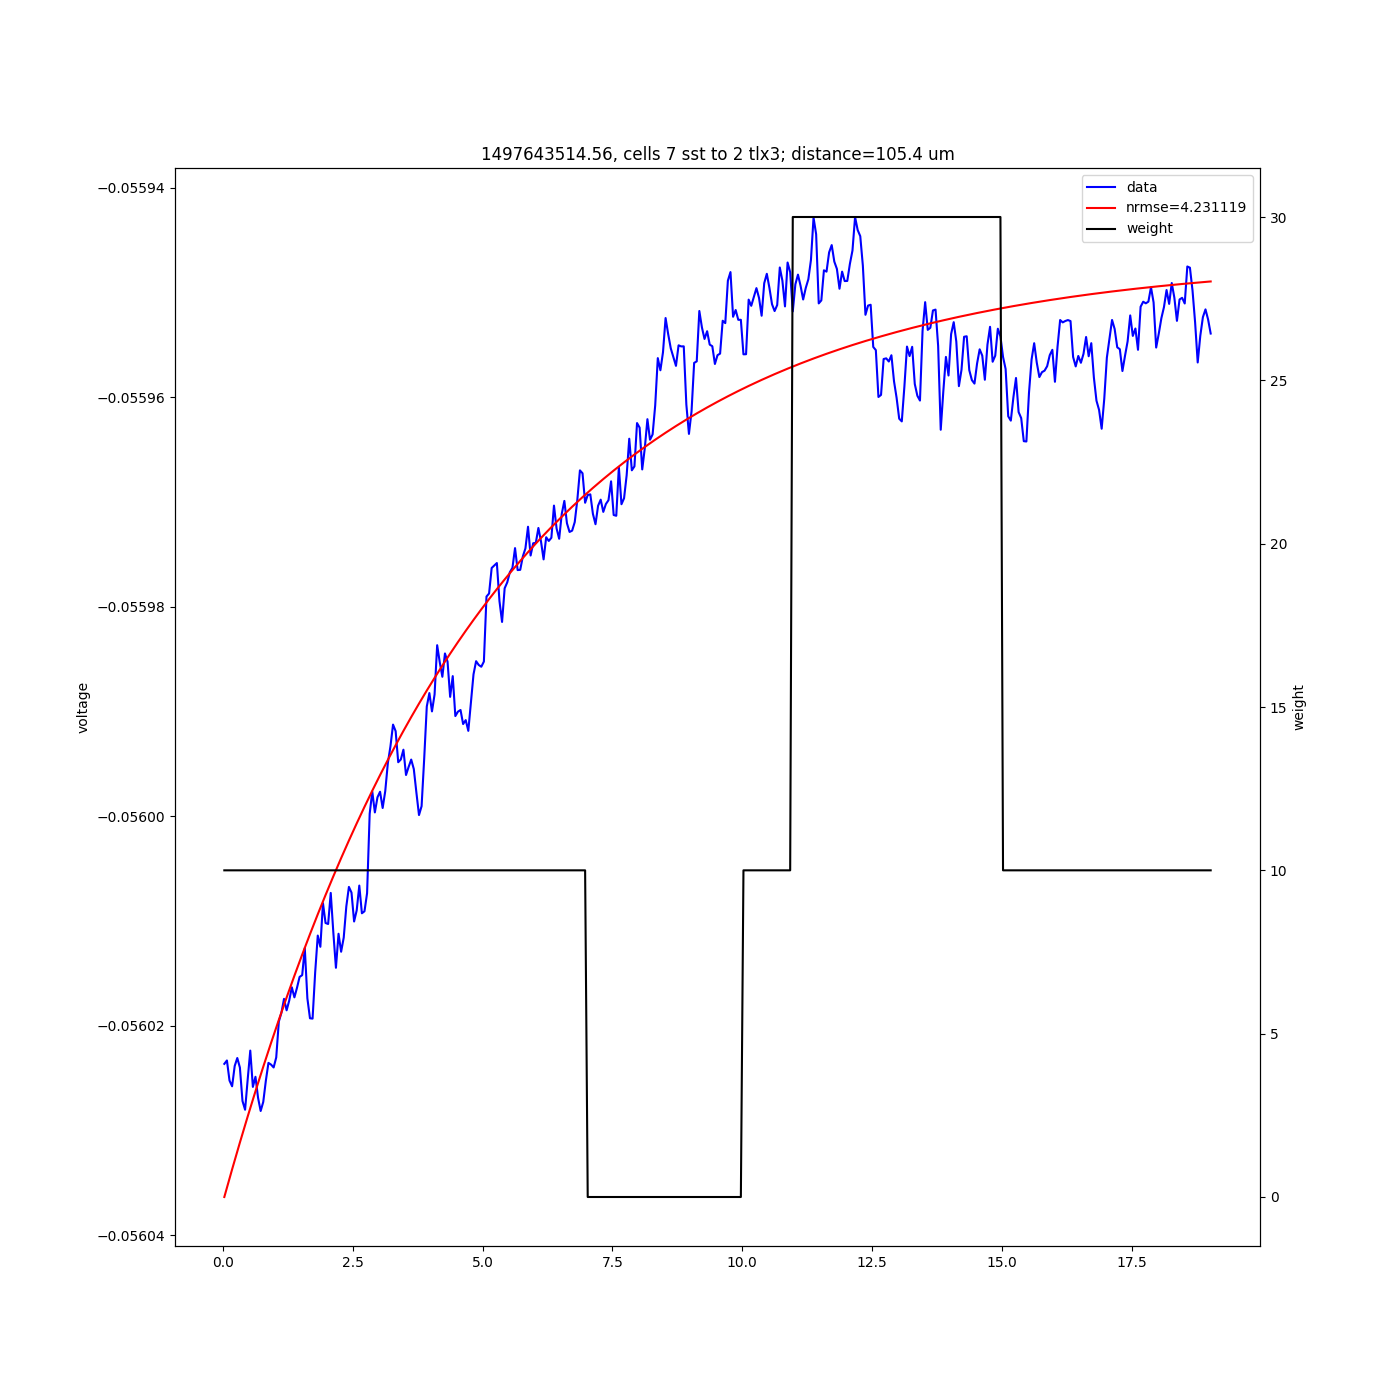

<type 'str'>


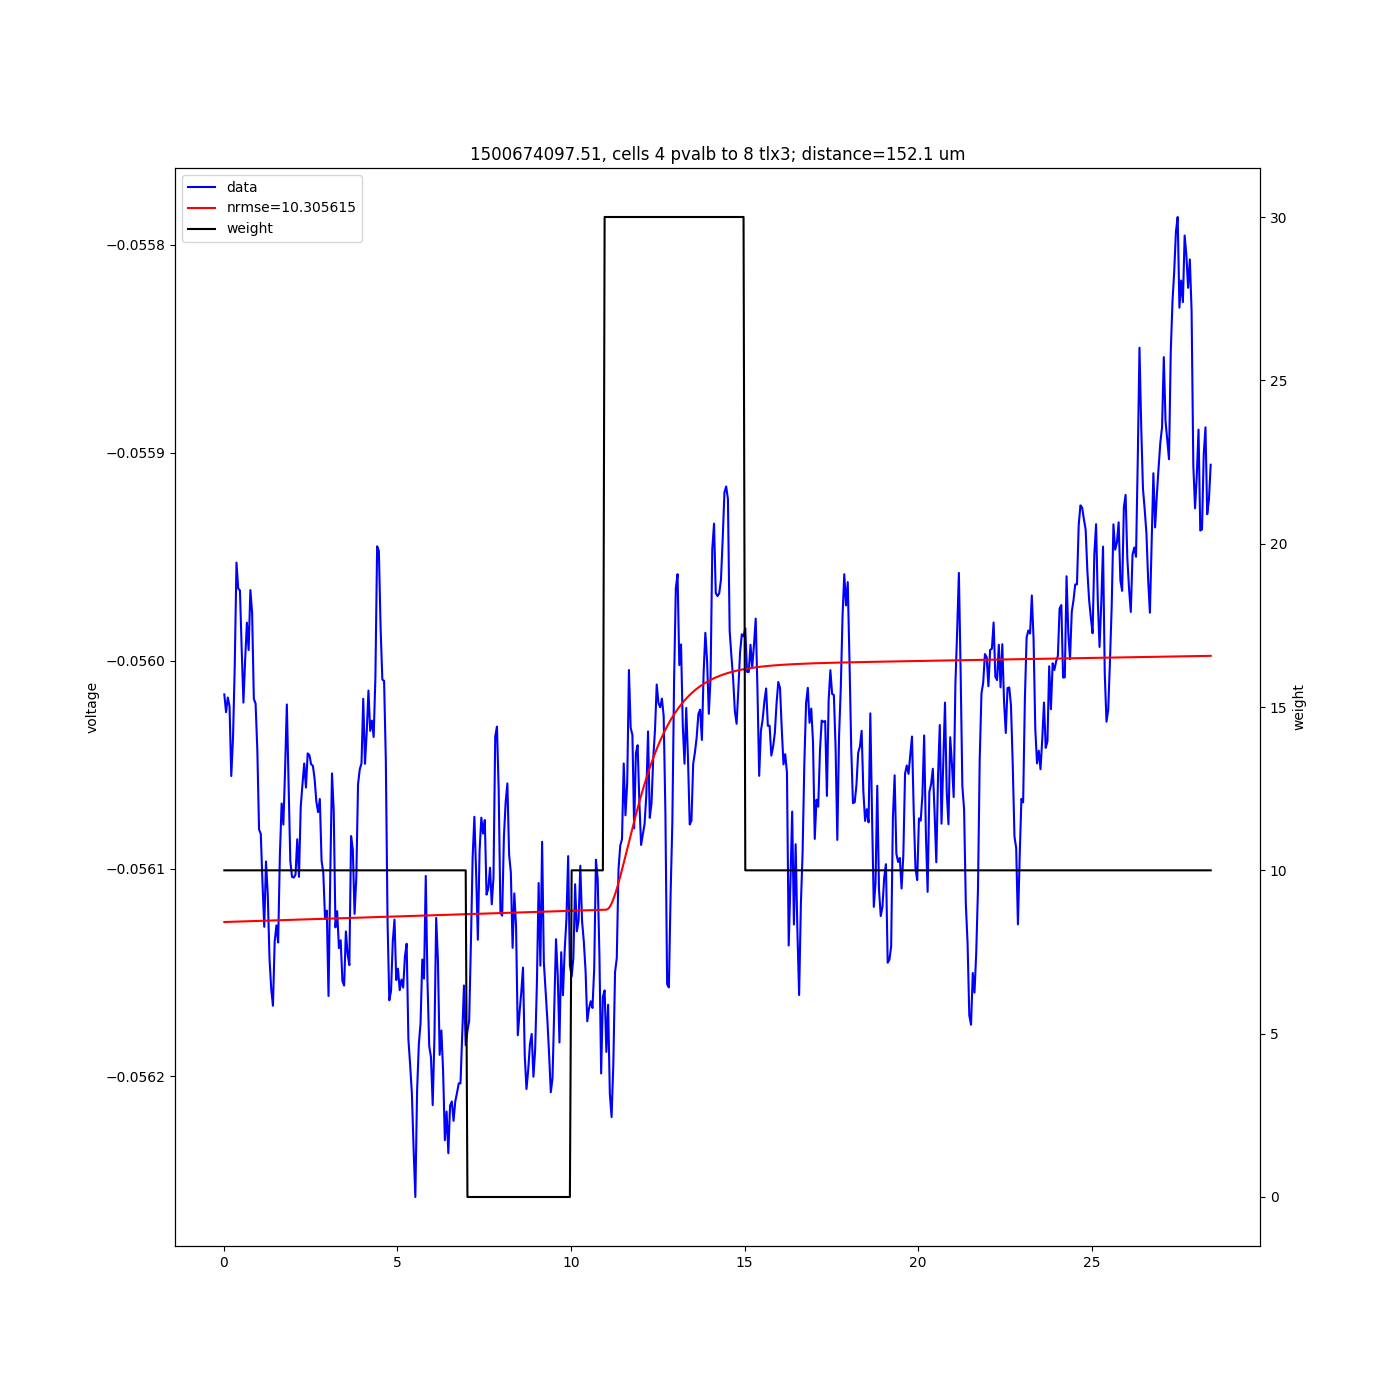

<type 'str'>


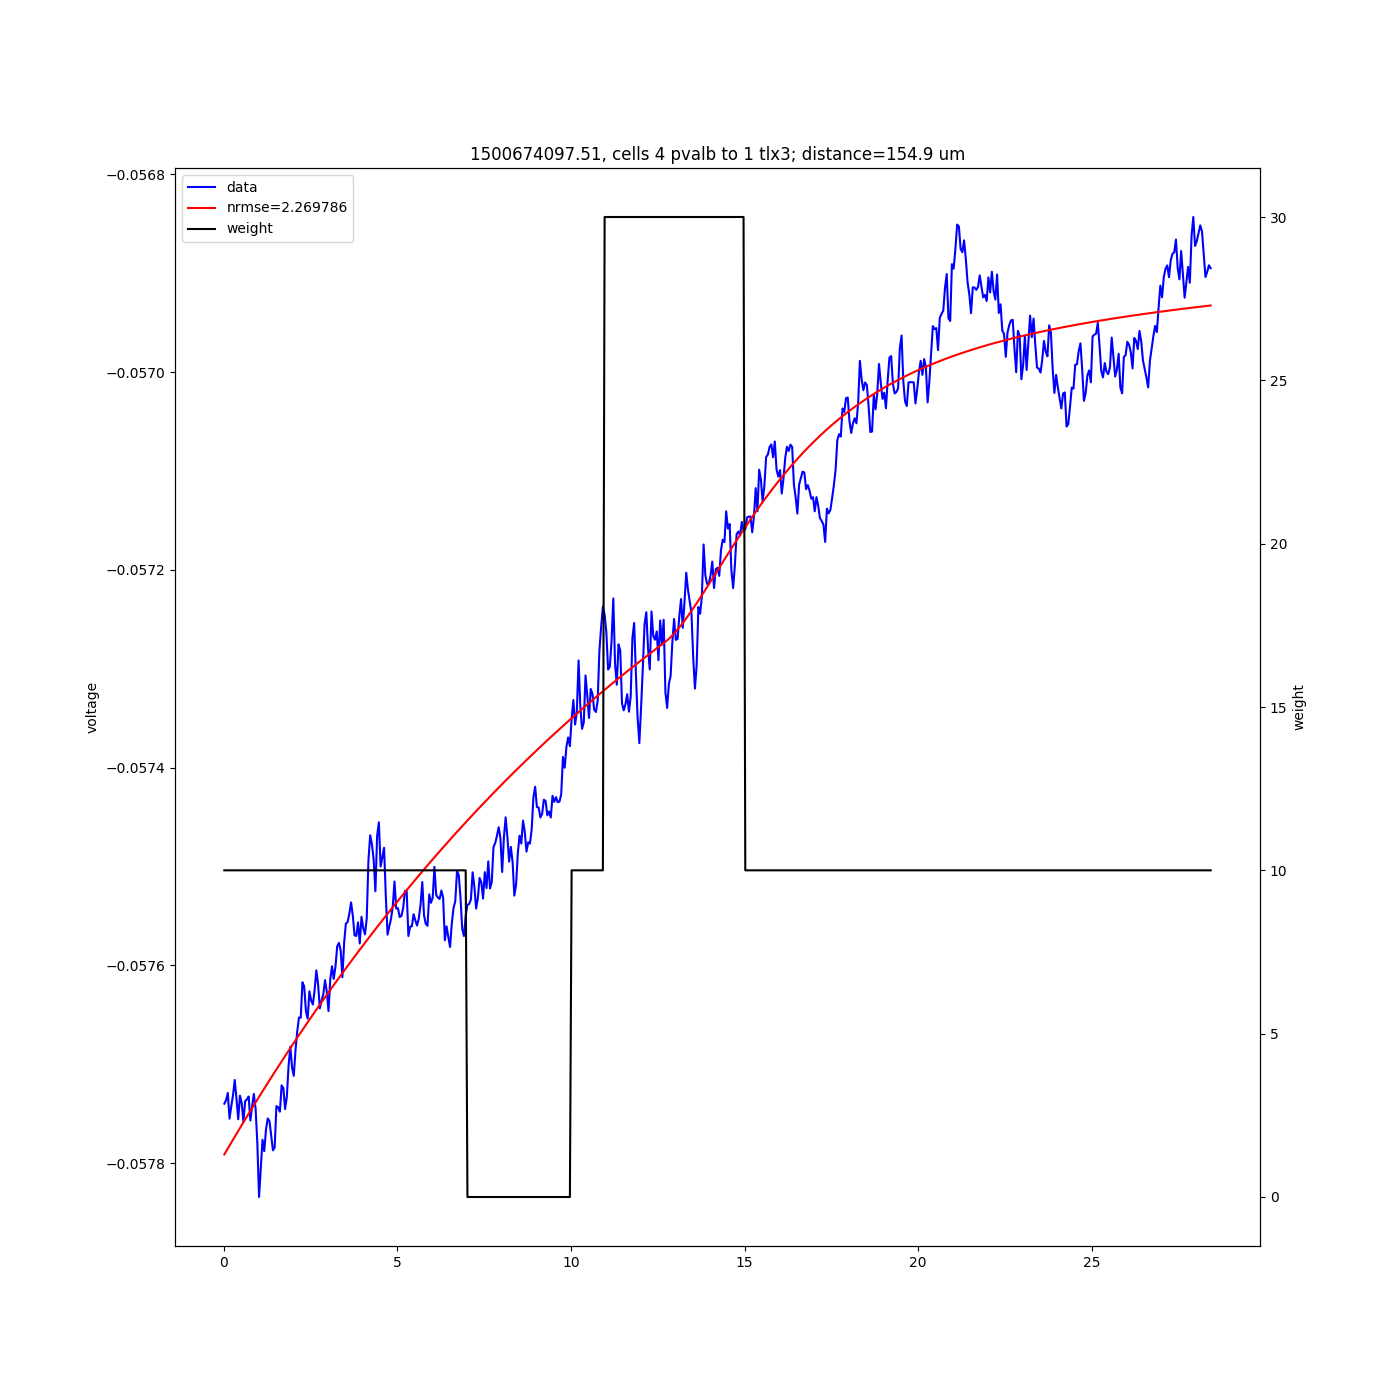

<type 'str'>


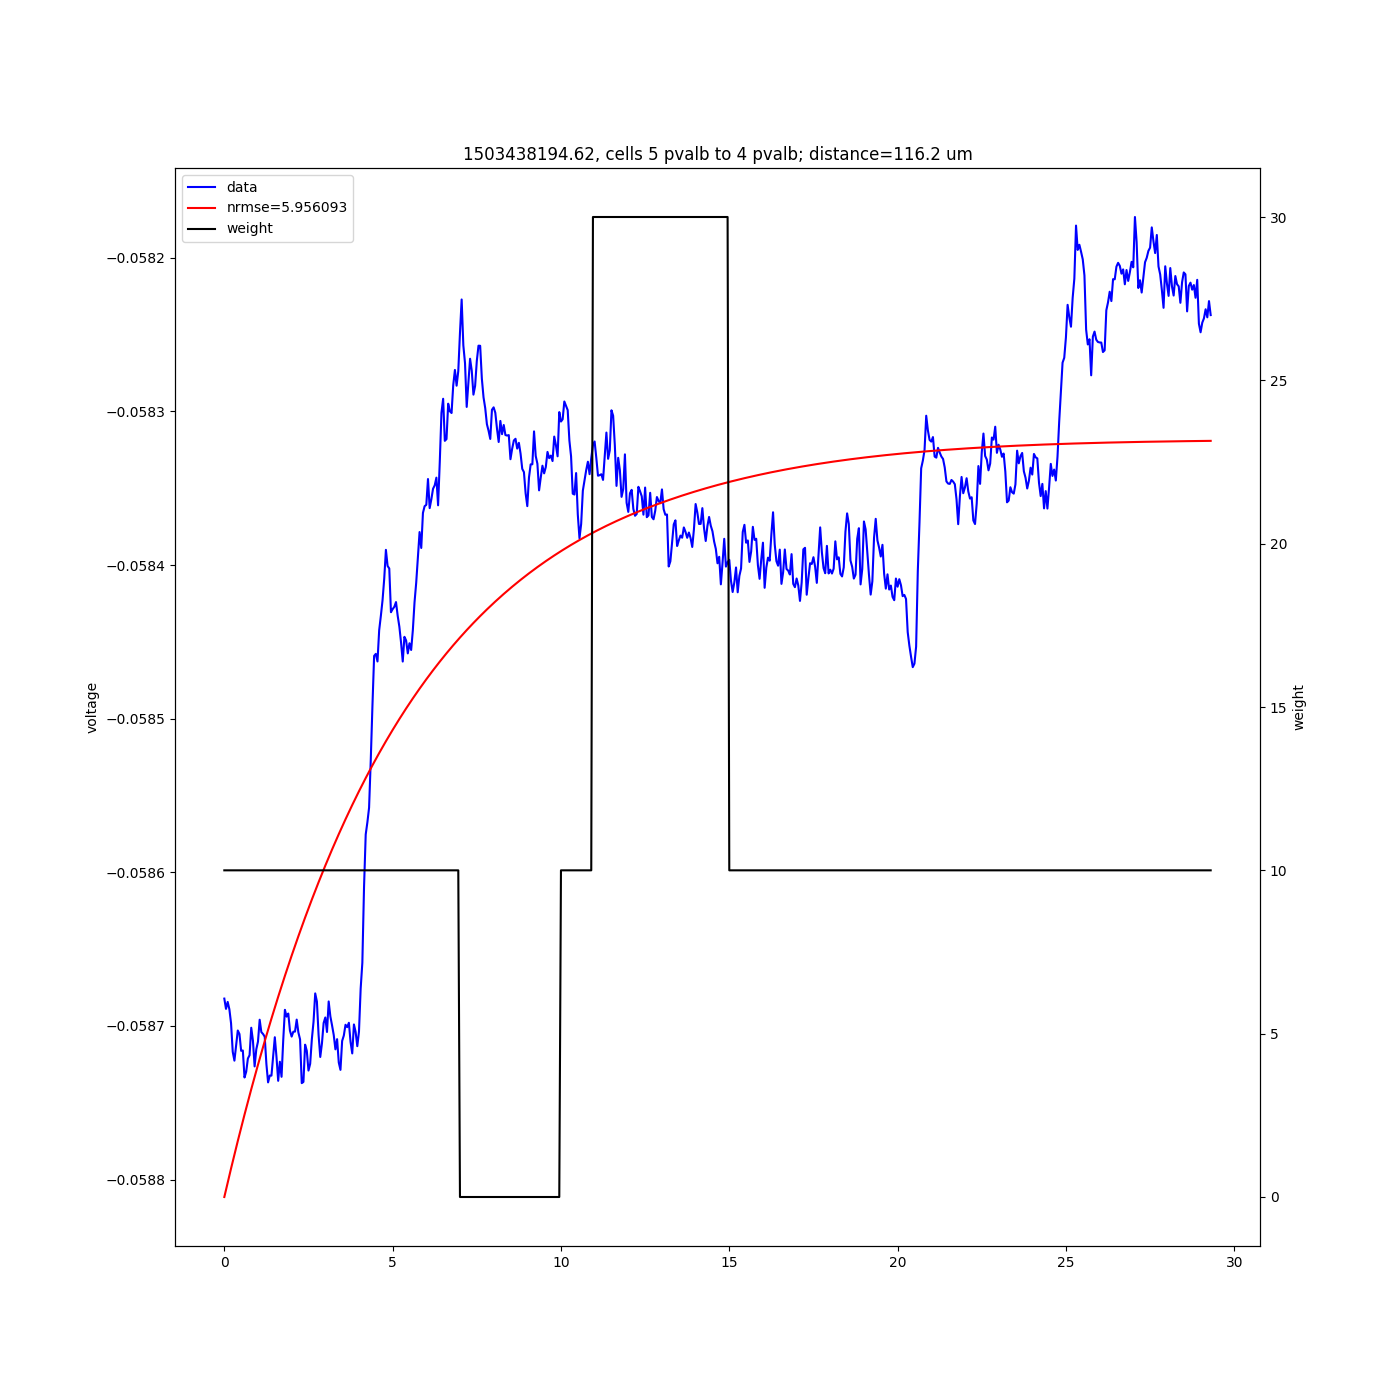

<type 'str'>


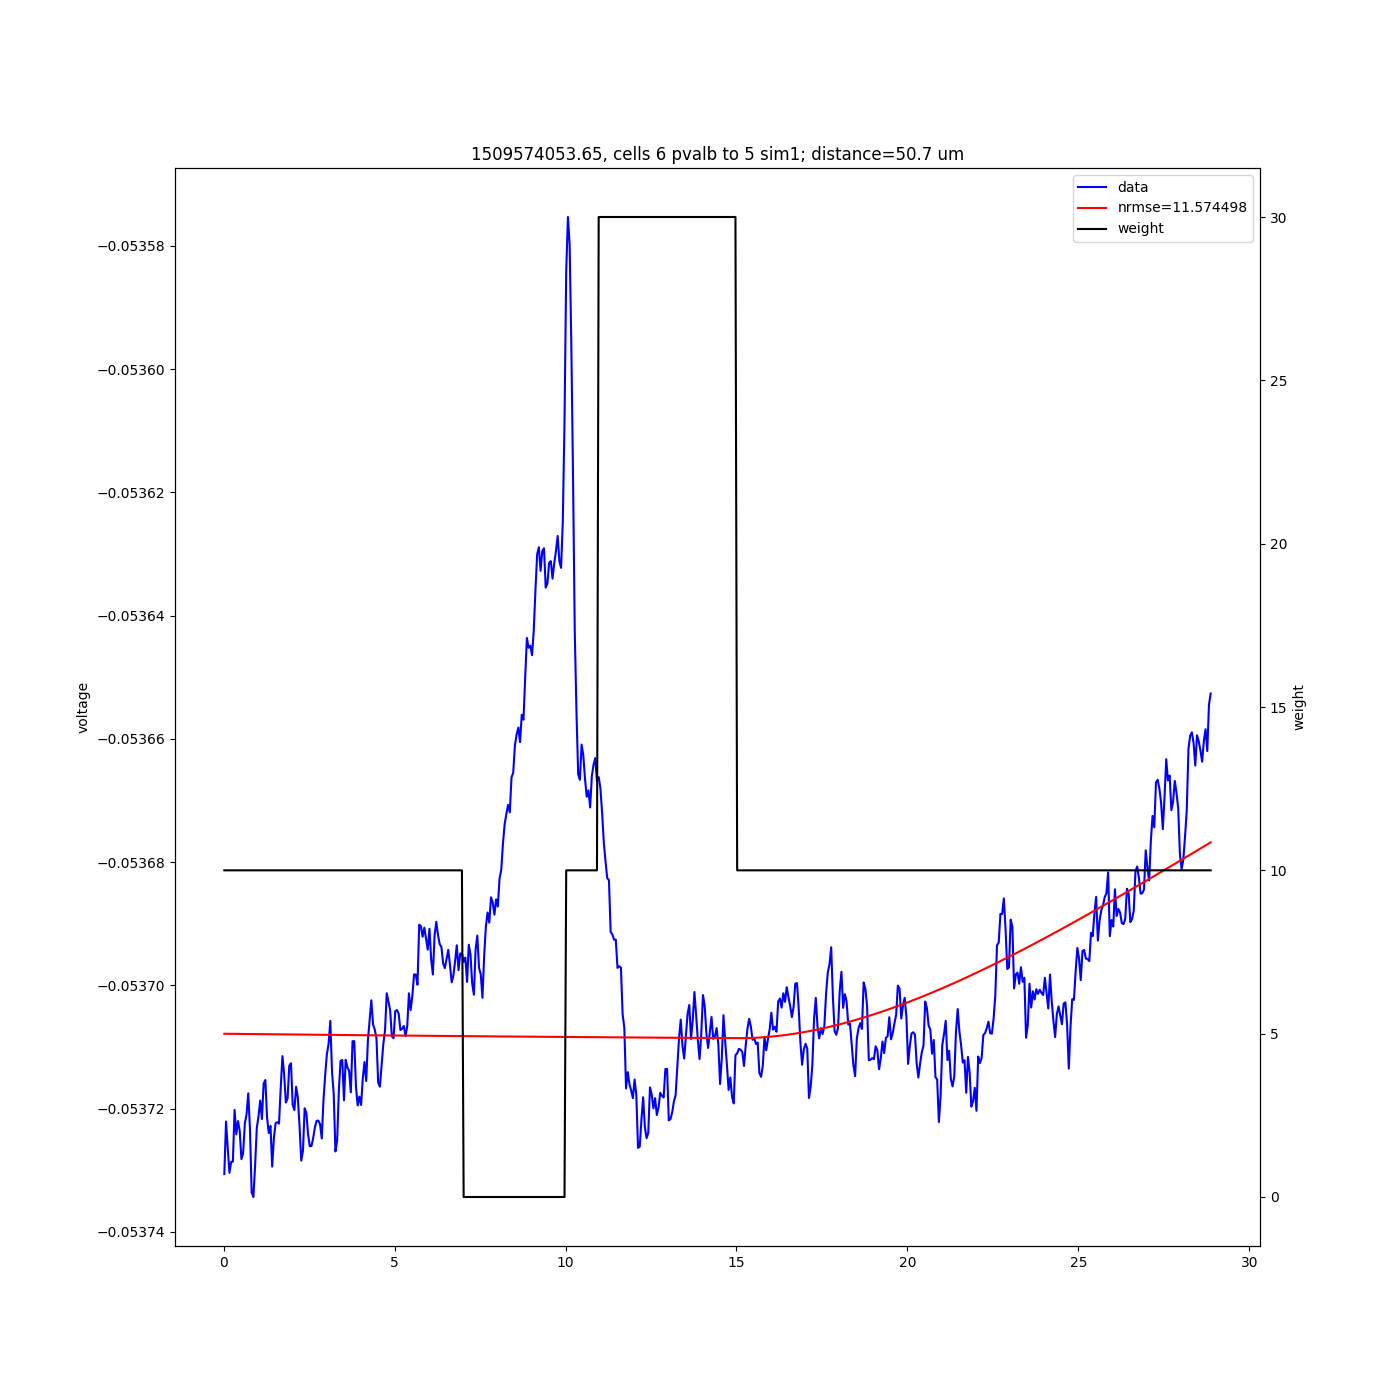

<type 'str'>


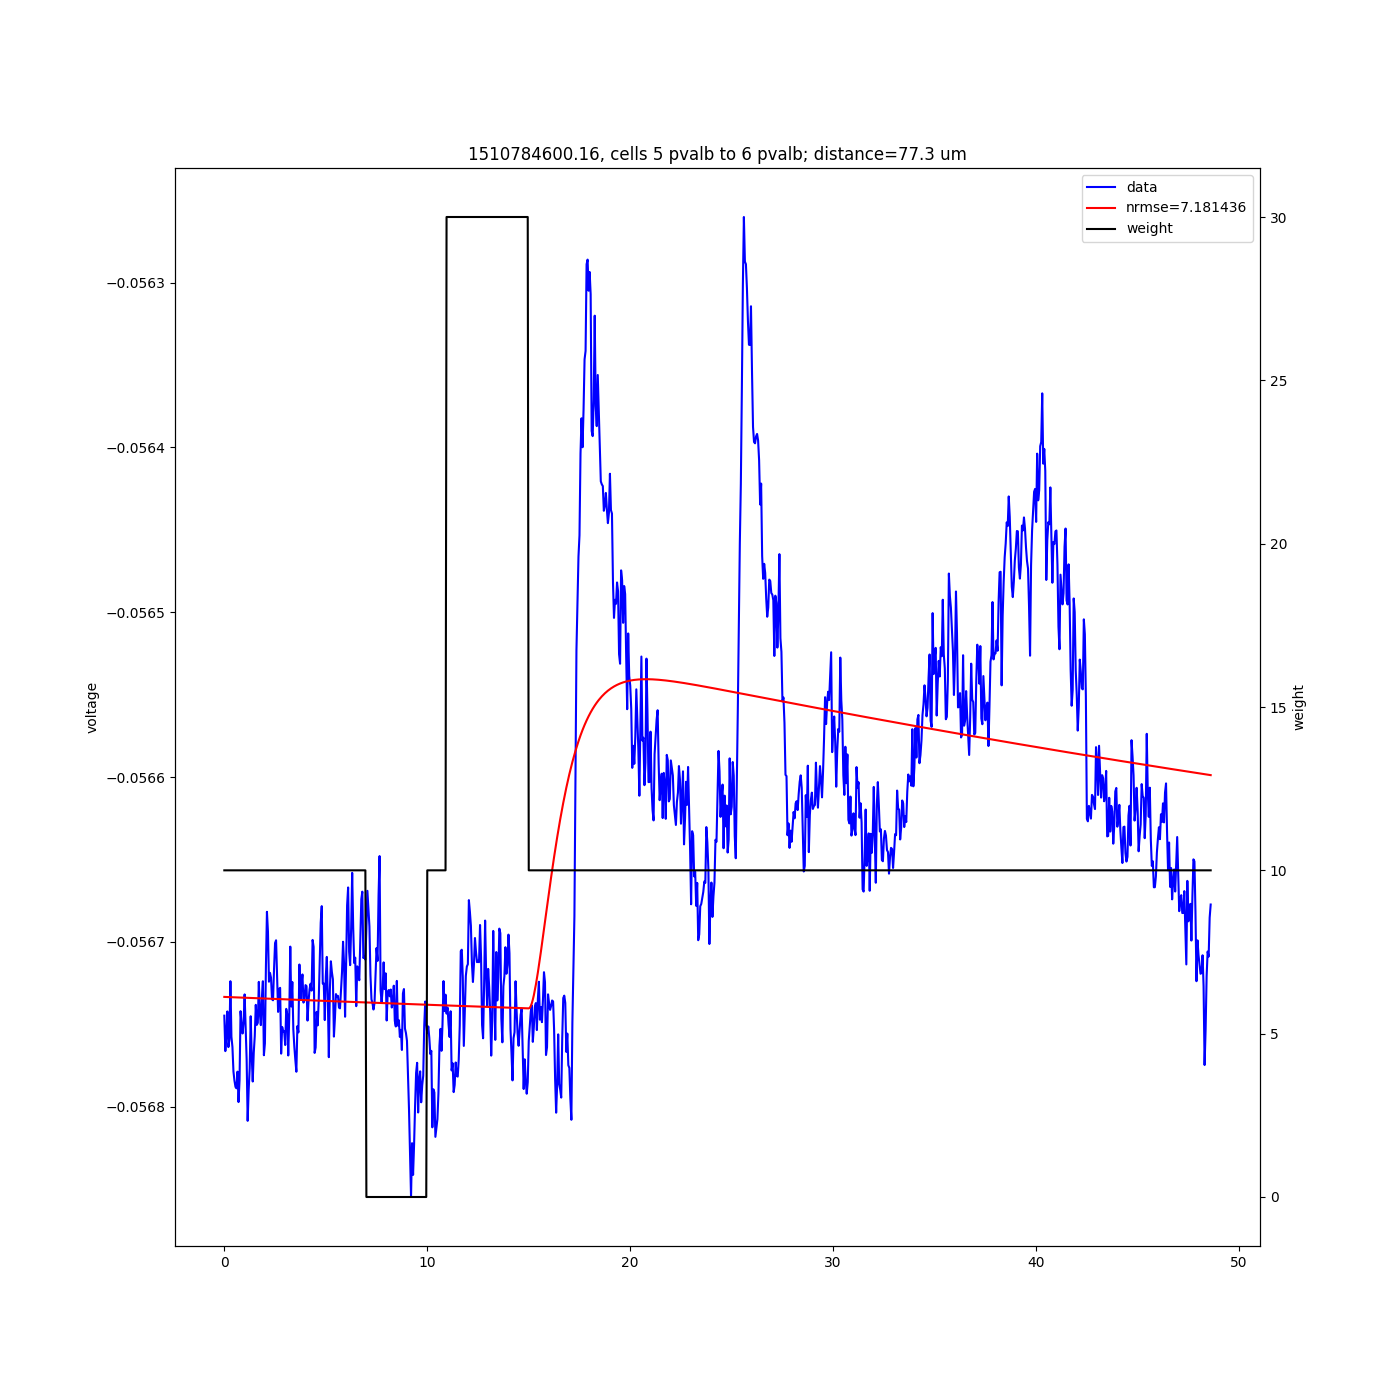

<type 'str'>


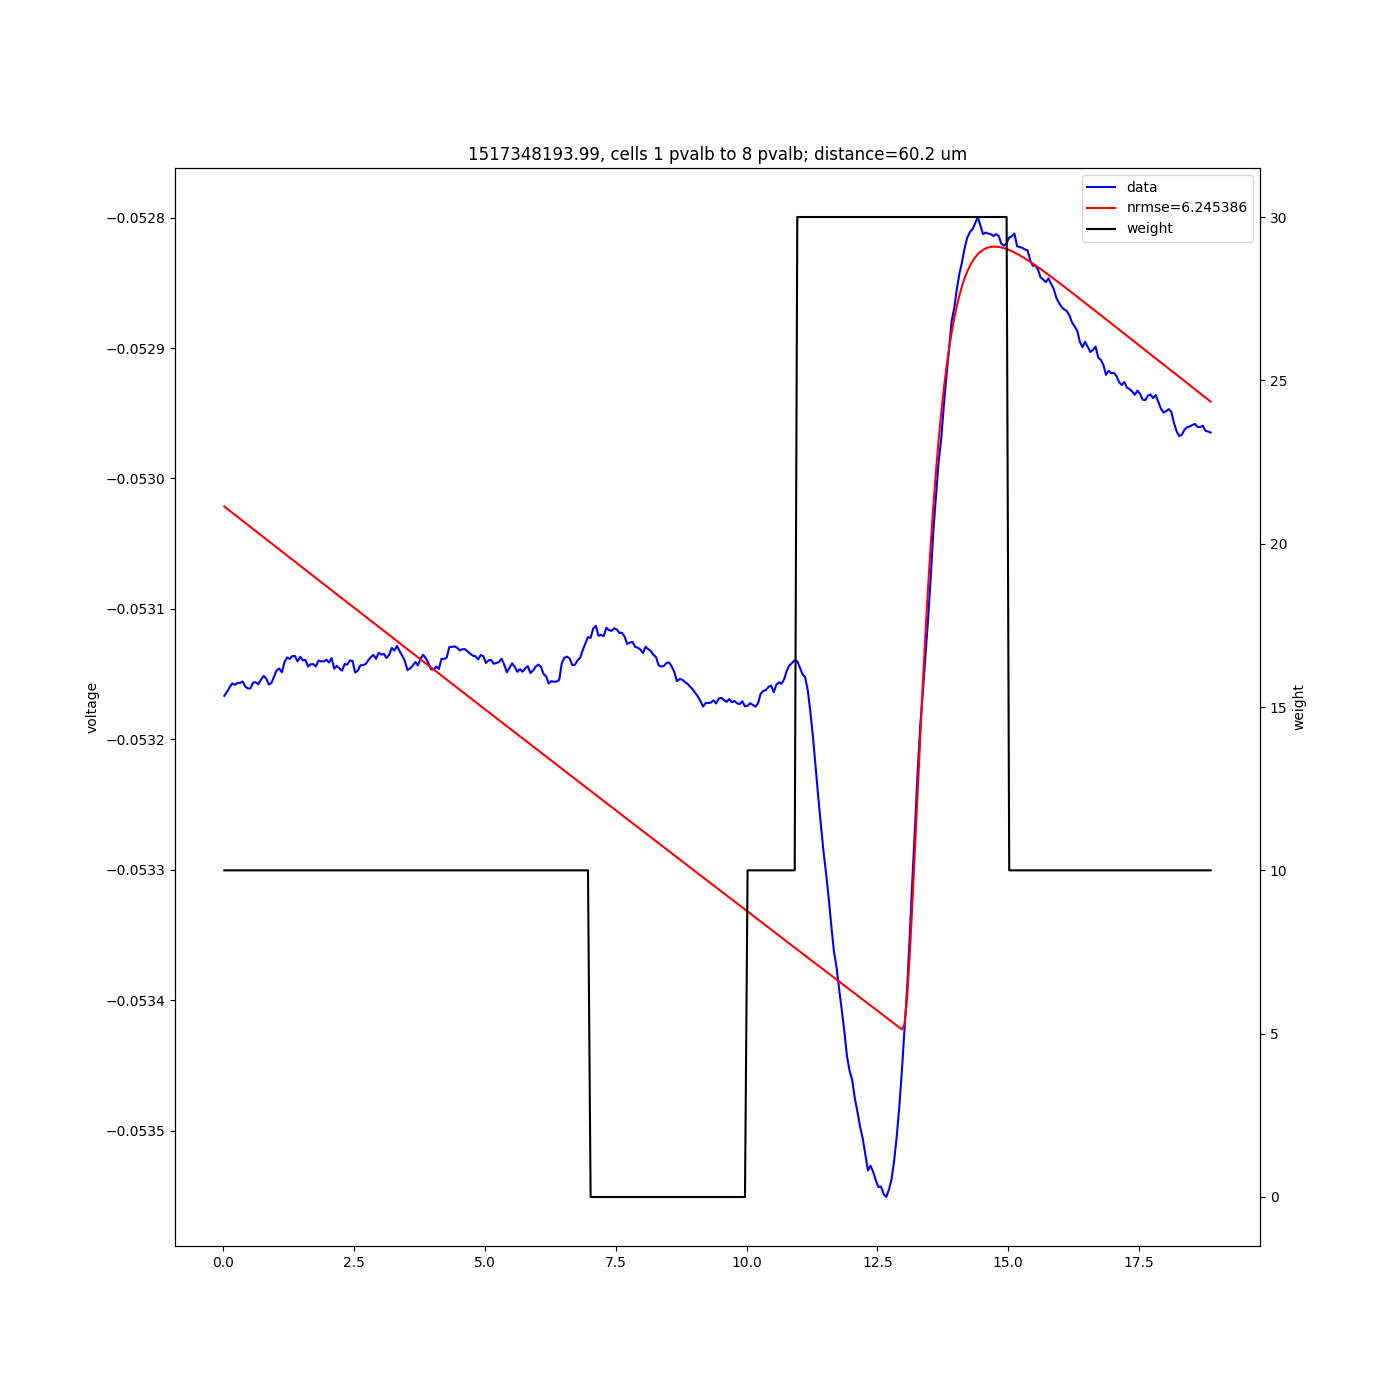

<type 'str'>


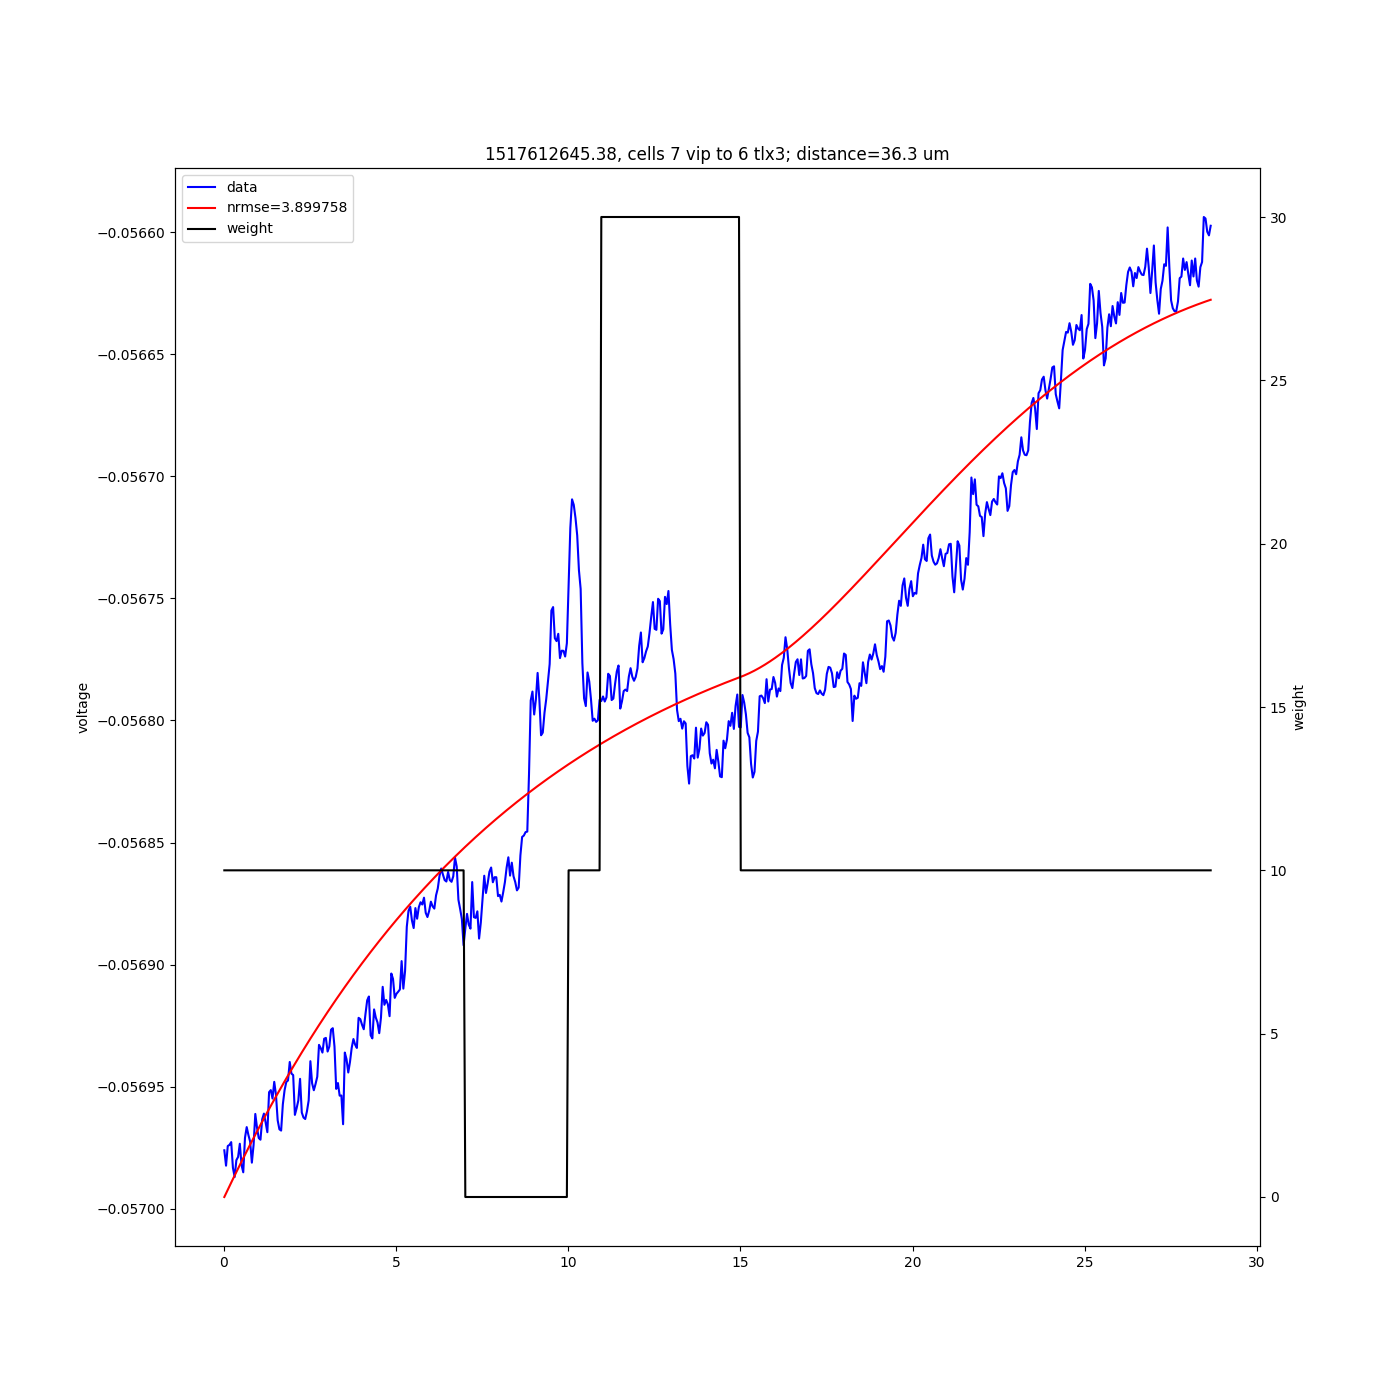

<type 'str'>


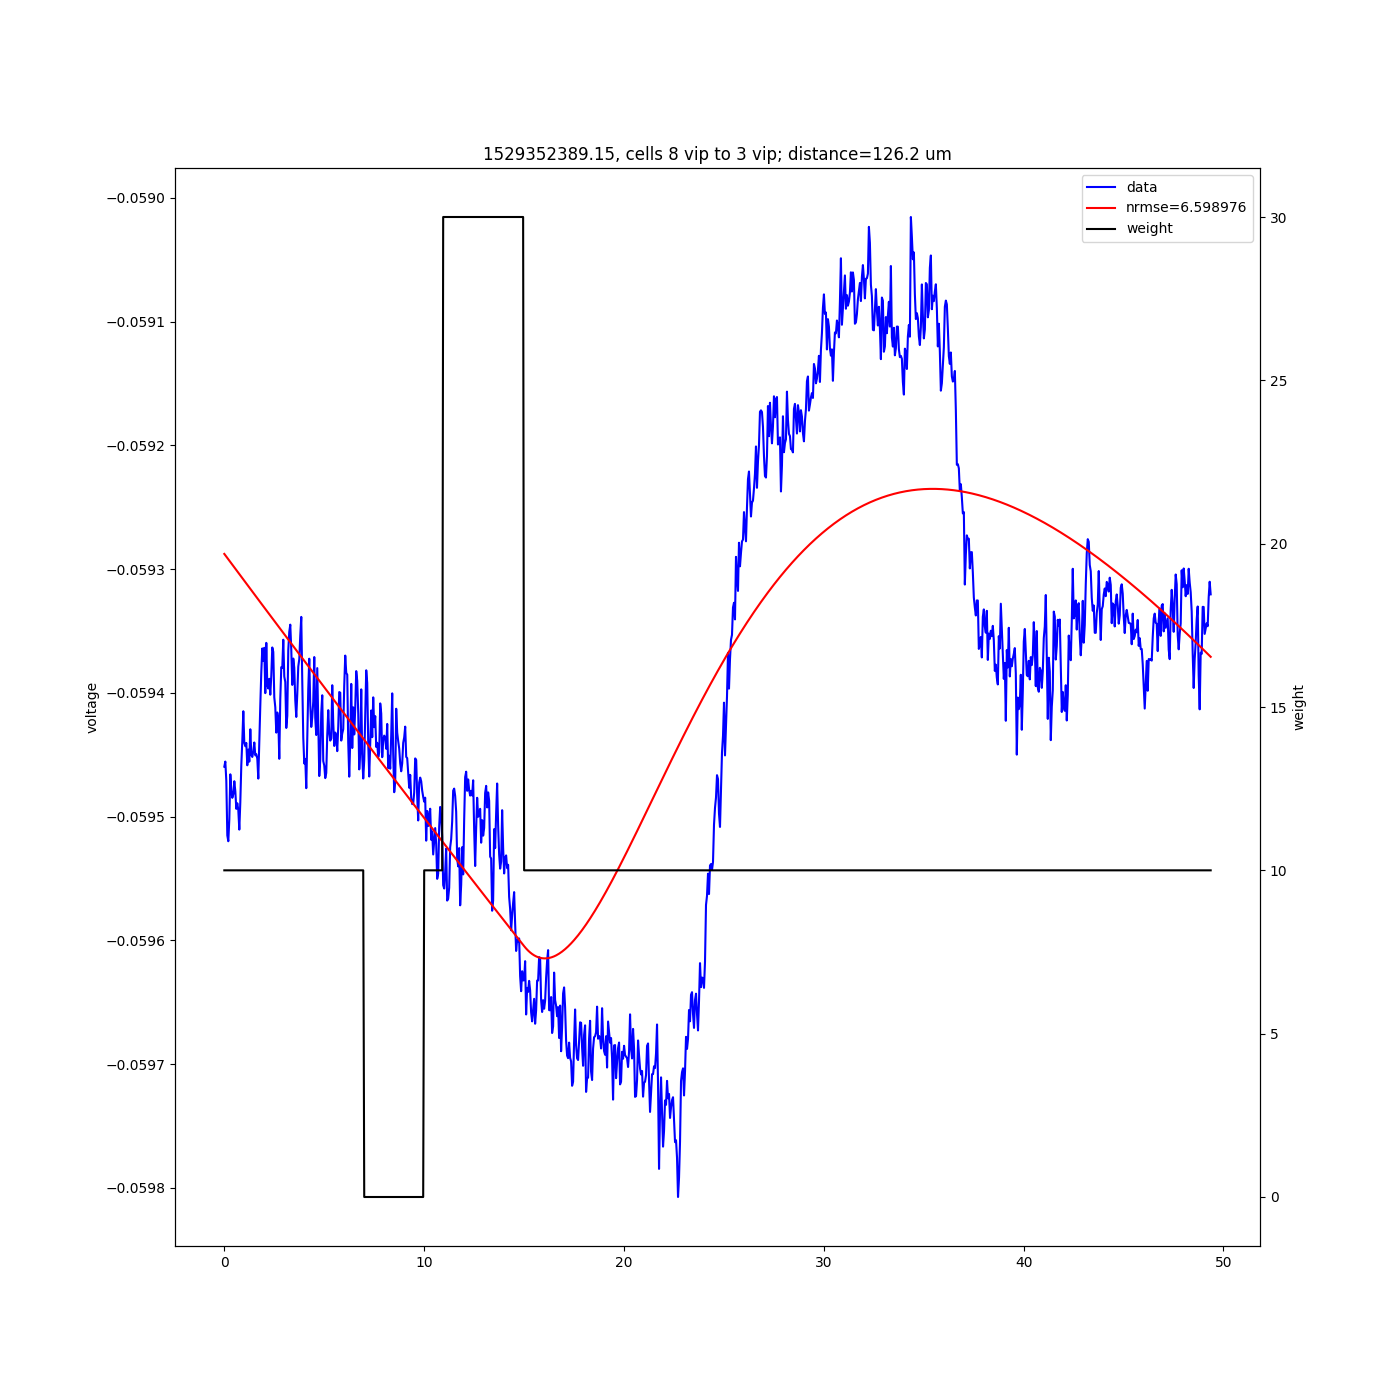

<type 'str'>


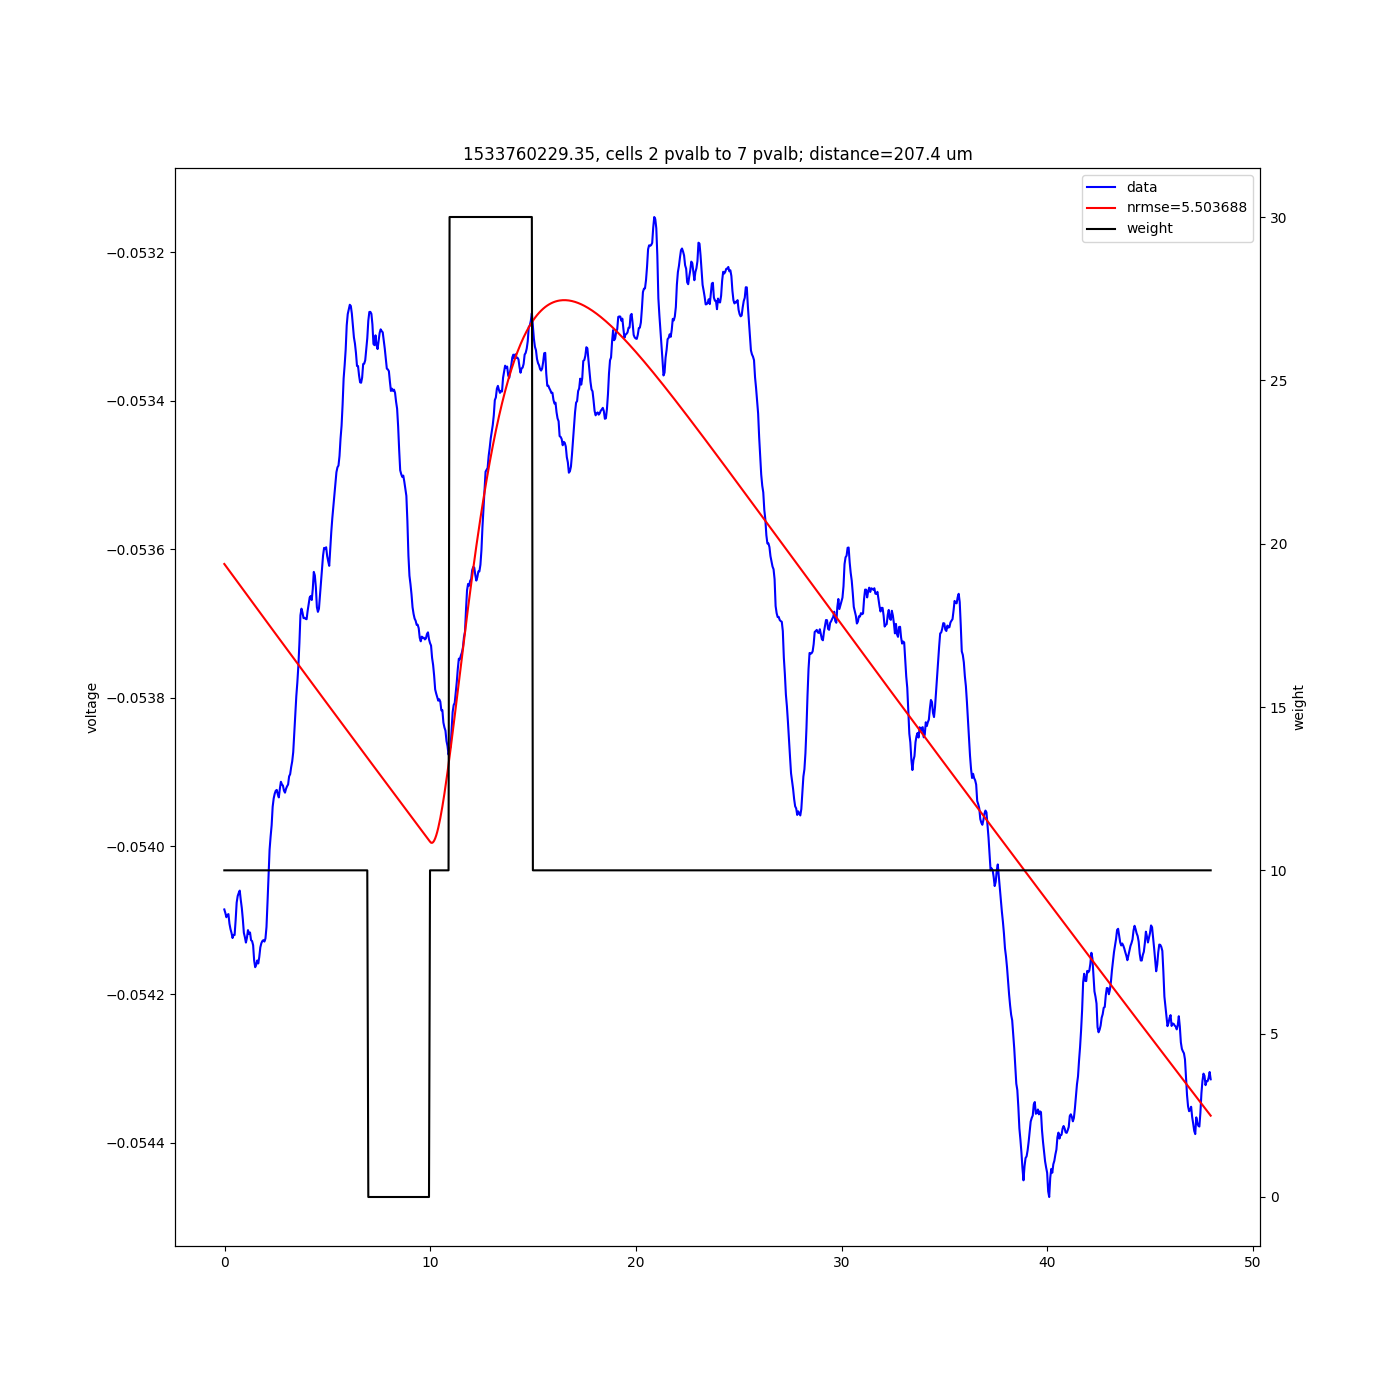

In [138]:
# Lets look for neurons that have been miss any-sign fit.
missfit=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.amp>0) & 
                 (df.syn_excitation=='in')][['uid','pre_cell_id','post_cell_id', 'amp',
                                             'image_path', 'latency', 'NRMSE', 'n_sweeps']].sort_values(by='uid')
print(missfit[['uid','pre_cell_id', 'post_cell_id', 'latency', 'amp', 'NRMSE', 'n_sweeps']].to_string())

from IPython.display import Image, display 
for p in missfit['image_path']:
    if type(p) is str:
        print type(p)
        display(Image(filename=p)) 

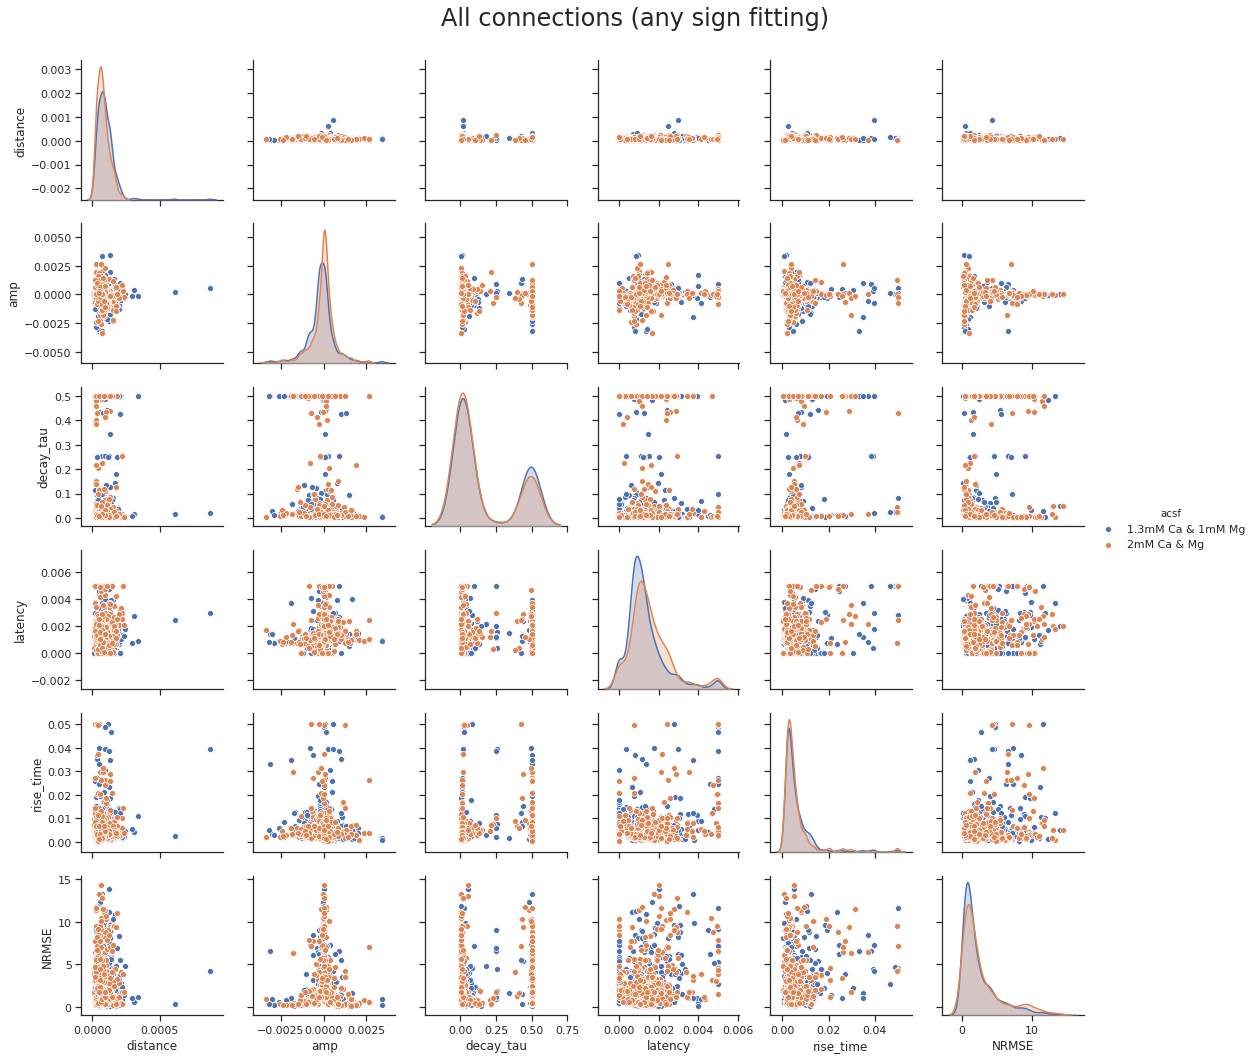

In [101]:
plotting_df=df[(df.distance<1e10) & (df.boolean_connection==True)]
g=sns.pairplot(plotting_df, 
             vars=['distance','amp','decay_tau', 'latency', 'rise_time', 'NRMSE'], 
             hue='acsf')
g.fig.suptitle('All connections (any sign fitting)', fontsize=24)
g.fig.subplots_adjust(top=.93)

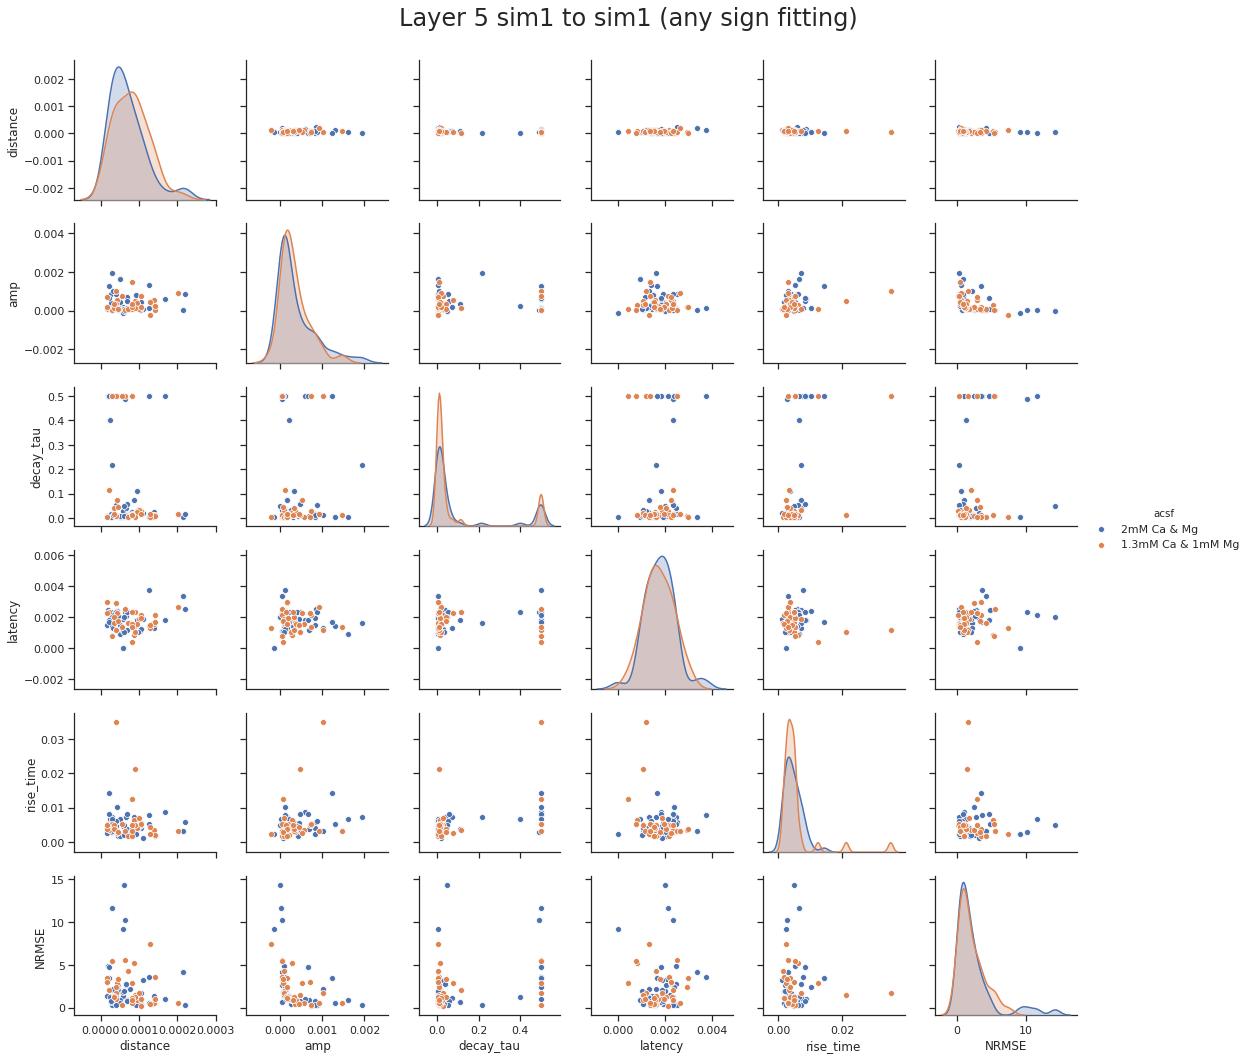

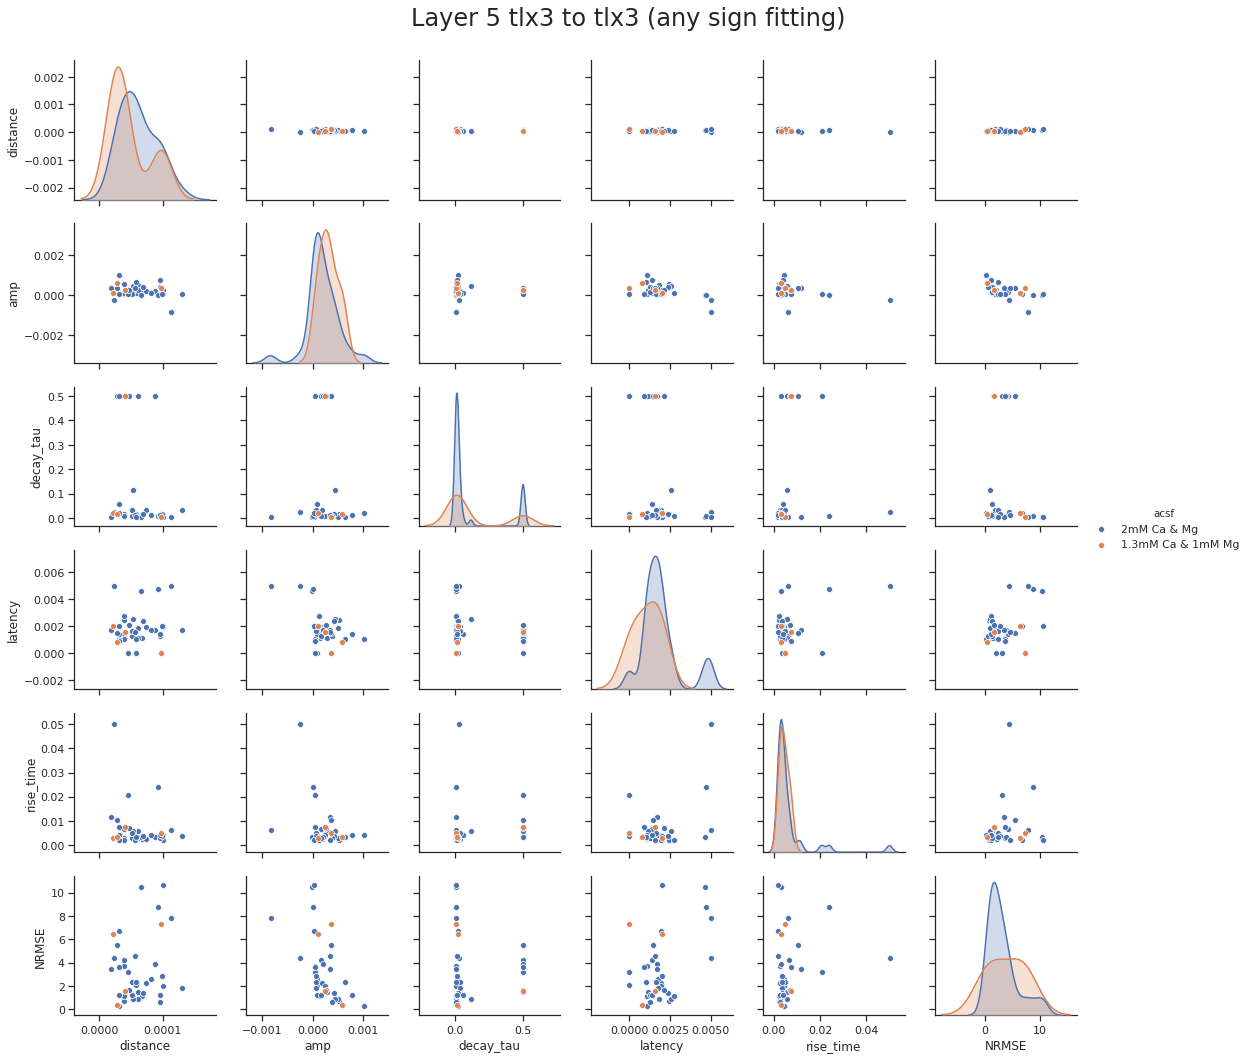

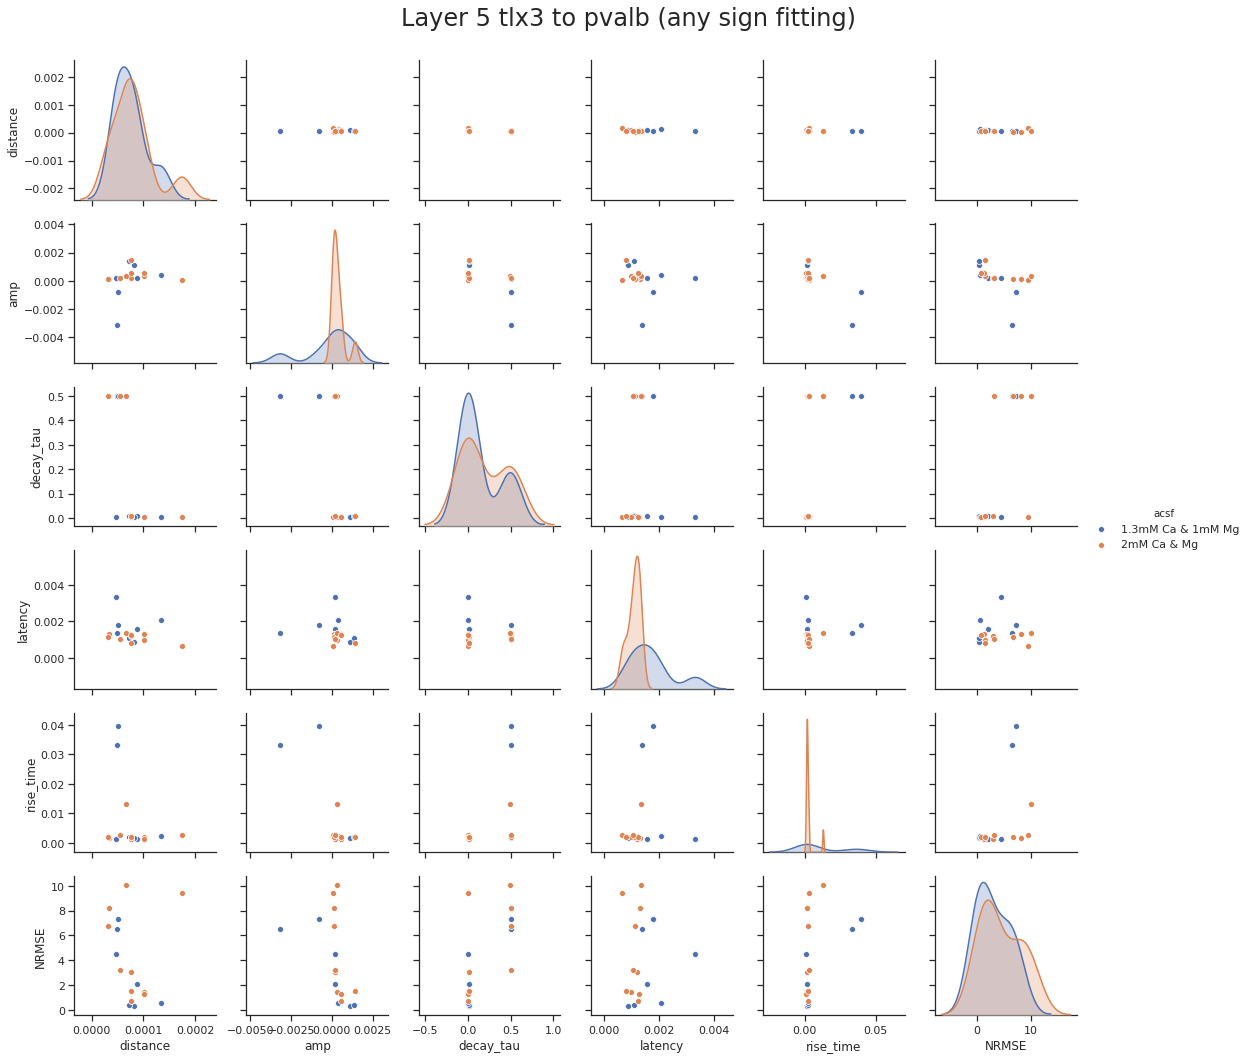

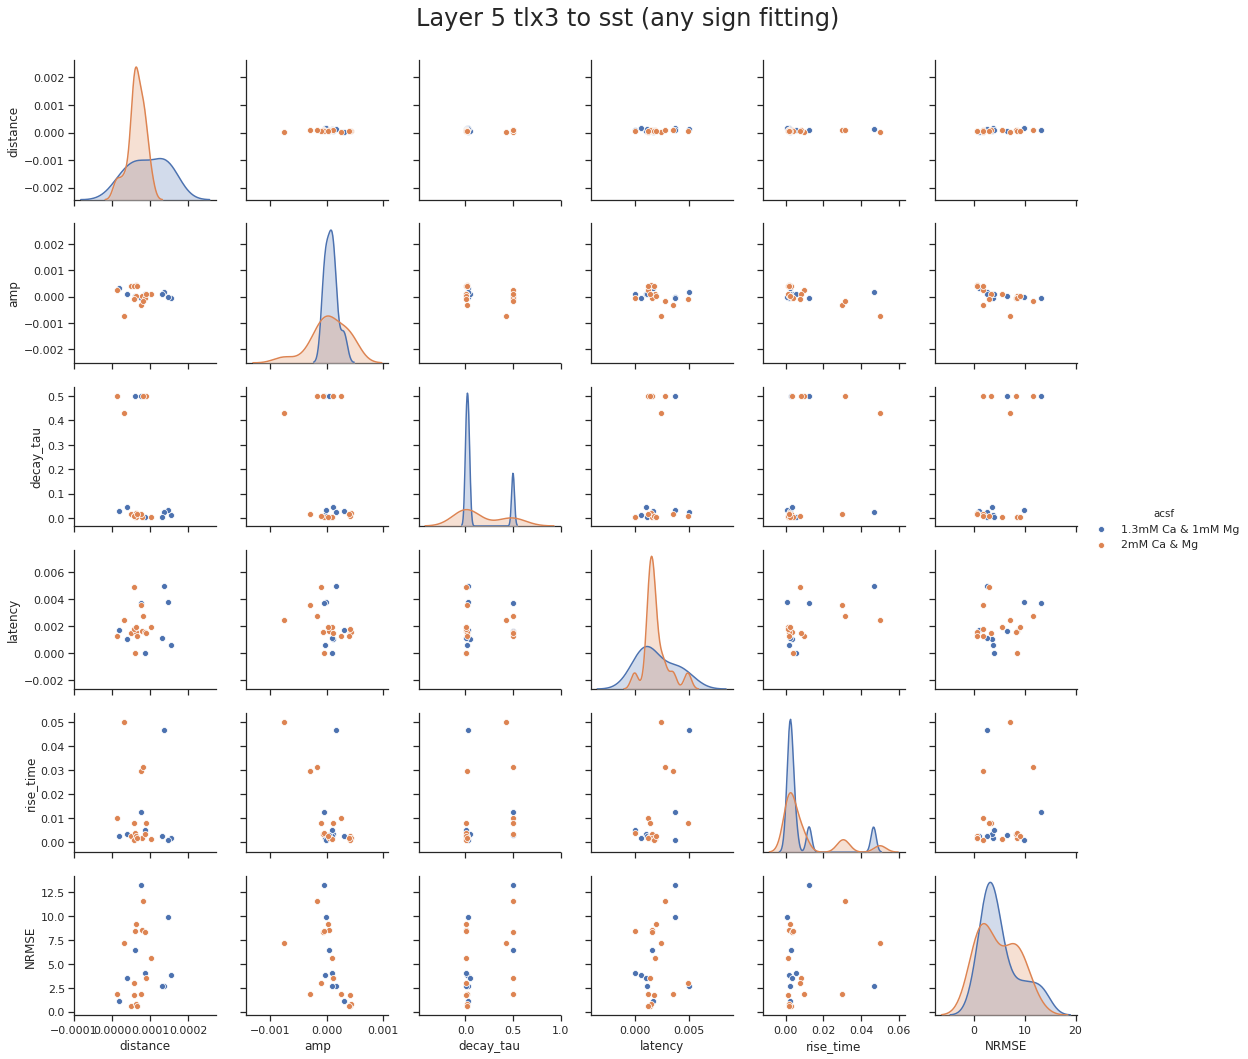

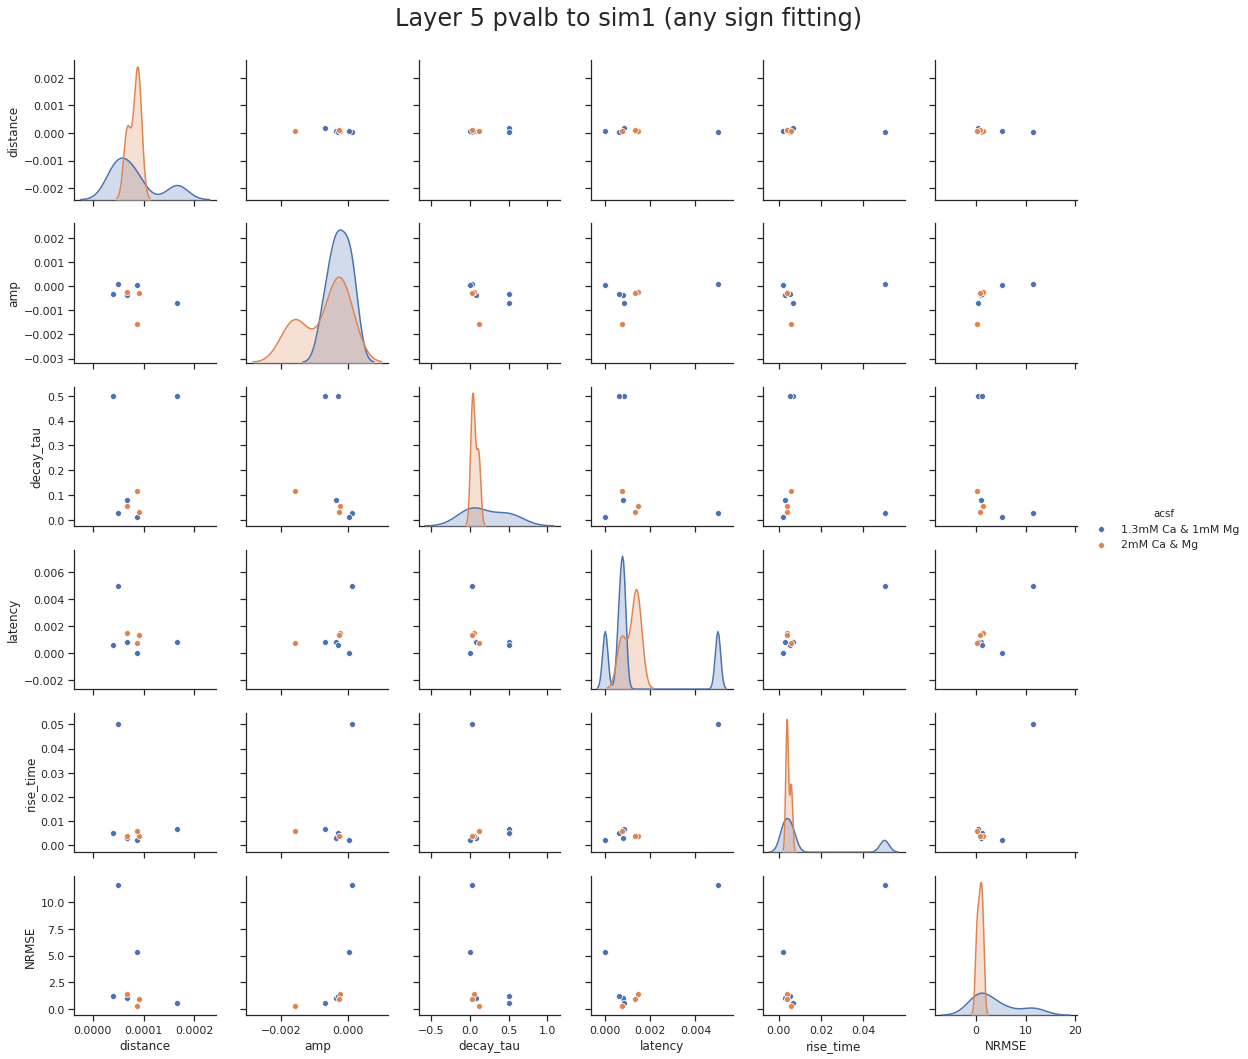

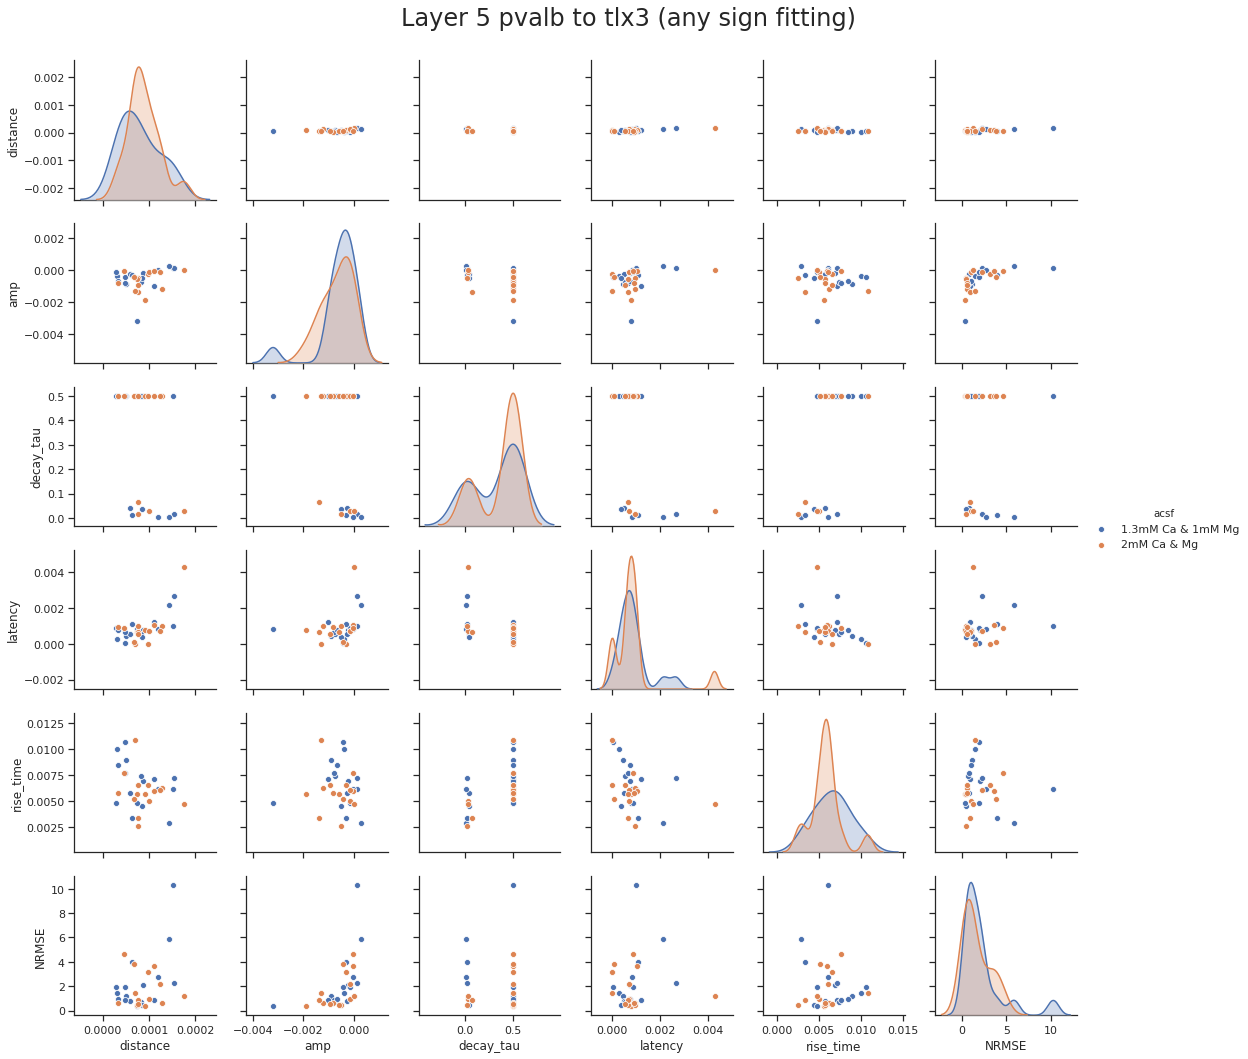

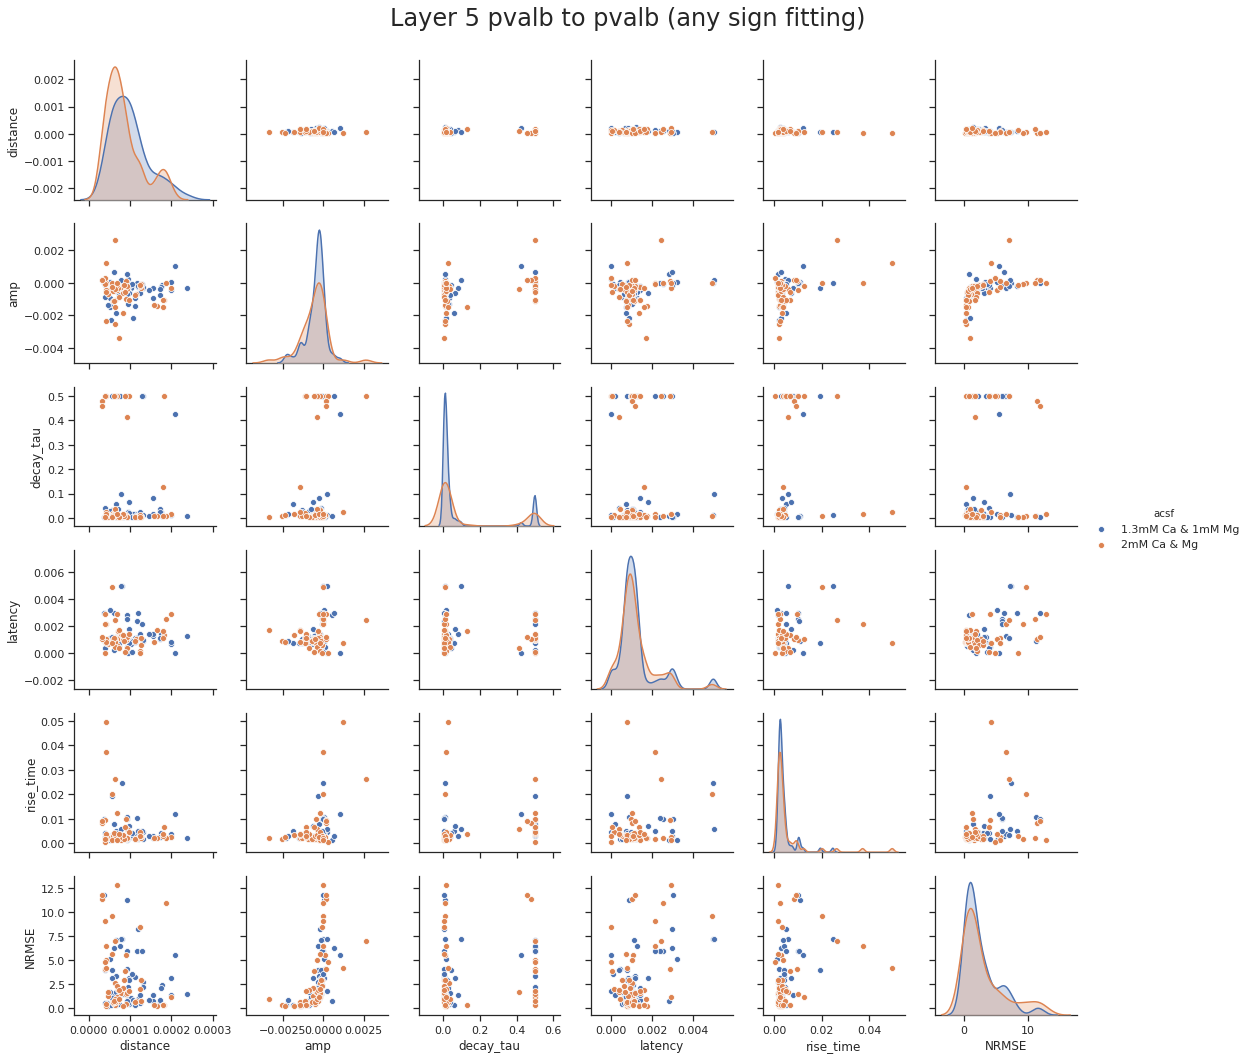

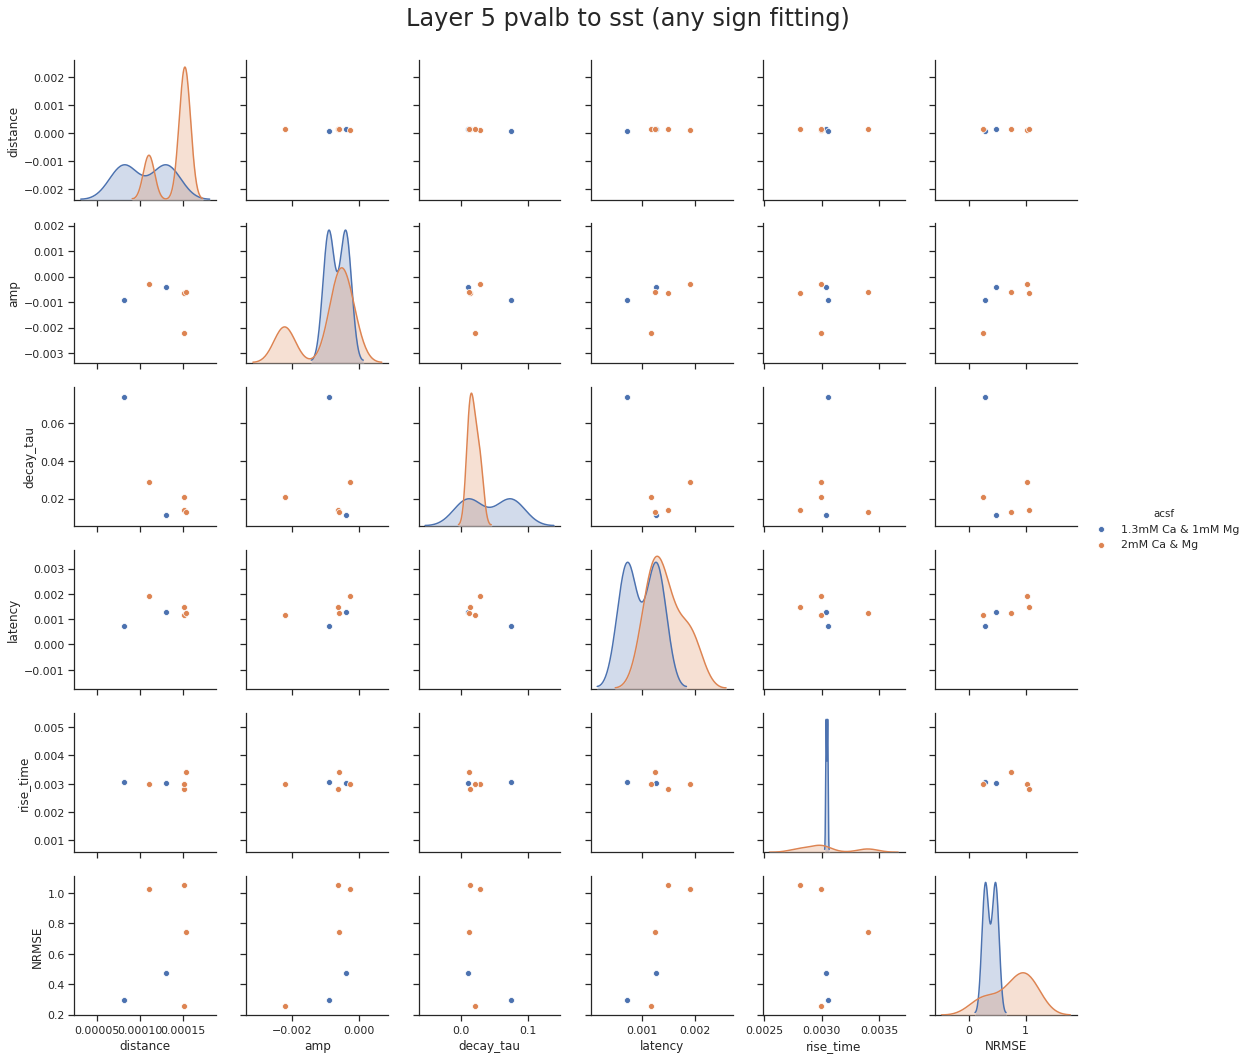

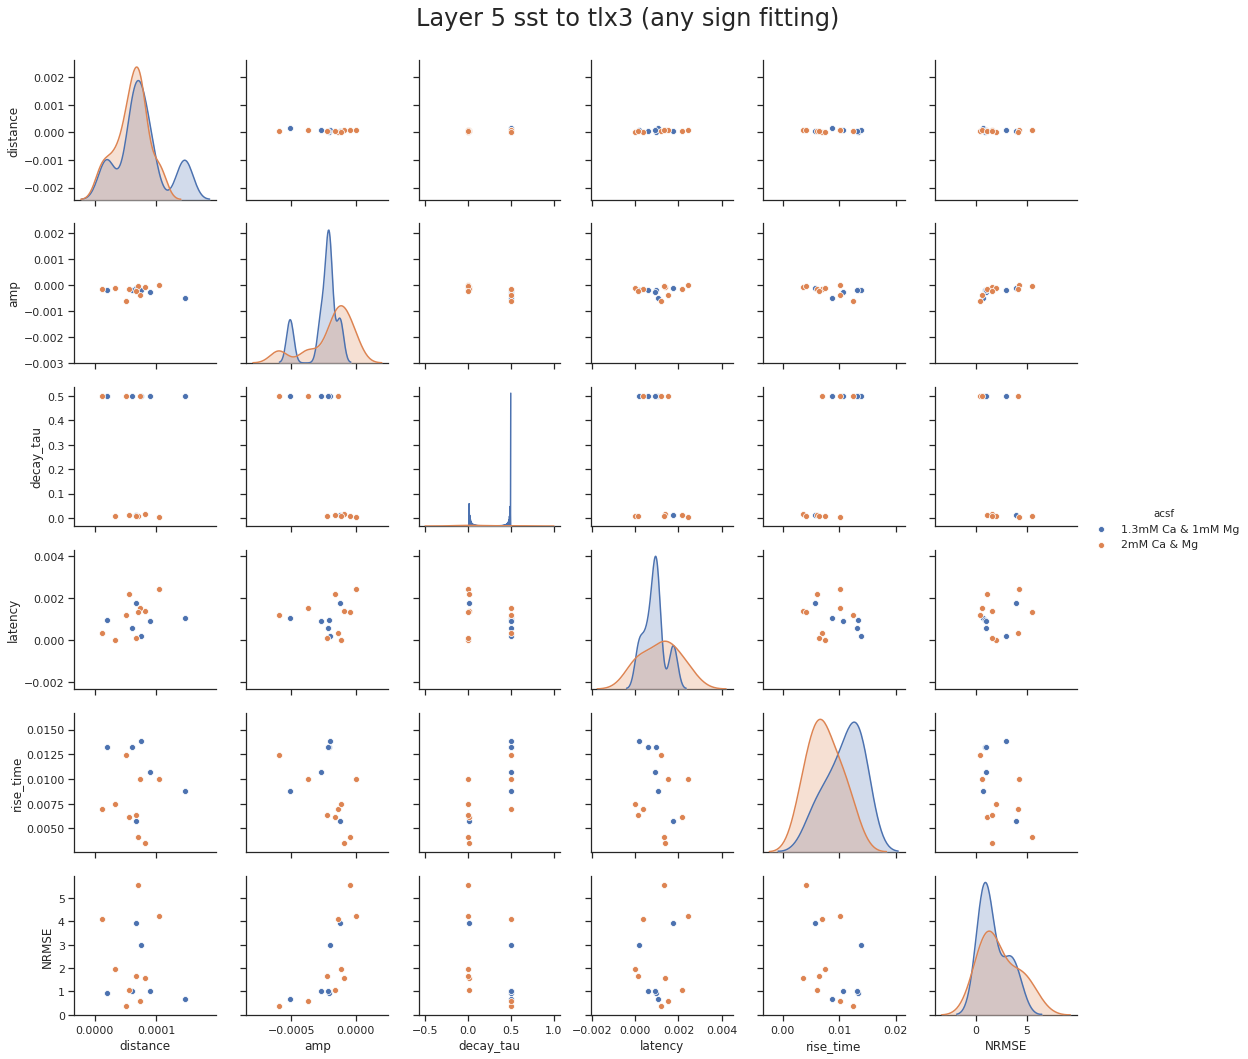

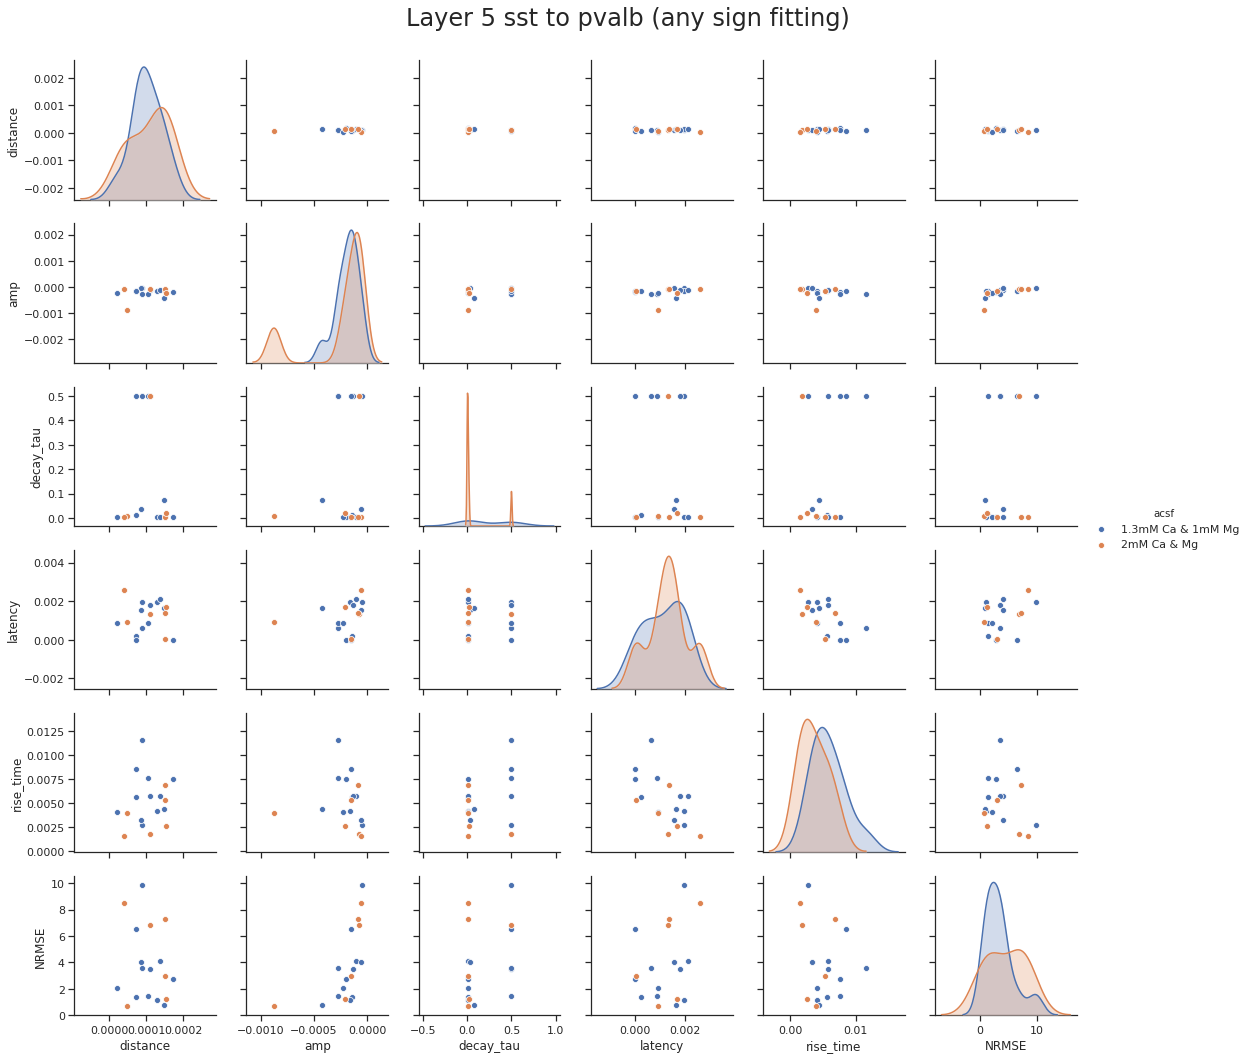

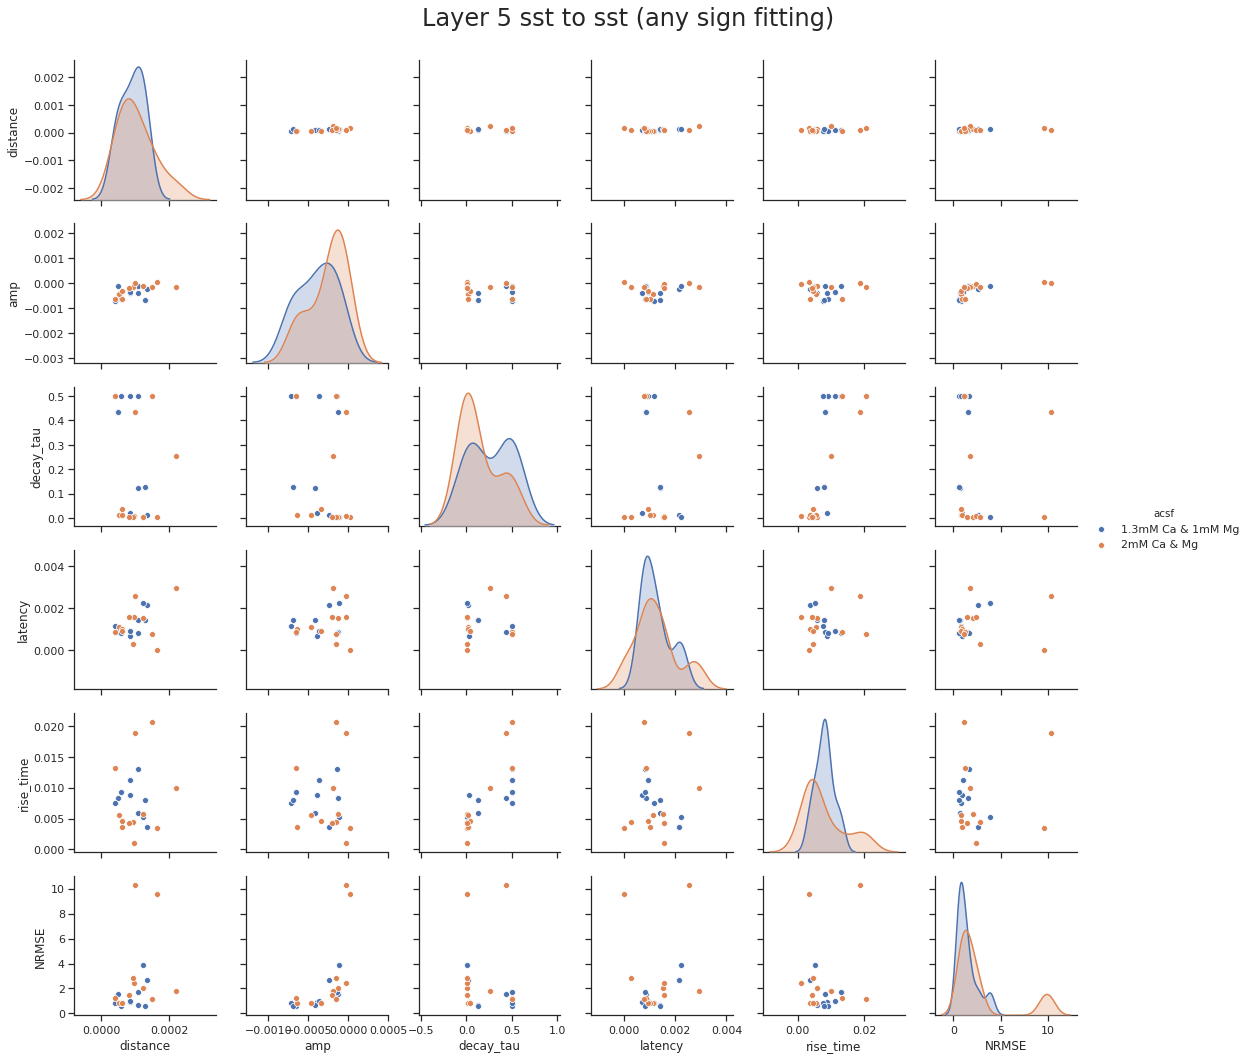

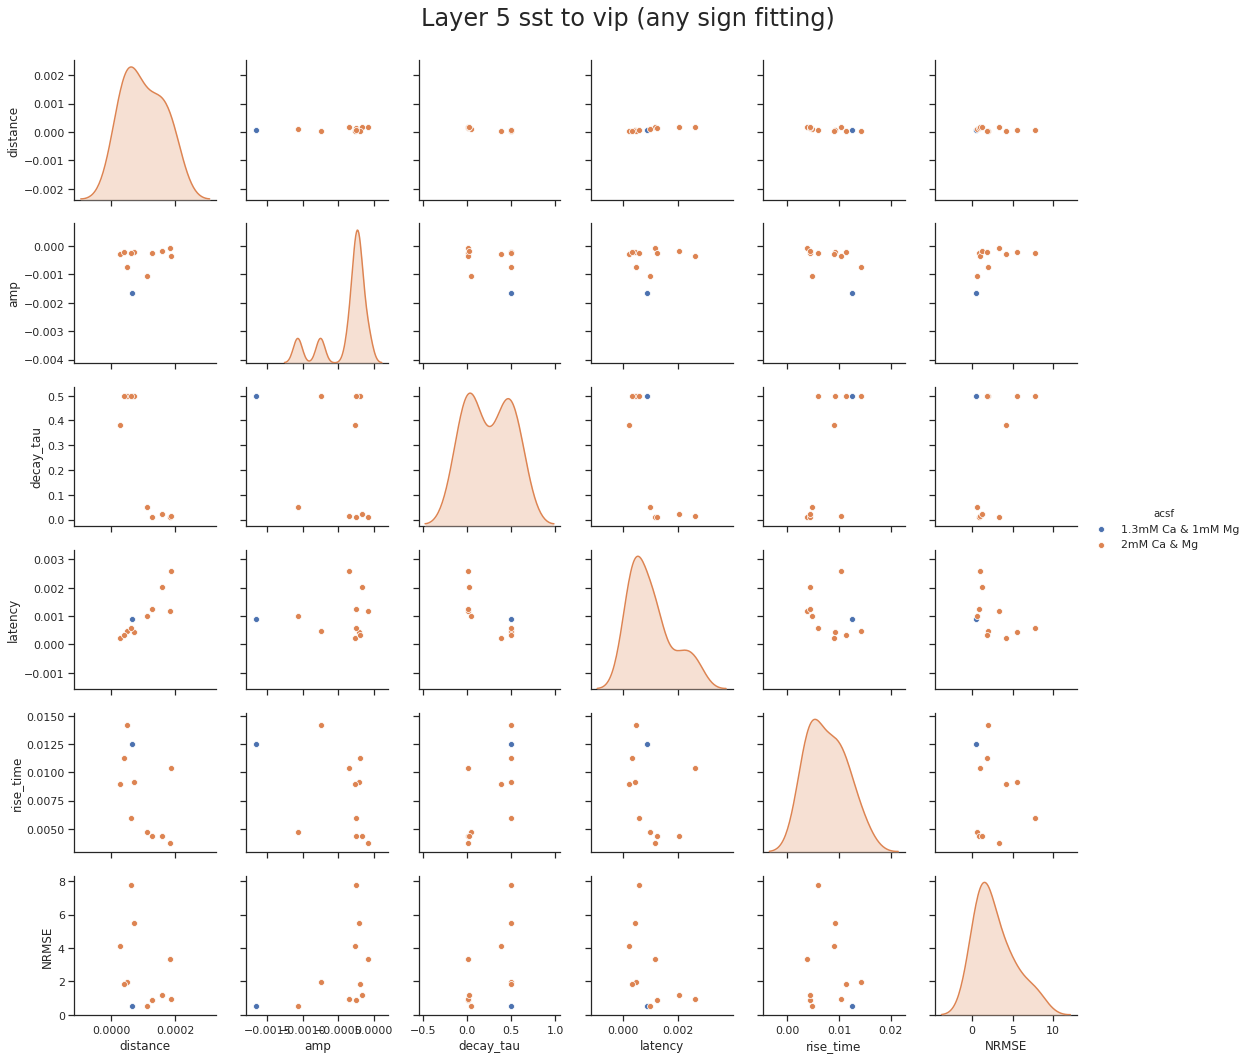

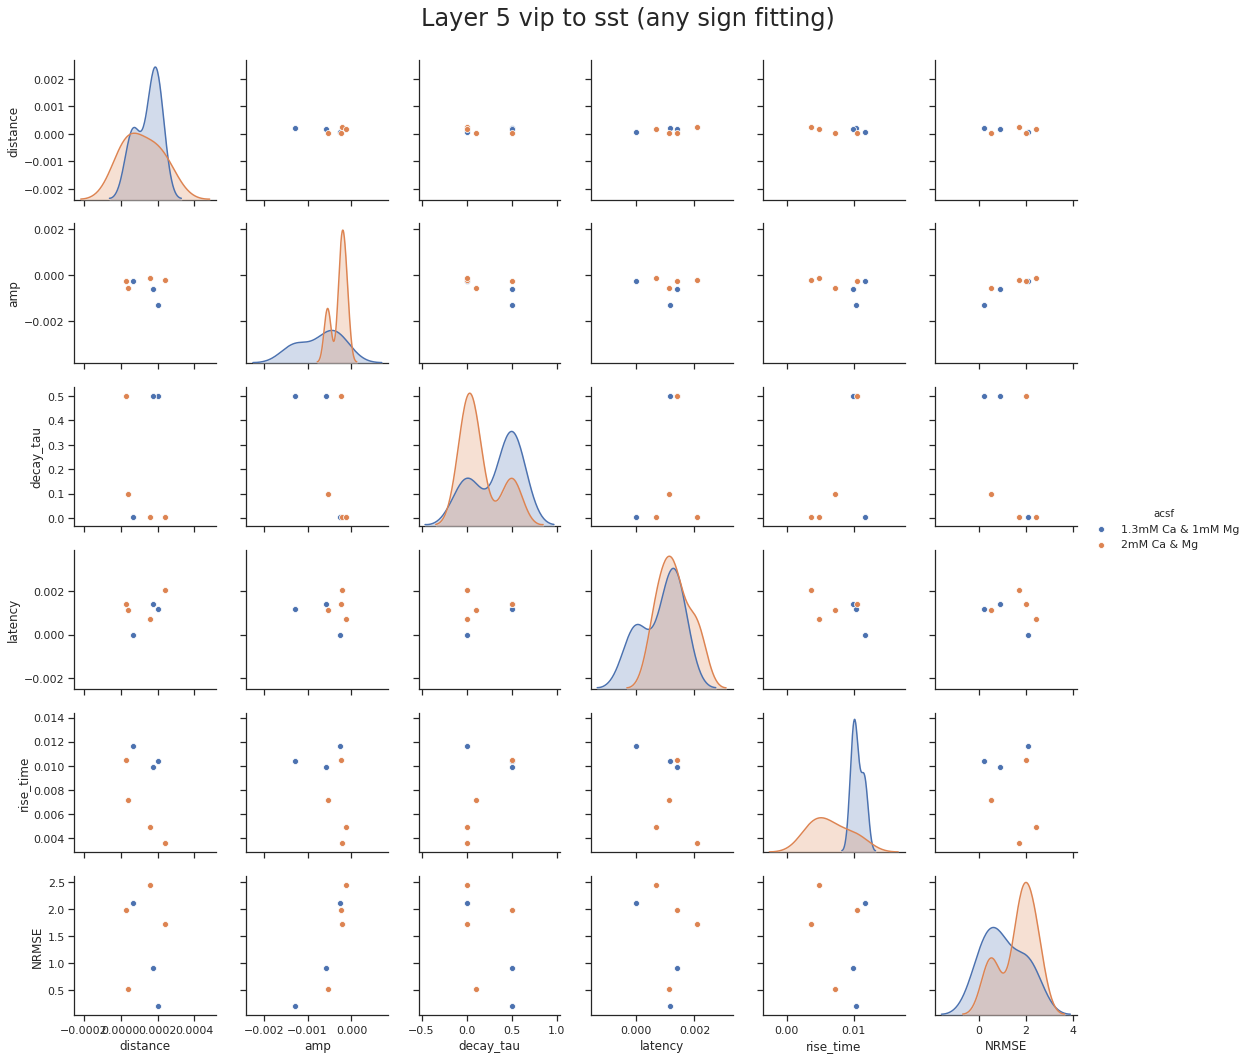

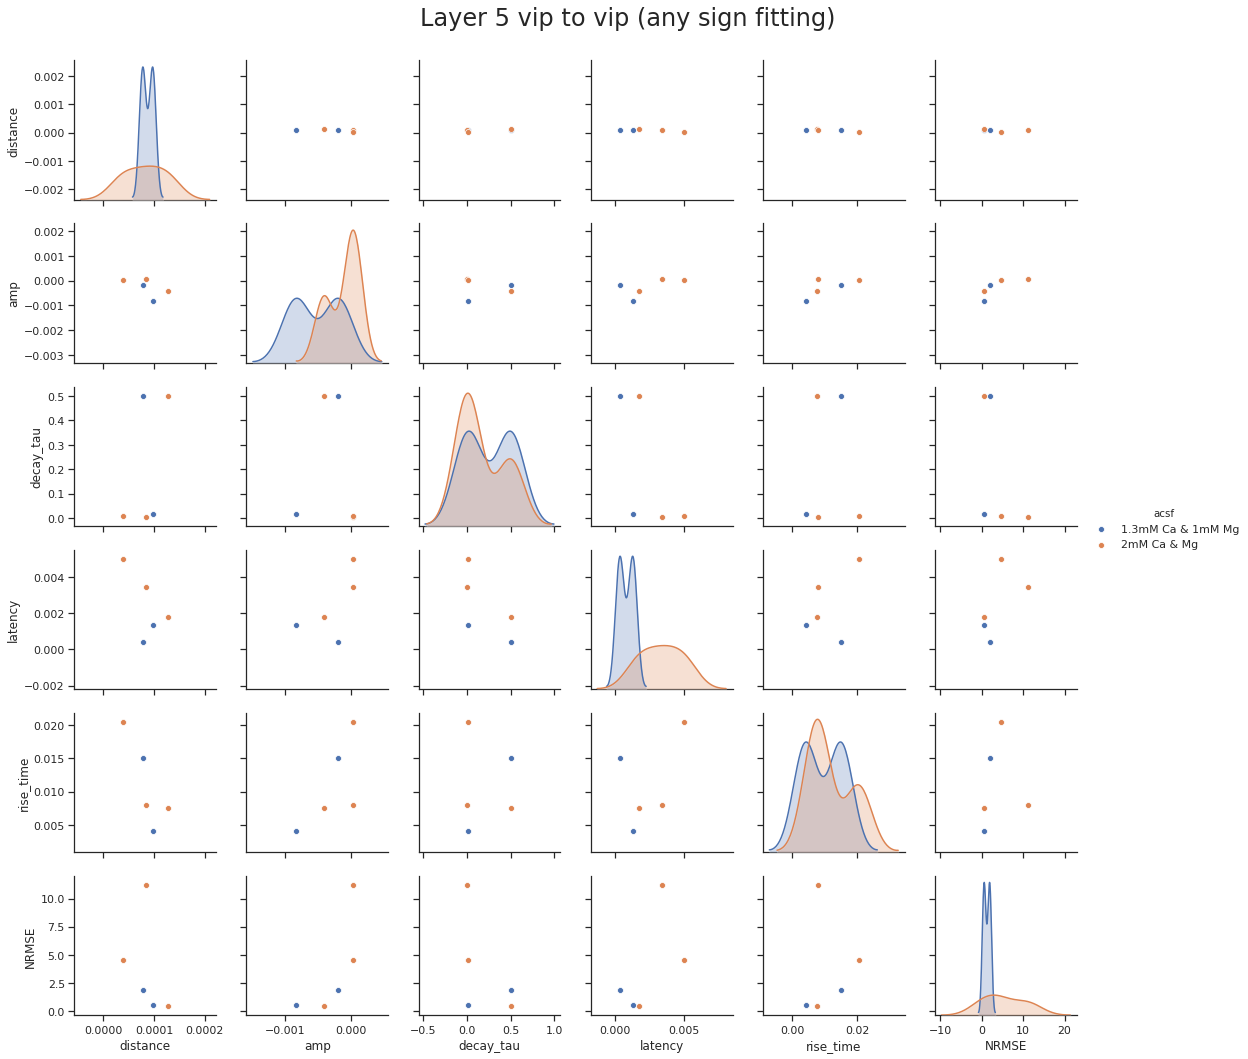

In [75]:
import matplotlib.pyplot as plt
plotting_df=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.pre_layer=='5') & (df.post_layer=='5')]
pre_cre=['sim1', 'tlx3', 'pvalb', 'sst', 'vip']
post_cre=['sim1', 'tlx3', 'pvalb', 'sst', 'vip']
for pre_c in pre_cre:
    for post_c in post_cre:
        plotting_df=df[(df.distance<1e10) & (df.boolean_connection==True) & 
                   (df.pre_layer=='5') & (df.post_layer=='5') &
                   (df.pre_cre==pre_c) & (df.post_cre==post_c)]
        if len(plotting_df)>4:
            g=sns.pairplot(plotting_df, 
                 vars=['distance','amp','decay_tau', 'latency', 'rise_time', 'NRMSE'], 
                 hue='acsf')
            g.fig.suptitle('Layer 5 '+pre_c+' to '+post_c+' (any sign fitting)', fontsize=24)
            g.fig.subplots_adjust(top=.93)

In [ ]:
plotting_df=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.NRMSE<8)]
sns.set(style="ticks")
sns.pairplot(plotting_df, vars=['distance','amp','decay_tau', 'latency', 'rise_time', 'NRMSE'], hue='syn_excitation')

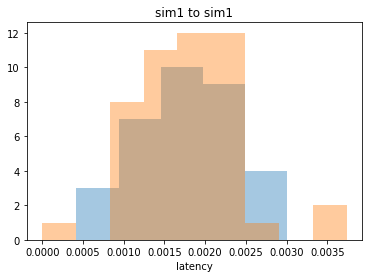

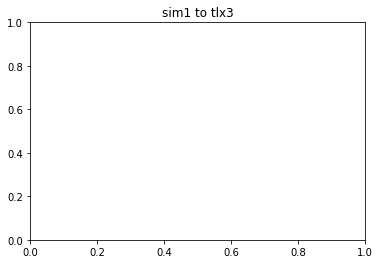

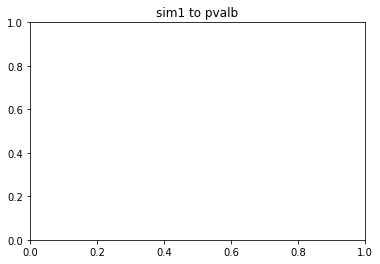

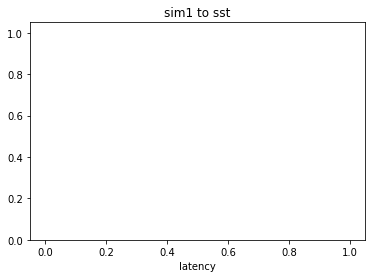

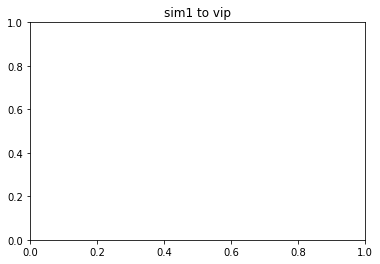

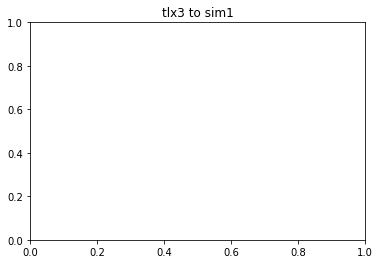

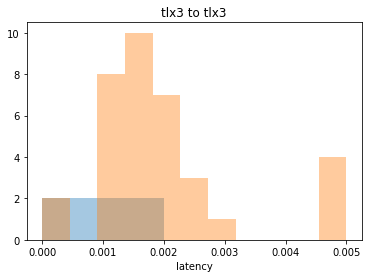

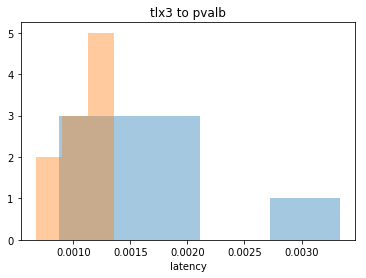

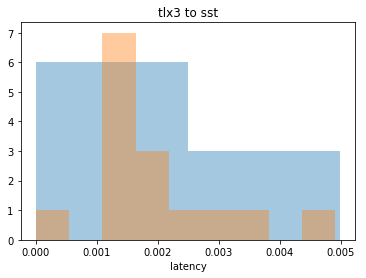

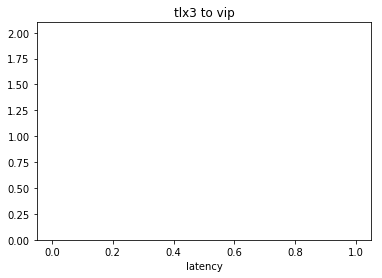

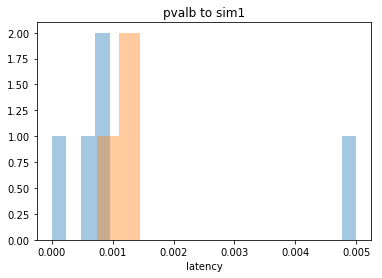

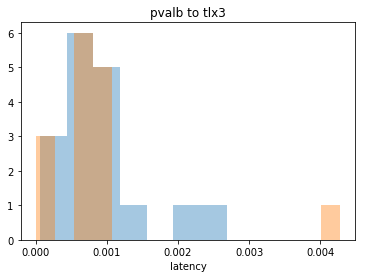

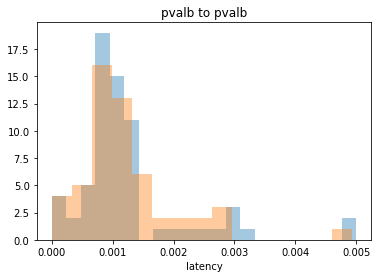

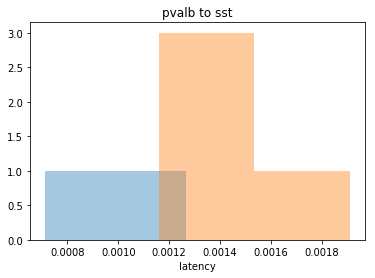

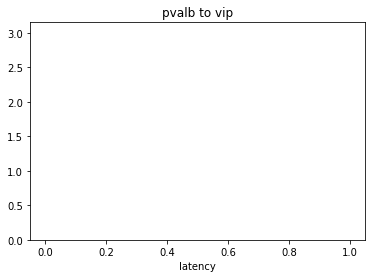

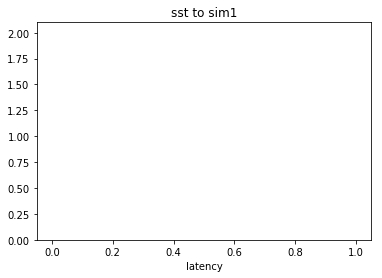

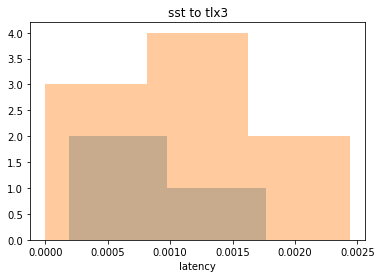

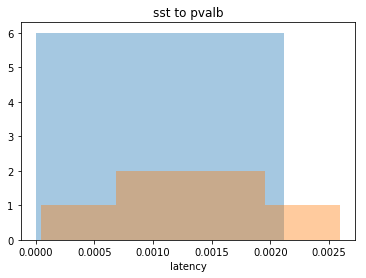

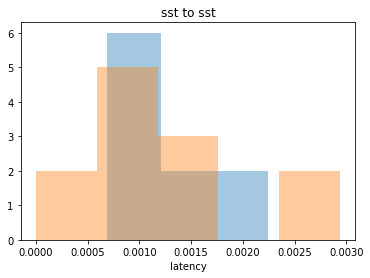

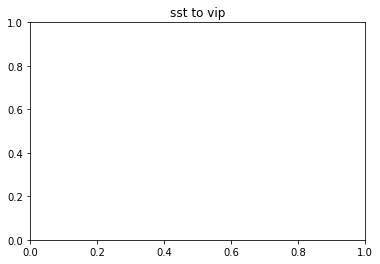

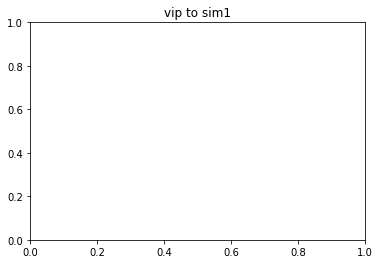

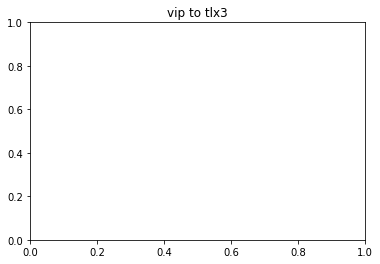

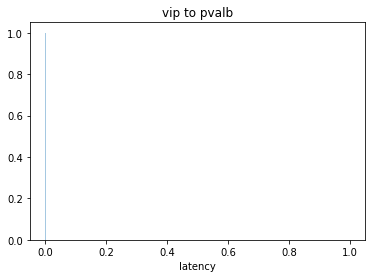

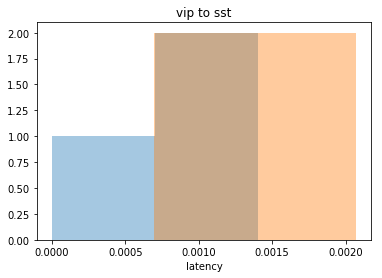

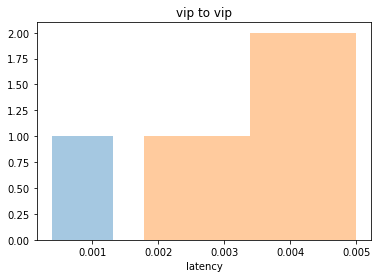

In [34]:
#make plots seperately

low_ca_df=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.acsf=='1.3mM Ca & 1mM Mg')]
high_ca_df=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.acsf=='2mM Ca & Mg')]
pre_cre=['sim1', 'tlx3', 'pvalb', 'sst', 'vip']
post_cre=['sim1', 'tlx3', 'pvalb', 'sst', 'vip']
for pre_c in pre_cre:
    for post_c in post_cre:
        low_ca_df=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.acsf=='1.3mM Ca & 1mM Mg') &
                     (df.pre_layer=='5') & (df.post_layer=='5') &
                     (df.pre_cre==pre_c) & (df.post_cre==post_c)]
        high_ca_df=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.acsf=='2mM Ca & Mg') &
                      (df.pre_layer=='5') & (df.post_layer=='5') &
                     (df.pre_cre==pre_c) & (df.post_cre==post_c)]
        plt.figure()
        if len(low_ca_df) > 1:
            sns.distplot(low_ca_df['latency'], kde=False)
        if len(low_ca_df) >1: 
            sns.distplot(high_ca_df['latency'], kde=False)
        plt.title(pre_c+' to '+post_c)

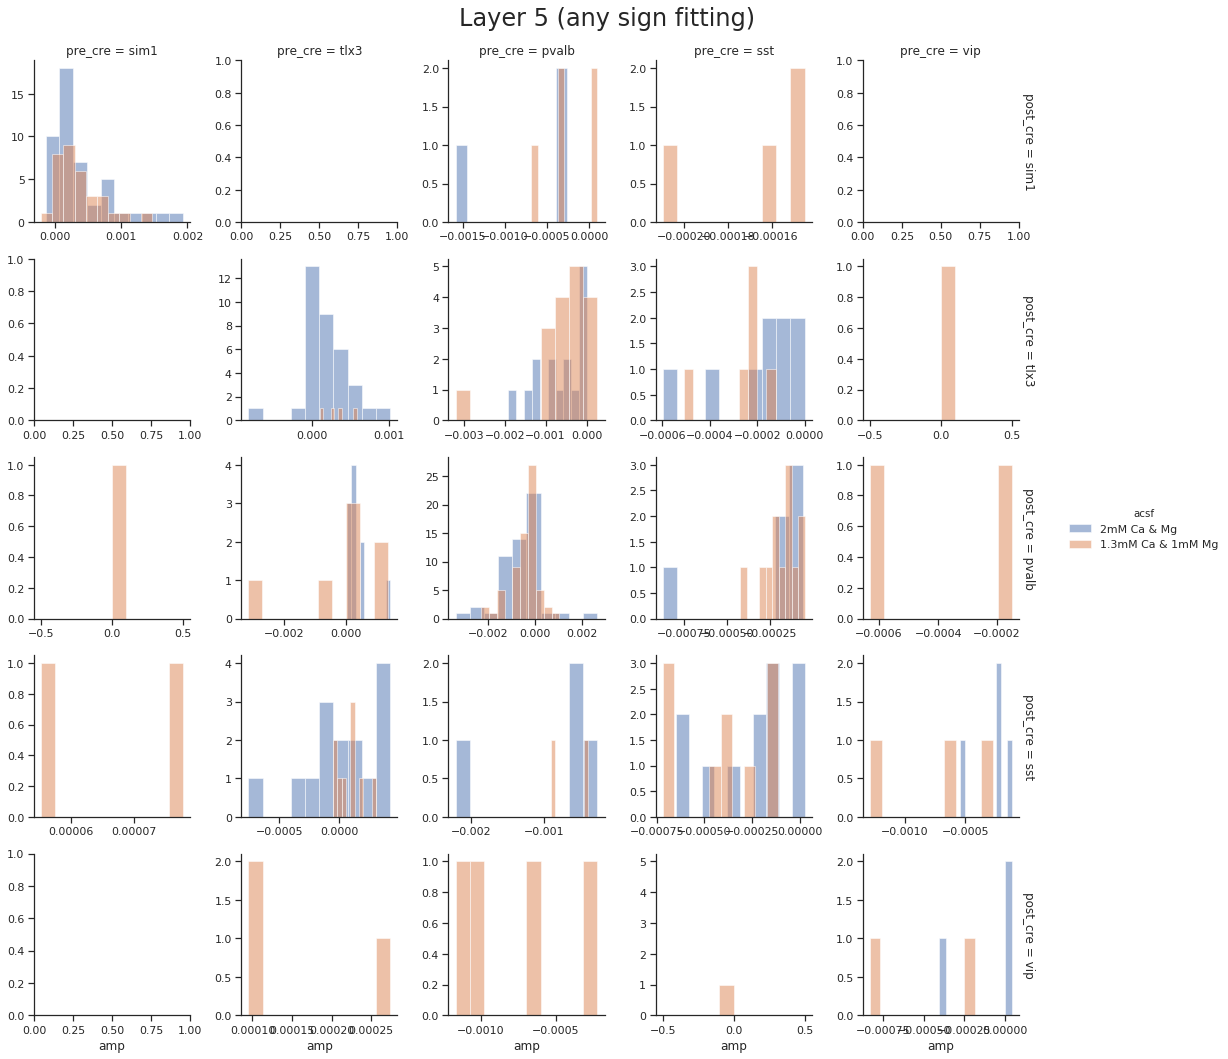

In [85]:
cres=['sim1', 'tlx3', 'pvalb', 'sst', 'vip']
plotting_df=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.pre_layer=='5') & (df.post_layer=='5') & 
               ((df.pre_cre =='sim1') |
                (df.pre_cre =='tlx3') |
                (df.pre_cre =='pvalb') |
                (df.pre_cre =='sst') |
                (df.pre_cre =='vip')) &
              ((df.post_cre =='sim1') |
                (df.post_cre =='tlx3') |
                (df.post_cre =='pvalb') |
                (df.post_cre =='sst') |
                (df.post_cre =='vip'))]

g= sns.FacetGrid(plotting_df, col='pre_cre', row='post_cre', hue='acsf', margin_titles=True, 
                 row_order=cres, col_order=cres, sharex=False, sharey=False)
g= (g.map(plt.hist, "amp", alpha=.5).add_legend())
g.fig.suptitle('Layer 5 (any sign fitting)', fontsize=24)
g.fig.subplots_adjust(top=.93)

In [58]:
g= sns.PairGrid(plotting_df,col='pre_cre', row='post_cre', hue='acsf', margin_titles=True, sharex=False, sharey=False)
g= (g.map(plt.hist, "latency", alpha=.5))

TypeError: __init__() got an unexpected keyword argument 'sharey'